In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b = bagreader('/home/francis/catkin_ws/src/rtk_gps/Data/clear_stationary.bag')

[INFO]  Data folder /home/francis/catkin_ws/src/rtk_gps/Data/clear_stationary already exists. Not creating.


In [3]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/gnss,gnss_driver/gnss_msg,596,0.999842


In [4]:
def data_csv(b):
    csvfiles = []
    for t in b.topics:
        data = b.message_by_topic(t)
        csvfiles.append(data)
        
    print(csvfiles[0])
    data = pd.read_csv(csvfiles[0])
    return data

In [5]:
csv_data = data_csv(b)

/home/francis/catkin_ws/src/rtk_gps/Data/clear_stationary/gnss.csv


In [6]:
f = pd.read_csv("/home/francis/catkin_ws/src/rtk_gps/Data/clear_stationary/gnss.csv")

In [7]:
f['UTM_easting_median'] = f['UTM_easting'] - f['UTM_easting'].median(axis=0)
f['UTM_northing_median'] = f['UTM_northing'] - f['UTM_northing'].median(axis=0)

In [8]:
f

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,UTM_easting,UTM_northing,Zone,Letter,quality,satellites,hdop,UTM_easting_median,UTM_northing_median
0,1.664995e+09,0,1665009812,0,GNSS1_Frame,42.338978,-71.084918,14.9,328247.939071,4.689519e+06,19,T,4,12,0.56,-0.000454,0.000000
1,1.664995e+09,0,1665009813,0,GNSS1_Frame,42.338978,-71.084918,14.9,328247.939071,4.689519e+06,19,T,4,12,0.56,-0.000454,0.000000
2,1.664995e+09,0,1665009814,0,GNSS1_Frame,42.338978,-71.084918,14.9,328247.939071,4.689519e+06,19,T,4,12,0.55,-0.000454,0.000000
3,1.664995e+09,0,1665009815,0,GNSS1_Frame,42.338978,-71.084918,14.9,328247.939071,4.689519e+06,19,T,4,12,0.55,-0.000454,0.000000
4,1.664995e+09,0,1665009816,0,GNSS1_Frame,42.338978,-71.084917,14.9,328247.952801,4.689519e+06,19,T,4,12,0.55,0.013277,-0.000337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,1.664996e+09,0,1665010403,0,GNSS1_Frame,42.338978,-71.084918,14.9,328247.939071,4.689519e+06,19,T,4,12,0.61,-0.000454,0.000000
592,1.664996e+09,0,1665010404,0,GNSS1_Frame,42.338978,-71.084918,14.9,328247.939071,4.689519e+06,19,T,4,12,0.61,-0.000454,0.000000
593,1.664996e+09,0,1665010405,0,GNSS1_Frame,42.338978,-71.084918,14.9,328247.939071,4.689519e+06,19,T,4,12,0.61,-0.000454,0.000000
594,1.664996e+09,0,1665010406,0,GNSS1_Frame,42.338978,-71.084918,14.9,328247.939071,4.689519e+06,19,T,4,12,0.61,-0.000454,0.000000


In [9]:
f['quality']. value_counts()

4    591
2      5
Name: quality, dtype: int64

<bound method NDFrame._add_numeric_operations.<locals>.median of 0     -0.000454
1     -0.000454
2     -0.000454
3     -0.000454
4      0.013277
         ...   
591   -0.000454
592   -0.000454
593   -0.000454
594   -0.000454
595   -0.000454
Name: UTM_easting_median, Length: 596, dtype: float64>


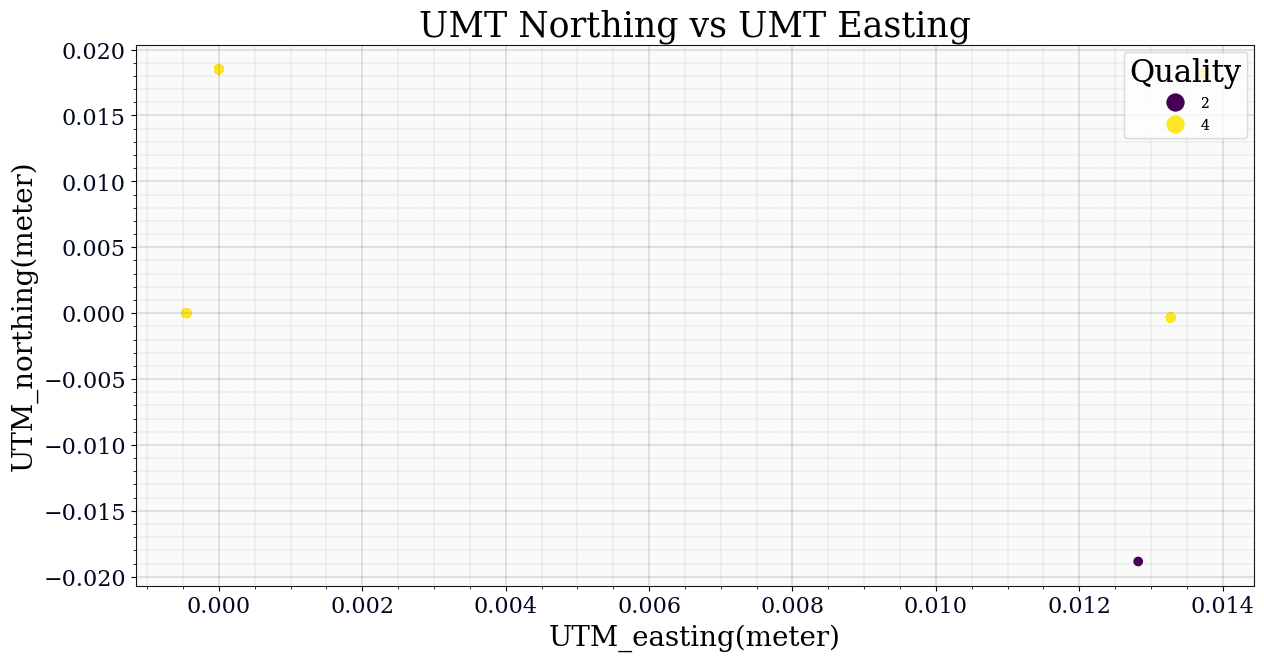

In [10]:
fig, a = bagpy.create_fig(1)
scatter = a[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=f, c='quality')

b=f['UTM_easting_median'].median
c=f['UTM_northing_median'].median
print(b)
#print(b)
#plot(a,b)
#plt.scatter(x,y)
plt.title("UMT Northing vs UMT Easting")
plt.xlabel("UTM_easting(meter)")
plt.ylabel("UTM_northing(meter)")
legend1 =a[0].legend(*scatter.legend_elements(), loc="upper right", title="Quality")
a[0].add_artist(legend1)
plt.show()

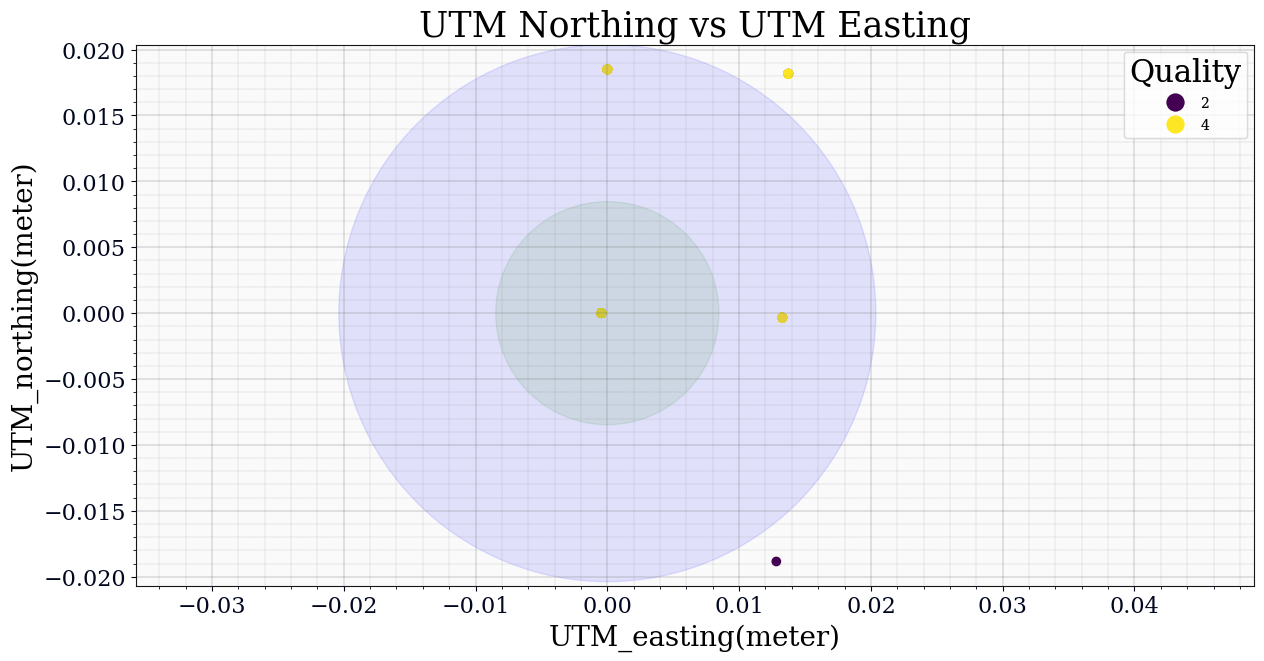

In [11]:
fig, a = bagpy.create_fig(1)
scatter = a[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=f, c='quality')
#y=f['UTM_easting_median'][0:120]
#x=f['UTM_northing_median'][0:120]
m=f['UTM_easting_median'].median()
n=f['UTM_northing_median'].median()
#rms = np.sqrt((()*(x-m))/f.count())
#sqrt(())
sigx=f['UTM_easting_median'].std()
sigy=f['UTM_northing_median'].std()
CEP=0.62*sigx + 0.56*sigy
DRMS=2*np.sqrt((sigx*sigx)+(sigy*sigy))
circle = plt.Circle((m,n),DRMS,color='blue',alpha=0.1)
circle1 = plt.Circle((m,n),CEP,color='forestgreen',alpha=0.1)
#m,b = np.polyfit(x,y,1)data:image/png;base64,iaHR0qZ7x17itbtqyqbdK/f/9AXFm79692LBhg81zLVu2RGhoKICs28oZpd7Aw3YEgMOHD+Ptt9/G9OnTXYpj3R9Xr17F0aNHUaBAATRq1MhSRqlvbmA9GDB8+HDkz5/fYdlnnnkGzzzzDADzwMyAAQNUr8/bb7+N06dPAwAGDRqES5cuqZ6DvIvnPvd589xXtmxZBASYv+rExMQgPj7e41i5mTvnOsWmTZswc+ZMAMCyZcuwYMECvPTSS16qIREROSUTERF5yfnz52UAlp/o6GiP4vTr108GII8dOzbTa9HR0TIAuUyZMk5jtGrVylKPfv36OS1bpkwZh/VV8ln/REZGygkJCa7vUAZdu3bNFPP8+fMex3NEaUfrn2XLlrkdZ+7cuTIAuVWrVqrXUSuetrWy72rvf9OmTS1xixUrplpc8g2e+1zji3NfiRIl5NOnT7v888Ybb7jUdjmVJ227fv16m+2+//5771aSiIgc4uWxRERE2XT37l3LrAR3HTt2DL///ru6FXLDwIEDcfHiRZ/lJ7NJkyahfPnyKFKkCGbMmOHr6hC5JDee+wICAlCxYkWXf5QZkv7ksccew8svv4yIiAg8+eST6NOnj6+rRETktzhoR0RE5IFSpUqhcuXKlsdff/01UlJS3I7z+eefQ5ZltG/fXs3qOVW0aFHL77GxsejVqxfS09M1y0+ZNW3aFGfPnsWNGzfw9NNP+7o6RA7l5nMfuUaSJPz444+Ij4/HqlWrctWtD4iIRMNBOyIiytVCQkJQpkwZlCxZUrWYJUuWRJkyZSz3lbJHp9Nh5MiRlsfXrl3DTz/95Fae8+fPY9GiRShXrhx69OjhaXXdNmjQIMvN7AFg+/bt+OCDDzTLT0TZx3OfNrp06YIffviB93QjIiKf4EIURESUqzVp0kT1VUv/+ecfl8r16dMHH330Ea5cuQIAmDhxIgYOHAi9Xu/S9hMnTkR6ejpGjhzp8jZq0Ol0+OWXX1CnTh3cvn3bUpd27dp5fdbL5cuX8c8//+D69eswGo0oUqQIGjVqhKpVq6oS//r169i2bRsuXboESZJQrFgx1K5dG9WqVfN6G//77784evQoYmNjUaxYMbRu3RplypTxas6Mbt26hejoaFy4cAEhISGoXr06WrZsiaCgILdjHT9+HDt27EBMTAwKFiyISpUqoWXLltDpct+/+ZpMJuzfvx8HDx7E7du3odPpEBUVhVq1aqFOnTqWBQtyE577tFG/fn3Ur1/fpbKJiYnYv38/jh8/jrt370Kv16NQoUJo0KABatas6dHfzpkzZ7Br1y5cv34dqampiIyMRLVq1VC/fn3kyZPH7XhaU+u8aDAY8Ndff+Hs2bMwGo0oUaIEWrVqhWLFinmh1kREOYivb6pHRETi0uJm7K5y52bszmS8+fs333xjs48///yzS3GuXbsmBwcHy0WLFpUNBoPNAgfw8s3YlXZcvXq1LEmSJWfRokXlmzdvZhnHk4Uo/vnnH7lZs2aZbjqv/FSvXl3+/fffHW5/4MABh9vKsiwnJCTI/fv3lwMDA+2WiY6OtjkGXPlxtu/W+79//365bt26mbaXJEnu16+fbDAYHO6Xo9z2+j9fvnwO981oNMqjRo2SQ0NDM71eqlQpecOGDS731fHjx+VHH33Ubq5SpUpZFi+xt7CJJ3+njuI4+3t11pcZzZkzx7LAgr2ffPnyyT169JDXrl0rp6enu1V3R3juc8yX5z7r+jvjbEGOjFJSUuQFCxbIjz32mBwUFOTwOCtXrpw8Z84cl+u8fft2uXHjxg7jBQYGyu3atZNnz54tx8fH22zr6blu7NixLv8NZux/Nc+L1tLT0+WJEyfKefLkyRRLr9fLPXr0kGNjYzP9zWV1Liciyi1y3z8rEhER5SCDBg3C+PHjcefOHQDAhAkT0Lt3b0iS5HS7r776CikpKXjrrbecXormTU888QSGDx+Ob775BgBw48YN9OnTB+vWrcuy/u744osv8O677wIAChYsiNdffx1NmzZFYGAgDh48iGnTpuHYsWN45pln8Nprr+G7777LNCOlQIEC6N69OwDzbJbVq1dbXktMTETr1q2xd+9eVK1aFZUrV8atW7ewc+dOyLJsKdeoUSNLW69fv97yfMuWLT2+Z9O+ffvQtm1bpKeno127dsiTJw+OHTuGU6dOQZZlzJs3D4mJiViyZInd7Tt27Gj53bpO9jz77LNITEwEAKxatQpJSUmW1/r06YNff/0VVatWRZUqVRAXF4edO3fCYDDg8uXLeOqpp/Dvv/+iQYMGTnP8+++/6NChgyX2Y489hn79+qFkyZK4ceMGFi9ejOeeew7fffedzXYVKlRAxYoVAcDyf1fVqlULHTt2xOnTp3Hu3DkAQJ48edCsWTPL6xkpfZmcnIwtW7YgMDAQbdu2zVTu7bffthzfjzzyCAYMGIBy5cohNDQUp06dwuzZs7Fr1y4sWrQIixYtQnR0tM2l4+RYbj73qWn//v148cUXLY9btGiBvn37onz58khLS8P+/fsxa9YsnD9/Hi+99BL+/fdf/Pjjj05jLl++HC+88AKMRiNKlSqFV199FTVr1kRkZCSuXbuGFStWYPHixdi0aRM2bdqES5cu4aOPPrJs7+m5rmLFipZz0pkzZ3D27FmHZatUqWI5J58/fx67d++2vJbxvBgREYFjx47h9OnTLp0XFUajEd27d8eyZcsAAJGRkRg6dCiaNm0KvV6PvXv34rvvvkPjxo2xePFim22tz61ERLmajwcNiYhIYP4w20SWZXncuHE2+7lixQqnMe7cuSNHRETI+fPnl+Pi4mRZln0y006WzbNEGjRoYJN7woQJTuO4M9Pu22+/tcQtX768fPny5Uxl7t27Jzdt2tRS7s0333QaM+Nx9eabb8pFihSRN23aZFNu9erVDo89T9vaup+aNWsm16xZU+7atascGxtrU+7HH3+0mcW4bdu2LGO7UyfrmWOvvvqqHBERIa9atcqmzPXr1+X69etbyrVr185pzKtXr8r58+e3lB8zZozdct9//70cHBwsN2zY0FI2O3+bij///NNmFlFMTEyW28yfP18GIHft2jXTa3/99ZclXrdu3WSTyZSpjNFolF977bVsn6My4rnPPl+f+zLW3xF3Ztrt2LHDEvuDDz6wWyYxMVHu2LGjpdzUqVMdxrt9+7bl77B8+fLy3bt37Zb79ddfXfr787RtrWfdZXXcuHpenDlzpk19sjovvvPOO5ayJUqUkC9cuJCpzJ07d+SaNWtmmh1MRCSK3HdTEiIiohzmjTfeQEREhOXxZ5995rT8lClTkJCQgKFDh/r8nkRBQUH47bffbOrx/vvvY+fOndmOffz4cbzzzjuWxwsWLLB70/x8+fJh8eLFCA4OBgB8++232LBhg8t5ZsyYgVWrVmWaafXEE0+gSZMmHtY+azt27IAkSVi0aBHy589v89rLL7+Mxx9/3PJ44cKFXqvHrFmz8MMPP+DJJ5+0eb5o0aKYPn265XF0dDRu3rzpMM5bb72Fe/fuATDP1Pnkk0/slnvllVfQpUsX7N27N/uVt9KhQwfL8ZGWlob58+dnuc3s2bMBwO4iAdazmd544w27M8B0Oh2+/vprFC5c2NNq+7XcfO5TW82aNTFu3Di7r4WFheGXX36xtNUnn3yC5ORku2WXLl1q+Tvs06cPChQoYLdcz549M/3N5wTOzouvvvoqOnXqZHns7Lx45MgRyyxZAPj+++/t3gsvMjISCxcuxPbt27NfeSKiHIiDdkRERNlUoEABDB482PJ4z5492Lhxo92y8fHxmDp1KsLCwjBs2DCtquhUhQoVMHPmTMvj9PR09OzZ0/LF0VOfffYZUlJSAJgvGWvatKnDsiVLlkTv3r0tjz/88EOX8zz77LN45JFH7L42ZMgQjBgxAqVKlXI5nqtkWcbo0aMdLvJg/YV6z549qudXVK5c2eEKnI0bN7YMSJlMJuzbt89uuUuXLmHp0qWWx8OHD3d6meOIESOyUWP7dDod+vbta3k8d+5cp+XPnj2LrVu3olixYjYDpIqjR49afs84eGAtJCTEcikuuSc3nvsuXrwISZKc/ly8eNHleMHBwShRogRefPFFp38zBQsWtFyyGRMTg61bt9ot5+pxCwDt2rVzuZ5aUeu8OHnyZKSnpwMwX4r7xBNPOCxbs2ZNdOjQwcMaExHlbBy0IyIiUsHbb79tmSkGOJ5xMmPGDMTGxmLgwIEoVKiQVtXLUq9evdC/f3/L4wsXLmDQoEEex7t//77NPYa6dOmS5TbWZXbt2oWDBw+6lOu5555z+NqLL76Ir776ChUqVHApljt0Op3TmS5VqlSx/K7cq80bspptY70yr6N6LFy4ECaTCYB5v7K6H1SjRo1QsGBBN2uatQEDBlh+/++//7Br1y6HZefMmQNZltGvXz+7K5CmpaVZfl++fLnTvDNmzMDx48fRqFEjD2rt33LbuS8kJAQdO3Z0+uPOvfbq1auHK1euWO7b6Yz1/R6t7wFnzfq4XbFihc19OTMaMGAAjh8/jqFDh7pcX2/T6XROB9iqVatm+d3R+Sg9Pd3mfnfWs/McsTdwT0QkAg7aERERqaBYsWLo16+f5fHmzZszXWKanJyMr7/+GoGBgfjf//6ndRWz9N1339kM8CxdutRmBp47tm/fjtTUVMvj+vXrZ7lNxkUStmzZ4lKuevXquVc5lZQuXdrpJX5FihSx/B4fH++1ethbqMHdelhfWla6dGlERkY6jSlJEqpXr+5GLV1TsWJFtGzZ0vJYufw1I6PRiHnz5gGwf2ksYNsun332GT766COH+1+sWDFUrVoVYWFhnlbdb+W2c1+RIkWwbt06pz/WfzNqsh4MdHSpuvVxu3XrVnTv3t3hzL98+fKhatWqOeofgEqXLo28efM6fN2V89GRI0dsXnPlHF+zZk03aklElHtw0I6IiEglI0eOtJnx8+mnn9q8Pnv2bNy8eRO9e/f2yuWa2RUeHo5FixbZzJp56623cOTIEbdjHThwwOZx+fLls9ymRIkSNrn379/vUq6iRYu6VzmVREVFOX3d+gu69QCm2rK6H5t1PZTLlTOy7uOyZcuqktdT1rPtfvvtN5tVchXr16/H1atX8eijj6JSpUp247z55puWyxWNRiPGjRuHkiVLYuDAgdiwYYPNjCbKntx+7lPLoUOH8PXXX+Pll19Gt27d8Pjjj6NTp06WnwULFljKJiQk2I3Rq1cvm7+tJUuWoEKFCnjqqafwyy+/4P79+17fj+xw53zk6LyY8T3HlXMS70tJRKLioB0REXmNTqfO24xyeZBa8bylQoUKeOGFFyyP16xZY/nykZ6eji+//BI6nQ6jRo3yVRWzVKdOHUyaNMnyODk5Gd27d7c7cOLMrVu3bB47m3mhkCTJZuZaxhiO+Gp2VGhoqNPX7V2y6Q1Z7b8r9bhz547ld1f6CoDNAgRqev755y3HQVxcnM299hTKDLyXX37ZYZwWLVrg+++/t7m3VlxcHGbPno2OHTuiSJEieOmll/DPP/+ovAc89+XGc192HDx4EM2aNUPdunUxYsQIzJkzBytWrMC6deuwfv16y8/Zs2ct2zi67LVAgQJYvXq1zT9GGI1GrF69Gi+++CKioqLwxBNPYPHixZZ7vuUkap+PANfOSd46HxER+VrO/gRARES5WsYP7waDwaM4ynbh4eHZrpO3WX8plWXZcn+nBQsW4OLFi+jatavNvc5yoiFDhqBr166Wx8ePH8cbb7zhVoyMs0hcvUeUdTlvXlJKthITEy2/W892dMbZTfezIzw83GYAKOMlsrdu3cKqVauQJ08ePP/8805jDRo0CIcPH8aLL76Y6RiMjY3F3Llz0aJFC7Ru3RqnT59WbR947sud5z7FhQsXIMsyWrdunWXZzZs3o1mzZtixYwcA8+IQf/75J27fvg2TyQRZli0/Y8eOdSl/o0aNcOzYMYwePTrTpa+pqalYu3YtunfvjipVqmD9+vVu719OZ30+Alw7J3nrfERE5GsctCMiIq/JeL8vd2drKZQP8M7uH5ZT1K5d2+Ym3EuWLMHJkycxceJEAMDo0aN9VTW3zJ49G6VLl7Y8njNnDhYtWuTy9hn7Kjk52aXtrMu5OuOLss96UMjRJbQZObtBfnZZXyK7bds2mxlKP//8M9LS0tC9e3eXBrOqVKmCn3/+GdevX8esWbPQqlWrTF/wt2zZgsaNG3t0Kbg9PPfl3nOfO5KSktCnTx/L4OozzzyDjRs3olOnTihYsGC2BpIKFCiAzz77DNeuXcMff/yB559/PtPA87lz59C5c2f8/PPP2dqPnCbj37Ur5yRvno+IiHyJg3ZEROQ1wcHBNpesXLt2zaM4ynbeWK3SG6y/nBqNRnTp0gUnTpzAY489lmmxhZyqQIEC+PXXXxEQEGB57tVXX7UZPHEm4+wQV+7DJMsy4uLiLI95jyLtWP9tWfeBM47uyaWG5s2bW2ZlybKMOXPmWF5TZt45WoDCkfz582PQoEHYvHkzzp8/jzFjxiBfvnyW12NjY/HKK6+oUHue+4Dce+5zx6pVq3DlyhXL4/Hjx6s+4yswMBBdunTB4sWLcePGDUyfPt1mFVqTyYTXXnsNd+/eVTWvL2U83l05J3nzfERE5EsctCMiIq+yXgnv1KlTHsU4c+YMgNyzOlzz5s1tVsBU9vu9997zVZU80rx5c3z00UeWx3FxcejRo4dLiypk/IJ+7ty5LLe5cuWKTWwRv+TnVLVr17b87kpfAa7fc9BT1rPt5s2bB6PRiJ07d+LYsWOoVq0amjZt6nHsMmXKYPz48Th16pTNypQ7d+60GYTJDp77cu+5z1V79+61/J43b17UqFHDq/ny5cuH1157DceOHUP//v0tzycmJmLt2rVeza0l6/MR4No5ydvnIyIiX+GgHREReVX9+vUtv3tyw/f9+/cjISEB4eHhNrMLcrqMl4I1adLEpfsj5TSjR49G27ZtLY/37t2LCRMmZLlds2bNbO5DZP3l1pF9+/bZPM6N7ZVbNW/e3PL75cuXcfv2baflZVnGsWPHvFqnvn37Wm5af/XqVaxfv94y486VWXYzZszAhAkTnF42FxUVhenTp9s8d/ny5WzU+iGe+8xy67lPsWPHDpQsWdLuILH1DGJXLmF25TYBa9aswYQJE3Dx4kWHZQIDAzF9+nTkz5/f8pxax21OULNmTZvbI2Rcjdyeo0ePerNKREQ+w0E7IiLyqueee87y+8GDB92+2fvixYsBAE8//bRmq3GqoVOnTqhbt67lcW69n5NOp8OCBQtsLlU9f/58ltvlyZMHPXr0sDxetWpVltusXLnS8nvTpk1tZiqpzXpFUaPRaPPaoUOHMGHCBHz//fdey5/T9OzZ07JCqSzLWd7cfs+ePZlWeFRbsWLF0KlTJ8vjqVOnYtGiRQgICECfPn2y3H7ixIkYPXo0YmJinJarU6eOzWO17qXIc59Zbj33KVJSUnD16lVcv34902vWl3Hevn07y1nIrhwDS5YswejRo7Fz506n5UJDQ1G5cmXLY0fHbW481wUEBKB79+6Wx+vWrctyG1fKEBHlRhy0IyIir2rVqhWqVq1qeTxy5EiXt7148SKmTp0KwLwKZG6zZMkS/Pnnn1i/fj2eeuopX1fHY8WKFcO8efPcvlfT6NGjERoaCgD4999/nc42unLlCn799VfL43HjxnlWWRdZD0JmvF/Sn3/+idGjR+e4L7LeVLJkSZsvyZMnT3Y6Q+2bb77Rolo2M+rWrVuH+Ph4PPHEEyhSpIjLMTZs2OD0desZSvnz57cZCMkOnvty/7kvK9YzVFNSUpxeohoTE+PWwFJWx60syzaXcjdq1Mhuudx6rhs2bJjlnqqnT592+g8/x44dE3IVXSIigIN2RETkZZIkYc6cOZaZIr///jsGDhyI+Ph4p9sdOnQIbdu2tazOlxsvr6pYsSI6deqEDh06qH5zcq09/vjjePvtt93apkqVKpg0aZLlcZ8+fexewhUXF4fu3btbVggcNmwYHnvssexVOAvW9zHLeFnVpk2bAGSegSW6SZMmITIyEoD5cub333/fbrk5c+Zg6dKlXr9/FwA89dRTmRY1efnll92KMWbMGFy6dMnuayaTCWPGjLE8fu211xAYGOh+Re3guS9nnvvS09Nx5swZl3+uXr3qMFanTp1sLl0ePny43XsiGgwGvPjii26tIvzzzz87HbibOnWqZaGSZs2a4ZFHHrFbLree62rUqIF33nnH8njw4MG4cOFCpnKxsbHo1atXrrnvIxGRuySZ62MTEZEGVqxYgT59+iAxMRGA+bKi5557Ds2bN0eRIkUQFhaGe/fu4cyZM9i4cSP+/PNPyLKMZ599FvPnz0dYWJjbOa0vrdu9ezdiY2MBAMWLF7dcelmkSBHMmzfPaZyNGzdaBp/u3r2LPXv2ICQkBK1atbKUmTdvnluzfwDzIMnGjRsBmO/ZZf2FqmXLlpZZal988UWmG3O7yroNjhw5gmvXrqFChQqWL5qu7L8iLS0NzZs3x549ewCYZxJt3rw5y+0mTZqEd955B7IsIzIyEkOHDkXTpk0RGBiIgwcP4rvvvrN8GRs8eDCmTZtmuVTT3r4YDAZs3brV8nzHjh0tv7/44ot48cUXs6zT8uXL8eyzzwIwzzKbMGECChcujD/++APTp0+HJEn4559/0KxZMxw+fNgyS8q6nwoUKGCZ3TJixAjLQGO/fv1w8+ZNh/WsXbs2vvjiC5t9AmAzU8S6/5XZOSNHjsThw4cBAFu2bLHcH+uRRx5BZGSkTV9aH7NKvwOw6Xt7x9WOHTvw2GOPWf5O27dvjwEDBqBkyZK4efMmFi9ejKVLl+Lzzz/HiRMnLPnGjh1rs2iJmt566y1MnjwZAFC0aFFcvnzZZlVjR8qVK2c5rvLly4eXXnoJLVq0QOHChXH37l2cPn0as2bNsiyW0KFDB/zxxx8ICQlRtf4892WmxbmvXbt2lgG369evu7wqsiNlypSxO2i0Z88etGnTxqZ/hw4darmv59GjRzF16lTExsaiRYsWWLZsGQDbvrA+fwwYMAA//fQTAECv16N79+7o3LkzSpUqheTkZFy8eBELFy5EdHS0pV7R0dEoV66c3Xq7c65bsGABFixYAMC8CIqyWrh1XZVzrDfPiwqTyYQePXpgyZIllthvvvkmmjVrBp1Oh3379mHq1KnQ6/VYsmQJGjdubNmWX3GJSBgyERGRRs6dOycPGTJEzpcvnwzA4Y8kSXLTpk3lJUuWyCaTyeN8znIoP2XKlMkyzty5c7OMc/78ebfr169fP5fqGB0d7XZshRr7b+3s2bNy3rx5ZQByq1atXN5u+/btcvPmzR3Wo1q1avKKFSuytS8A5LFjx7pcp5EjR8p6vT5TjNDQUHnGjBmWctHR0VnmnTt3rqV8mTJlnJa1bjdX9knRqlUrl/vSlWPW0XF1/PhxuUWLFna3KVasmLxgwQJZlmW5b9++luc///xzl9vdXYcPH7bkGTlypMvbnTt3Tn7vvffkypUrO22H4sWLy19++aWclpbmtX3guc+WFue+rP4O3f1x1l5Hjx51+DcDQO7SpYt8/vx5eezYsVmeP+7duydPnTpVbtq0qazT6RzGDA8PlwcPHizfuXMny7Zw9VznqH7WP8o51pvnRWtGo1H+4osvLO871j86nU5+5pln5JiYGPncuXOW54ODg7NsEyKi3IIz7YiISHMmkwn//fcfDh8+jLt37yIuLg7BwcHIly8fSpcujcaNG9usikc5y6ZNm7Bt2zaULVsW/fv3d2vby5cvY9u2bbh+/TqMRiOKFCmCRx55BNWrV/dOZV2oT3R0tGUmWrly5dC+fXubG8z7q+PHj2P79u2IiYlBZGQkKlWqhFatWlku93z22WexfPlyAMCsWbNy9L3XLl26hEOHDuHixYuIi4uDXq9HoUKFULt2bdSvX1+zhR547hPbyZMnsX37dty8eRMBAQEoXrw4WrdujeLFi3sU7+7du5ZFTGJjY2EymZAvXz5Uq1YNjRs3Rnh4uMuxcvu5zmAwYOPGjTh79iyMRiOKFy+Oli1bomTJkgDMM4qVWZnFixd3elkzEVFuwkE7IiIiInJbkyZNsGvXLgDA1q1b0aJFCx/XiIj81bp16/D4448DANq2bWu5Xx8RUW7HhSiIiIiICJcvX8ZXX32FvXv3Zlk2KSnJcn+9sLAwhytXEhF56rfffsO3337rUtkdO3ZYfs+Ni7cQETnCQTsiIiIiwtmzZ/HOO+9g7NixWZadP38+DAYDAPNqrsHBwd6uHhH5mRkzZmDYsGGWxY8cSU5OtiyqEhwcjIEDB2pRPSIiTXDQjoiIiIgs/vzzTyxatMjh67t27cKoUaMAmO8d9f7772tVNSLyQ0OGDEFCQoLd19LT0zFo0CBcvHgRAPD++++jWLFiWlaPiMirAnxdASIiIiLKOWRZRu/evfHLL7+ga9euKFGiBEJCQnDlyhWsW7cOixYtQnp6OooWLYqVK1ciKirK11UmIoHt2bMHVatWxcsvv4xatWqhSJEiSExMxIEDBzB37lycPn0aAPDKK69gzJgxPq4tEZG6uBAFEREREeH+/fuYPn06Fi1ahCNHjsDRR8SgoCD069cP48aN44wWIvKaLVu2YMaMGVi3bh3u37/vsFz16tXx4Ycfonv37hrWjohIGxy0E5zJZMKNGzcQEREBSZJ8XR0iIiLKBW7fvo0jR47g/PnzuH//PoxGI/Lnz4/y5cujcePGCA8P93UVichPGI1GHDt2DKdOncKNGzeQmJiI0NBQFCpUCA0bNkSlSpV8XUUiIsiyjISEBBQtWhQ6nXp3ouPlsYK7ceMG6tWr5+tqEBEREREREREJ7cCBAyhevLhq8ThoJ7iIiAgAwNatW1G4cGGv5VFWkAsNDWUOF1y/fh0AvHpZkSjtJUoO9rn/5QDY7/6Yg33ufzkA9rs/5mCf+18OgP3ujznY5/6XA/Cs3xMSEvDII49YxmDUwkE7wSmXxEZERCBPnjxey6PX6wEAYWFhzOGC+Ph4AGCf+FEO9rn/5QDY7/6Yg33ufzkA9rs/5mCf+18OgP3ujznY5/6XA8hev6t9WzL1LrQlIiIiIiIiIiIiVXDQ7oF1GzajQ+cXUbBYHUREVkODJk/guxnzYDKZPIp3/XoMBg99D2UqNkNI3sooU7EZBg99D9eu3cxy26P/ncTAwe+iQtUWCMtfBQWL1UGdhp3w6pDR2LP3kEf1ISIiIiIiIiKi3IODdgAmfjUDnbv0R0hIMDasWYD9u9agfbtH8eZbY9H1+VeQnp7uVrxjx0+jdsOOWLl6I77+8gMcP7QJX3/5Af5YtQF1HumEY8dPO9x2+vc/o2HTpxASEoxf5k3BicN/Y/WKOahYoQx+mL0Qf6zamN3dJSIiIiIiIiKiHM7v72m37Z/dGP3+RFSvVgnLfpuJwMBAAMDET0cjNjYOP85ZiIlfzcSYUUNdipeeno7negzGnTux+Cd6GZo1bQAAKFeuFIoWKYwWbZ/D8z1fw6G96xAQYNv8q9duwhvDP8SXE8bg7WEDLc+XLl0CSxbOQMOmTyJPnnCV9pyIiIiIiIiI1JCeno60tDTIsuzWdsnJyV6qEXN4Spm4lZSUBMB8nzq9Xo+AgADodNrOffP7Qbtx4ycDAIa+3s8yYKcYMXwgfpyzEF9+/T3eHjYQoaEhWcZb+NtKnDh5Fo0b1bUM2CmaN2uIJo3rYeeuA/htyWr07vmM5TWj0Yg3hn+IEsWLYtjQAZni6nQ67N+11v0dfMDdE0dOiy9SDq2I0l6i5NCCKG0lSg6tiNJeouTQgihtJUoOrYjSXqLk0IIobSVKDq2I0l6i5HBVfHw8bt++7dEiBMp+xMXFqV0t5vCQMmgXExNjkzsgIABRUVEIDg72an5rfj1od+vWHWzeuhMA0K5N80yvV6lcASVLFMOVq9fx5/rN6PZMpyxjLl1uHlhr2zpzPHOeR7Fz1wEsXmo7aLd+41ZcvHQVA/q9YFkRhYiIiIiIiIhyrvT0dNy+fRsRERHIly+f2zOxjEYjAHh1HIA53JOamgoACAoKAmAesEtPT0dsbCyuXbuGMmXKaDbjzq8H7fbuPwyTyYTAwEBUKF/GbpmqVSrgytXr2LP3kEuDdrv2HLRs5ygeAOzZZ7ugxMZN2wAAlSqWxc5d+/HVN7Owa89BJCenoFzZUnimS0cMGzoA4eHeXdqYiIiIiIiIiFyTlpYGSZKQL18+hIaGur29svilNweBmMM9yoxJZdBOodfrce3aNaSkpHjU157w60G7s+cuAQAKF4502OnFikYBAM6dv5RlvISERMTE3AYAFC1S2Gm8GzduISnJgLAwc0cfOXICALD2z2iM/3wq3h/9Bj4cMwxJSQbMmr0Q74/9EosWr8Tmjb8hMjK/wzqkpKQgJSXV8jg+Ph4AcPPmTcuotDcYDAYA8OqBK0oOALh165ZX4wPitJcoOdjn/pcDYL/7Yw72uf/lANjv/piDfe5/OQD2uz/mcKXP09PTLT/KDC13iDLYJUoOwDwQa4/Sz7du3cq0RkFCQoJX6uLXg3ZxceZGDQ1xfK+60DDza/fvZ33NtBIPgMP734WFPXz+/v14y6Ddrdt3AQD/bN+Dr7/8AMPfeNlSrknj+khKSsLipWvwxvAP8cv8bx3W4fMvpuPjT6dYHkuQUSgfPLq23h3eji9SDq2I0l6i5NCCKG0lSg6tiNJeouTQgihtJUoOrYjSXqLk0IIobSVKDq2I0l6i5CDyNb8etMtJkpKUfyUIwaCXemZ6fdjQl7B46Rr8tnQ1Jk8ai8KFC9qNM3rk6zYrz8bHx6N+/XooUqQIoqKivFN5PFxVJSzMe5fvipLDWvHixb0WW5T2EiWHgn3uPzmssd/9J4eCfe4/Oayx3/0nh4J97j85rLHf/SeHwlmfJyUlISYmBkFBQZkup3SFKDPURMlhLWN/KotRFCpUKNNxp1zlqDZt16rNYfLmjQAAGJwsG2xIMr+WL19el+MBgMFgP2ZS0sPn8+XLY/ldmZlXulRxu/etq1+vJgDzQbp3/2GHdQgODkbevHlsfoiIiIiIiIiItHD48GHo9fpMP4sWLfJ11XIdvx60q1C+NADg1q27lhHbjK7fMC/xW75c6SzjRUSEIyqqEADgxk37174r8YoWLWy5NBZ4eK87R/erCw4OtozyxsZ6d3ljIiIiIiIiIvIeWZbx008/oVu3bihXrhzy5cuHoKAg5M2bFyVLlsRjjz2GKVOmWGYU5iaFCxfGs88+i2effRYVKthfpDOjrl27Ijw8HEOHDvVy7XIXvx60a1CvFnQ6HdLS0nD23EW7ZU6cPAsAeKRhHZdiNnpQTtnOYbwGtvHq1q0OALh587bd7e7du2+5qWWBAlnP+iMiIiIiIiKinGfhwoUoV64cXn75ZaxatQoAUKdOHXTu3BkNGzZEaGgooqOj8fbbb6N06dKYMGGCj2vsnmLFimHx4sVYvHgxmjdvnmX5Xbt2YeXKlUhOTsb333+Pu3fv2i13+PBhBAYGQq/Xo3379mpXO0fy60G7qKhCaNWiMQBgU/S/mV4/eeosrly9jjx5ItCpQyuXYj7XrTMA4O/NmeOZ8/xjU07xzFMdAACXr1zH3bv3Mm3337HTAMxLDDdqWNeluhARERERERFRzjF8+HD07dsXly9fRoMGDbBz506cP38eW7duxe+//46///4bp0+fxsmTJ9G+fXvExsZizJgxePLJJ5Genu7r6nuFoysfyc8H7QDgwzHDAADTZszP9AcwafKPAID/vfWKzaWs+w8cRY267fFCr9czbdOzexdUrlQeu3YfxPYd+2xe275jH3buOoAqlcujZ/cuNq81bdIAbVo1RVpaGmb+8Eumen47bS4AoF+f51CwYAEP95aIiIiIiIiIfOGdd97B1KlTYTKZ8Pzzz2P37t1o0KCB3bIVKlTA+vXr8b///Q8A8Oeff6JDhw5aVlczTZs2xRNPPIHg4GAMHDgQkZGRvq5SjuH3g3atWjbB+HHv4L9jp9DthVex/8BRnDp9DqPen4Af5yxE505tMHrk6zbbzJm3GMdPnMHS5Wtx6PBxm9cCAwOxdNEMREbmx3M9B2P57+tw4cJlLP99HZ7rORiRkfmxZOEMBARkXrh33uyvUa5sKXz86RR89c0snD17Ef8dO4U33/4IS5atQbMmDTD5qw892k9Zlj3azp34zJGziNJeouTQgihtJUoOrYjSXqLk0IIobSVKDq2I0l6i5NCCKG0lSg6tiNJeouRQ05IlSzB58mQAQNWqVV1elGHixIlo27YtAGDLli0YM2aMt6roUytXrkRSUhJmzJjh66rkKH4/aAcA7707BGv+mAuDIRntOvVE/cZPYMPGrZg8aSz+WPZjpgG257t1RqFCkWj5aCPUqF4pU7yaNarg0J51eLJzewwfMQ5Va7fD8BHj8GTn9ji0Zx1q1qhitx4lSxbD/l1r8PawgZg9dxFqNeiApi27YveeA5g8aSz+3rAQERHhXmmD3MhgTMWqa/vw9ck1+O70ehyIvZCrTtpEREREREQkPlmW8b///c9yGeg333zj1vYzZ86EXq8HAEyePBl37txRvY6UM2We7uWnHu/YBo93bONS2VYtmyDmyn6nZUqUKIpZ0z93ux758uXFZ5+MxGefjHR7W3+y/fYpjD26BEnGVARIOsgAFl7ajqp5iuPLOr0RGRzh6yoSERERERERYdq0abhy5QoAoHjx4m5f5lqhQgXUqlULBw8eRHJyMj788ENMmzYNACyDedZ++eUX9OjRw+a5wMDATOUOHDiA2rVr28155swZzJo1C5s3b8a5c+cQHx8PSZIQERGBqlWron///hg4cKBb+5HR4cOHUa9evSzrP2DAAMyfP9+mTHR0dKZ9L1CgAL777jv07t3bYU6j0Wjz2F77AYDBYMiy/lrgoB3lOifjrmHU4YUwyeZ/pUiXH9608nTCDbx18GfMafQq9BInkhIREREREZFvLV682PK7K6up2vPYY4/h4MGDAMz3t1M8++yzAICDBw/i7NmzDrfv1q0bJEnC9u3bcf36dae5vv76a7z77rswmUzQ6XSoVq0aSpcujbi4OJw/fx47duzAjh07MHv2bGzYsAF58uTxaJ8KFy7sUv1bt26NxMRExMXFYePGjQDMK9Q2a9bMplyBAgVQuXJlPPvsszh9+jQOHz4MAChdujQeeeQRu7GV/Fu2bMHt27fx2GOPISIi50wC4qAd5ToLLppX4LV3IaxRNuFMwg3sunMGzQpV1rZiRERERERERFZkWbYMtgFA3bp1PYrTsGFDy++XL19GTEwMoqKiLAOCAwYMcDpo99tvv0Gn06F9+/ZZDtrduHEDJpMJ+fLlw5o1a9C0aVOb16dMmYJRo0Zh9+7d6Natm2UgzV3FihVzqf79+vVDv379cPDgQUuuqlWr2gyGWlu8eDFOnjyJGjVqQJZlpKSkOC0bHx+PokWLIioqCuvWrUNqaqpH++MNnIrkJyRJ8np8LXIAwJZbx2GUHS8JrZd02BxzzOMc3t4PrWjVJ8yRc4jSVqLk0Ioo7SVKDi2I0lai5NCKKO0lSg4tiNJWouTQiijtJUoONVy4cAGJiYmWx1WrVvUojvVlrCaTCTt37sx23bLy2WefZRqwA4Bhw4Zh2LBhAIC///4b27dv93pd3FWlShXUqlULAHDz5k2sXLnSYdlp06YhOTkZzzzzjEa1cx0H7ShXMcLkdMAOAEyyDIMx54yMExERERERkX+6fPmyzePIyEiP4hQsWNDm8c2bNz2uU1ZatmyJ3r17o2/fvg7LDBo0yPL7vHnzvFaX7OjTp4/l95kzZzost2DBAuh0Orz11ltaVMstHLSjXCVA0qNIcD6nZSQAZcMLa1MhIiIiIiIiIgcyrvTq6f3S8uWz/R4cGxvrcZ2y8uSTT2L+/PkICwtzWKZ8+fKW348d8+xKN28bPHgwQkNDAZjvWRcfH5+pzOHDh3H8+HHUqlULlSvnvFts8Z52lOs8W6oRZpz5C7Ldu9qZPVm8voY1IiIiIiIiIsos48y6hIQEj+Lcv3/f5nHevHk9rpOrjEYjVq5ciR07diAmJgZJSUku1S2nCAsLQ9u2bbFmzRokJydj2rRpGDVqlE2Zb775BgDQv39/H9Qwaxy0o1znuZKNse3WCfx3/wpMVgN3OkgwQcablTuhSIjz2XhERERERERE3laiRAmbx3fv3vUoTsYZe0WKFPG4Tq4YP348vv76a5cG5NLT071al+wYMmQI1qxZAwD45ZdfbAbtZFnG6tWrER4ebnO5b07Cy2Mp1wnWB2JKvX7oX64V8gU+nK5bNW9xTKjdE8+XauLD2hERERERERGZVahQweYy0xMnTngU58iRI5bfJUlCy5Yts103R1566SWMHTsW9+/fR8mSJTFt2jRcvHgR6enpMBqNlp/coGPHjihevDgA82W8R48etbz266+/4u7du2jfvr3lMtqchjPtKFcK1gfi5fJt0K9sS8SmJiJIH2AzgEdERERERETka5IkoWbNmti9ezcA4ODBgx7F2bt3r+X3EiVKZFqYwlWy7Pg2UwCwY8cO/PzzzwCA8PBwbNu2DaVLl/YoV07x7LPPYurUqQDMl8POnj0bADBr1iwAwBtvvOGzumWFM+38RFZ/mGrE90WOAJ0ehUPyqjZgp8V+aMVXfcIcviNKW4mSQyuitJcoObQgSluJkkMrorSXKDm0IEpbiZJDK6K0lyg51NKtWzfL7//++69HMTZu3Gj5vWvXrple1+keDu84mwXn6L50ip9++gkmkwkA0L59+1w/YAcAw4cPt7TPqlWrIMsyYmJisGvXLpQuXRpt2rTxcQ0d40w7P5GUlITExEQA5pF+R+yd9Fwpr/zhOytrL747dTEYDE63yU5spbyjHGrEtpacnAzA3G5qx1YYDAavxVbKW5/wvXFcAeY2kiTJ5X53ty7u9LsnsRXWfa52bIWyH/ZkN7bC3pu8WrGV8p4eV+6cf7Q4roDM/a5mbIX18euN40rJ4a3YStmMx5aasRWuvFdl97xpr8/Viq2Ut3fOUvt87+y48tX7lL34ar1PeRLbmsFggCRJDr8I5ZbPKBlzeKPvHb1Xqfk5IjvnE1fLK/vh7Mtvds+bzj77qnVOduV84mlshVbvU/ao/TlCyZOYmMjPvg5iK7I6n2QndsYc9qjV99Z97qh8cnIyZFmG0Wi0DHZl9Oabb+Krr77C7du3ce3aNWzcuBHt2rUD4HyATXHhwgUcPnwYgHlxhf/973+Zcllf3nn//n2b161z3Lx50/K7yWTKFOfy5cuW3ytVquRwnzLW25X9kGXZYTxXylk/52osAChdujTq1auHffv24c6dO1i0aBEOHz6MtLQ0PP/885niKI8zPm80GiHLsuXznrWsBkM9xZl2gpo2cz5q1G2PRs27+LoqRERERERERH4rMDAQH3/8seXxiBEj3Nr+tddeswyKvf3225Z7tFkrVaqU5feLFy/ajXP37l1cvXrVaa6QkBDL784GRo8dO+Y0jjcEBwdbfs84oLZ3716MHz8ev//+u91t+/XrZ/n9xx9/xOLFixEQEIA333zTK3VVC2faCWrI4L4YMrgv4uPjUbFiRYSFhSE8PNzrea1vsJkbcyj/6uLt/VBOhFrsixb9ntuPLS36XZQ+53HlHi37PbcfW4rc3u+i9TmPK9cosxtE6ZPc3u9a5NCizxWi9HluP66Ah/2e29+r2O+uc7XP4+LioNfrbS5RzejVV1/F9u3bsWDBAvz333/o27cvFixYYHnd0bZjxozBX3/9BQDo0KEDxo0bZ7ecMnMPAHbv3m033qRJk2xWetXpdJnKNWnSBH/88QcA4K+//nJYrxkzZtg81uv1TvcDMM9SdPZ6VuWsV+JNSkqyKTNv3jzMnDkTXbt2tbkcWTFo0CC89957SEhIwLZt22A0GtG8eXOULFkyU1klbsY66PV6SJKEkJCQTMe2txbm4Ew7P5HVdG814jNHziJKe4mSQwuitJUoObQiSnuJkkMLorSVKDm0Ikp7iZJDC6K0lSg5tCJKe4mSQ23z5s3DoEGDAAALFy5E06ZNsX//frtlz58/j86dO2PChAkAgMcffxyrVq1yGLthw4YoW7YsAGD79u34+++/bV7/888/MXPmTFSsWNFpHV9//XUUKFAAAHDy5Em8+OKLSElJsSnzww8/YO7cuU7jeEPevHktswzPnj1rGYA0Go2We/41atTI7rZBQUHo0KGDpTwADBw40NtVzjbOtCMiIiIiIiIi0sDMmTPRsmVLfPDBB9i9ezcaN26MkiVLoly5cihQoADi4uJw+fJlnDt3DrIsIyoqCu+9955LK5xOnz4dXbt2RUpKCh5//HHUr18fRYsWxaVLl3Ds2DFMmDABq1atwpkzZwAA7777LvLkyYMKFSrg888/BwBERETg119/xfPPP4+EhAQsXLgQ69evR7Vq1VCgQAGcOHECZ86cQYMGDbBv3z4AwI0bN9C9e3cAwLfffgsAGDZsGADb1XK/++47LF++HAUKFMD333+P69evu1TO2qBBgzBu3DjExsaiUqVKqFGjBo4dO4aLFy8iKioKr7/+usP2eeONN7B8+XIAQIECBdC7d+8s29TXOGhHRERERERERKSRXr16oVevXli0aBF+//137N27F4cPH0ZiYqJl9ljbtm3RvXt39O/fHwEBrg3ddOzYEdHR0Rg1ahQOHjyIffv2ISIiAjVr1sTq1avRrl07m9l6GzZsAABUqVLFMmgHmC/DPXToEN577z1s27YNt27dws6dOxEREYFKlSph6tSpeP311y2XxN6/f98yGPbBBx8AAJYtW5apfjt27AAAy2DcrVu3XCpn7f3330dQUBBmz56NK1eu4MqVK8iTJw86dOiA6dOnIyIiwmH7tGzZEqVLl8alS5fwxBNPWOqfk3HQjoiIiIiIiIhIYz169MALL7wA4OH90ypUqIALFy4gJSUFffr0cXnATtG4cWNER0fbPGe9aINyf7yslC1bFr/++qvTMtb3cVNyKPvhyj3eateu7dG94EaNGoVRo0a5vR0AREVF4dKlS3j77bc92l5rvKcdEREREREREVEOMGPGDOj1evz777+oWLEixo8fj//++8/pSq7kmqtXr+LAgQOoWrUq6tSp4+vquISDdkREREREREREOUCHDh0sl5heu3YNY8eORe3atREREYGVK1f6uHa529SpU2E0GnPFvewUHLQjIiIiIiIiIsohPvjgA0ydOtXp/dnIsePHj+OJJ56w3BtPsXDhQoSEhGDIkCE+qpn7OGjnJ2RZ9np85shZRGkvUXJoQZS2EiWHVkRpL1FyaEGUthIlh1ZEaS9RcmhBlLYSJYdWRGkvUXL40uuvv45z585h9OjRaNy4MUqXLo08efL4ulq5wtWrV7Fu3TrMnTvX8ty3336LK1eu4IknnkC+fPl8WDv3cCEKIiIiIiIiIqIcpmDBghg/fryvq5Fr/fTTTzh58qTlHoF58+bF119/7etquYUz7YiIiIiIiIiISAilSpVCnTp1EB4ejh07dmDfvn1o2LAhNmzYgJIlS/q6em7hTDsiIiIiIiIiIhJClSpVsH//fl9XQxWcaUdERERERERERJTDcKadn5AkKVfHFymHVkRpL1FyaEGUthIlh1ZEaS9RcmhBlLYSJYdWRGkvUXJoQZS2EiWHVkRpL1FyEPkaZ9oRERERERERERHlMJxpR0RERERERETkp1JTUrFudjQuHL0EQ0IyQiNCULZmaXR6uQ2CgoN8XT2/xkE7IiIiIiIiIiI/c/XUNfz6+Qr8s3wXkhNTIOkkSABkALJJxuzRv+DRbo3Ra3RXlKhc3NfV9Uu8PJaIiIiIiIiIyI9s/u1fvFL3HWxasA3JiSkAzAN1JpMM2SQDAJITU7BpwTa8UvcdbP7tX19W129xph0RERERERERkZ/Y/Nu/mNBnKiDLkGXnZWVZhjEt3VweQOvuzTWoISk4046IiIiIiIiIyA9cPXUNXw6YDtmFATuFLJv/89WA6bh66ppqdfn6669Ru3Zt1KxZE+XLl0ezZs1w+PBh1eKLgDPt/ERiYiISExMBOF8aW7bzV+tK+aSkJJfqkTG+O3UxGAxei62Ud7QfasS2lpycDMDcbmrHViixrbdRu++V9pJl2SvHFWDeD2/FVsq62u+exFZY97nasRXejK1QziOeHlfOyirlPT2uXImt0OK4AjL3u5qxFd6MbZ0j4/lErdhK2YzHr5qxFa68V2X3nGyvz9WKrZT3ZmyFs+PKV+9TntTF1fOJJ7GtGQwGr3+O0OIzSsYc3uh7R+9Vap6TM75XeeN8r3wudXZeye452dlnX7XO966cTzyNrdDqfcqd8u6WVcorfZKYmMjPvg5iK7I6n2QndsYc3vzsa93njsonJyebZ6MZjTCZTA5jOWI0Gt3eJjs5fvlsOYxpRvON69wgy0B6Wjp+/XwFRsx+zWkOV40aNQozZ85E//79YTQa0aFDB3Ts2BGnTp1CeHi4Kjk8ofRjxv40Go2QZdnyec+aq2Mi7uJMO0FNmzkfNeq2R6PmXXxdFSIiIiIiIiLysdTkVPy7YrfdgU5XyDLwz/LdSE1OVaU+DRs2RP/+/QEAer0e77zzDmJiYrBp0yZV4ouAM+0ENWRwXwwZ3Bfx8fGoWLEiwsLC7I5Uqy0sLCxX51BOXt7ej5CQEK/nUfZFi37P7ceWFv0uSp/zuHKPlv2e248tRW7vd9H6nMeVa0JDQwGI0ye5vd+1yKFFnytE6fPcflwBD/s9t79Xsd9d52qfx8XFQa/XQ6fzfF5UdrZ11Z8//G1ZdMJTyYnJ2DhvC556raPd193Zj+3bt9s8joiIMOdITnYax9ttpcTPmEev10OSJISEhGQ6tr01C5Az7YiIiIiIiIiIBHfh6CVIOueXgmdFkiScP3pZpRrZ2rhxI/LmzYuuXbt6JX5uxJl2fiKrezTk9Pgi5dCKKO0lSg4tiNJWouTQiijtJUoOLYjSVqLk0Ioo7SVKDi2I0lai5NCKKO0lSg7RGBKSIcHt29nZkgBDvPP7zXsiKSkJP/zwAz755BMEBwerHj+34kw7IiIiIiIiIiLBhUaEZG/ADgBkIDRPqBrVsdGlSxd06NABQ4cOVT12bsZBOyIiIiIiIiIiwZWtWRqyKXvDdrIso1zNUirVyKxXr14ICQnB/PnzVY0rAg7aEREREREREREJrtPLbRASnr1LT0MiQtDxpTYq1Qh47bXXcPXqVfzxxx8AgPXr12P9+vWqxc/tOGhHRERERERERCS4oOAgPNqtscf3A5QkoEW3xggKDlKlPu+99x5WrVqFESNGYMOGDfjzzz+xaNEi7N69W5X4IuBCFEREREREREREfqDX6K7Y/Nt2GNPSIbtxpawkAQGBAeg56hlV6nHnzh188cUXkGU502qxH330kSo5RMBBOyIiIiIiIiIiP1CicnG8M/d1TOgzFRJklwbuJMn8n3d+GoISlYurUo+CBQsiPT1dlVgi46Cdn5DdGULPgfFFyqEVUdpLlBxaEKWtRMmhFVHaS5QcWhClrUTJoRVR2kuUHFoQpa1EyaEVUdpLlByiat29OQDgqwHTkZ5mdNqWygy7d34aglYvNNOqivQAB+2IiIiIiIiIiPxI6+7NUaleOSyc8Du2LduJ5MQU873uJACyeVA0JCIELbo1Rs9Rz6g2w47cw0E7IiIiIiIiIiI/U6Jycfxvzut4c8ZArJ8TjfNHL8MQb0BonlCUq1kKHV9qo9qiE+QZDtoREREREREREfmpoOAgPPVaR19Xg+zQ+boCREREREREREREZIsz7fyEJEm5Or5IObQiSnuJkkMLorSVKDm0Ikp7iZJDC6K0lSg5tCJKe4mSQwuitJUoObQiSnuJkoPI1zhoR0RERERERETkp1KN6Vh5dS/OJtyEwZiKUH0QKkQUQZcSDRGk57CRL7H1iYiIiIiIiIj8zKXE2/jp/BZE3/wPBmMqJEjK4rGQIWPa6Q1oU6QG+pdrhdLhhXxdXb/EQTsiIiIiIiIiIj+y8fphfHx0GdJlI+QHz8mQLb8DgMGYij+vHcDG64fxYc1n8Vix2r6oql/joB0RERERERERkZ/YeP0wPjyyBMgwSGePDCBdNj4oDw7caYyrxxIRERERERER+YFLibfx8dFlmWbVOSM/+O/HR5fhUuJtr9Rr5MiR0Ov1WLRokVfi51acaecnEhMTkZiYCMD5KjuynPnP1pXySUlJLtUjY3x36pKcnOy12Ep5g8HgtdjWlH1JSkpSPbbCYDDAZDLZbKN23yv9LsuyV44rwNxGOp3jf1/ITmylrKv97klshXWfqx1boeyHN2IrlGPW0+Mqq1W+snNcuRJbocVxBWTudzVjK6yPX2/1vcFgyNTvasVWymb821AztiIpKcmt48TdegD2+1yt2Ep5e+cstd9LnB1Xvnqf8qQurp5PPIltzWAwQJIkh5+HcstnlIw5vNH3jt6r1PwcoXzm9eR84mp5ZT+cfQbO7jnZ2Wdftc73rpxPPI2t0Op9yp3y7pZVyit5EhMT+dnXQWxFVueT7MTOmMObn32t+9xR+eTkZMiyDKPRCJPJ5DCWI0aj0e1tPMmh1Hvuuc1Il93Pqcy4++ncZrxfo1um1z3Zd8WpU6cwZ84ccx5ZdhgrOzncoeTJmM9oNEKWZbvnZ1fHRNzFmXaCmjZzPmrUbY9Gzbv4uiqqsfeFMTfm0Ioo+wF4f19E6Xet/kZEIcq+8NzoHhH2Q5Q+F6EvtCRSv7PvXSNKf4iSQ0sitJcoOUQiyzJSjWnYHHPM5Rl2mWIAiI45hlRjmt34nvbHgAED8Morr2Sd3w/7nDPtBDVkcF8MGdwX8fHxqFixIsLCwhAeHu71vGFhYbk6h3IC8PZ+hISEeD2Psi9a9HtuP7a06HdR+pzHlXu07Pfcfmwpcnu/i9bnPK5cExoaCkCcPsnt/a5FDi36XCFKn+f24wp42O+5/b2K/e46V/s8Li4Oer3e6SzJrGRnW1f9cWUfDMbUbMUwGFOx+vpBPFe6sd3X3d2P77//HgEBAejRowcmTpwISZKyjOHttlLiZ8yj1+shSRJCQkIyHdvemjHJQTsiIiIiIiIiIsGdTbgJCZIbd7PLTIKEcwk3VKnPvXv3MH78eERHR3vt8tLcjpfHEhEREREREREJzmBMhfO7N2ZNApCUzdl6ioEDB6J3796oWLGiKvFExJl2fiKrG6vm9Pgi5dCKKO0lSg4tiNJWouTQiijtJUoOLYjSVqLk0Ioo7SVKDi2I0lai5NCKKO0lSg7RhOqDsjHHzkwGEKYPynZdNmzYgMOHD+O3337LdiyRcaYdEREREREREZHgKkQUydalsQAgQ0b5iKLZrsvixYuRmpqKWrVqoXr16ujWzbwi7bvvvovq1atj79692c4hAs60IyIiIiIiIiISXJcSDTHt9IZsLUYRqg9ClxINsl2XH3/80ebx4cOHUa9ePUycOBE9evTIdnxRcKYdEREREREREZHggvQBaFOkhsf3tZMAtClSA0F6zv/SCgftiIiIiIiIiIj8QP9yrRAg6d0euJMABEh69C/XSvU6devWzeby2BYtWqieI7fi8CgRERERERERkR8oHV4IH9Z8Fh8eWQLJxTvcSQ/++2HN51A6vJDqdVq+fLnqMUXBQTsiIiIiIiIiIj/xWLHaAICPjy5Dumx0OnCnzLD7sOZzeKxYLU3qRw9x0M5PyHJ2F3b2bXyRcmhFlPYSJYcWRGkrUXJoRZT2EiWHFkRpK1FyaEWU9hIlhxZEaStRcmhFlPYSJYfIHitWG1XyFsdP57cg+uZ/MBhTIUGCBECGeZXYUH0Q2hSpgf7lWnllhh1ljYN2RERERERERER+RrlUdlS1p7Hy6j6cS7iBJGMqwvRBKB9RFF1KNOCiEz7G1iciIiIiIiIi8lNB+gA8V7qxr6tBdnD12BwsPj4BZSs1hy6kLD765BtfV4eIiIiIiIiIiDTCQbsH1m3YjA6dX0TBYnUQEVkNDZo8ge9mzIPJZPIo3vXrMRg89D2UqdgMIXkro0zFZhg89D1cu3bT5Rij3p+IS5evepSfiIiIiIiIiIhyLw7aAZj41Qx07tIfISHB2LBmAfbvWoP27R7Fm2+NRdfnX0F6erpb8Y4dP43aDTti5eqN+PrLD3D80CZ8/eUH+GPVBtR5pBOOHT+dZYx//t2DmbMWoHSpEp7ulg1JklSJ4yw+c+QsorSXKDm0IEpbiZJDK6K0lyg5tCBKW4mSQyuitJcoObQgSluJkkMrorSXKDn8hpwCGBYA8R8Bce+Y/29YYH6efMrv72m37Z/dGP3+RFSvVgnLfpuJwMBAAMDET0cjNjYOP85ZiIlfzcSYUUNdipeeno7negzGnTux+Cd6GZo1bQAAKFeuFIoWKYwWbZ/D8z1fw6G96xAQYL/5U1JSMOi1d/HCc08gJDgY8xYsU2dniYiIiIiIiIgAIP0CkDQTSFkPyAYA0oMf8/qxSJgEBHcEwgYDAWV9WVO/5fcz7caNnwwAGPp6P8uAnWLE8IEAgC+//h4GQ7JL8Rb+thInTp5F40Z1LQN2iubNGqJJ43o4fuIMfluy2kmdpuDW7buYMukj13eEiIiIiIiIiMgVyWuAu08ByX88GLADzIN1pgf/h/n55D8elFvjo4r6N78etLt16w42b90JAGjXpnmm16tUroCSJYohLi4ef67f7FLMpcvXAgDats4cz5znUQDA4qX2B+0OHvoPX30zC19/8QGiogq5lJOIiIiIiIiIyCXJa8yXwSIdlgE6h2Rzubh3OHDnA349aLd3/2GYTCYEBgaiQvkydstUrVIBALBn7yGXYu7ac9BmO4fx9mWOZzQaMXDwu2jbuin6vvisS/mIiIiIiIiIiFySfgGIGwXLJbAueVA2bpR5e5UMGDAAZcqUQfXq1S0/TZo0US2+CPz6nnZnz10CABQuHAmdzv74ZbGiUQCAc+cvZRkvISERMTG3AQBFixR2Gu/GjVtISjIgLCzU8tpX38zCyVPnsHTfetd3IoOUlBSkpKRaHsfHxwMAbt686faCGu5ITjZfPhwSEsIcLrh165ZX4wPitJcoOdjn/pcDYL/7Yw72uf/lANjv/piDfe5/OQD2uz/mcKXP09PTkZ6ejtTUVI8WxjCZTADgcExCDdY5ApKmQ+fSDLuMzDPuTAkzkB72idMcLkeUZXz22Wd4/vnnbZ5PTU21W16LtgKAtLQ0u8+npqYiPT0dt2/fzrRGQUJCglfq4tcz7eLizI0a6uSPPDTM/Nr9+3EuxwOA0FD7McPCHj5//3685ffTZ85j3PjJGD/ufyhbtlSWuRz5/IvpyB9Vy/JTukJTj2MRERERERERkSBMKdClbYT7A3YK2by9iavKasWvZ9rlFLIsY9Dgd1G3TnW88Xr/bMUaPfJ1vD1soOVxfHw86tevh6ioKBQpUiSbNXUsMTERABAeHs4cbihevLjXYovSXqLkULDP/SeHNfa7/+RQsM/9J4c19rv/5FCwz/0nhzX2u//kUDjr86SkJMTExCAoKAhBQUFux9Z0pl3KUqtFJzwkJyFIXgUE9bKfw439kCQJer3e5XbTaqadImO9ZFlGQEAAChUqhLCwMJvXlKsc1ebXg3Z580YAAAzJjleGNSSZX8uXL6/L8QA4XG02Kenh8/ny5QEAfP/jL9i5+yD27Vyd7YMvODgYwcHBlscezM7NcdZc3Y8vTq6CnGK+vNcUpMNjUbUxthbv+0dERERERETkkvQzACR4PtMO5u3TT6lUIWDWrFn4+OOPkZ6ejlKlSuHLL79E/fr1VYuf2/n1oF2F8qUBALdu3YXJZLI7YHb9RgwAoHy50lnGi4gIR1RUIcTE3MaNm/avfVfiFS1a2HI/u8VLViM9PR1NWjyTqbxyf7rPv5iOSZN/AAD07vkMZn73WZb1EcGgPbNwLO4qAED/4DkZwIaYw9gafQyb2nzgs7oROTJny2bMTo+2PP4soC0qVarkwxoREREREZHfkxOhyqCdnKhKdcqWLYt8+fJh3bp10Ov1GDhwIFq0aIH9+/ejSpUqquTI7fx60K5BvVrQ6XRIS0vD2XMXUaliuUxlTpw8CwB4pGEdl2I2algHq9dusmznMF6Dh/F+njvZ4Wy/UWMmYPnv6/DqoN54c0h/AEDePBF2y4rm7xtHLAN29iSb0jFg1wzMbfyahrUicq75prGZnnsv/W+E7NqInxu/7oMaERERERERAZDCkb0BO5i3l9S5JHnsWNvvTj/88AOWL1+OTz75BAsWLFAlR27n14N2UVGF0KpFY0Rv2YFN0f9mGrQ7eeosrly9jjx5ItCpQyuXYj7XrTNWr92Evzf/C+CdTK9viv7HUk5RokRRh/HyRJj/GCIL5EPFCmVdqoM9nqxi4+v4Hx9bkSFJ5jKnEm6omtPb7aQlLfaFOWzZG7Cz1mfXdGzqOl6VXPbkprbyhxxaye6+HIy9iBVXd+Nk3HWE6gPRukgNdCneAAWCHn4YE6VPROl3UdpKlBxaEaW9RMmhBVHaSpQcWhGlvUTJIZyAilBl0C6gshq1ySQgIACFCxfGxYsXvRI/N/Lr1WMB4MMxwwAA02bMR3p6us1rkyb/CAD431uvWC5lBYD9B46iRt32eKHX65m26dm9CypXKo9duw9i+459Nq9t37EPO3cdQJXK5dGzexdv7I5Q0mSjr6tA5LKBm6a5VG7Lli1ergmRa2RZxnen12PI/jmIjjmGy4Y7OJVwAz+c/Rs9d3yLU/HXfV1FIiIiIlJTyPOAFJp1OWekMCBEnfvLd+3aNdNzsbGxKFGihCrxReD3g3atWjbB+HHv4L9jp9DthVex/8BRnDp9DqPen4Af5yxE505tMHqk7SVtc+YtxvETZ7B0+VocOnzc5rXAwEAsXTQDkZH58VzPwVj++zpcuHAZy39fh+d6DkZkZH4sWTgDAQGOJzmmpqbixo0Y3LgRY7lsNiExyfKc0cjBLKKc5jhiXCr3XvrfXq4JkWs23DyChZe2AwCMssnyvAwZiekpGHHwZ6Sa0h1tTkRERES5jRQMBHeE3cvYXAsABHcwx1HBP//8g5kzZ1oejx07FgkJCRg2bJgq8UXg94N2APDeu0Ow5o+5MBiS0a5TT9Rv/AQ2bNyKyZPG4o9lP2YaYHu+W2cUKhSJlo82Qo3qmW8uX7NGFRzasw5Pdm6P4SPGoWrtdhg+Yhye7Nweh/asQ80azm+ouH3HPhQv2wjFyzbC4qVrAABfT/7B8tzly9fU2/kcTC/x8CQi8pZfL/4LycEHNhNk3E1NRPTN/zSuFRERERF5VdhgmO+U5u7AnWTeLmywalV55513MHXqVFSvXh2VK1fG0qVLsWjRIjRt2lS1HLmdX9/TztrjHdvg8Y5tXCrbqmUTxFzZ77RMiRJFMWv65x7VpXWrpjAlX/BoW5G8VLYVfjgf7bRMoaA8GtWGiEgcSekpOJPFPUH1kg77711Ax2KuLcRERERERLlAQFkg7wQgTrkHvyv3uJPMP3knmrdXyciRIzFy5EjV4omIU5kox+pfvjUKBDpelUYCsKTxm9pViMiJvC6eTj8LaOvlmhBlzaXbD8sA5OzeqJiIiIiIcpyQJ4C8X8K1GXcPZtjl/QoI6ZxFWVIbB+0oR1vdciQeLZh5ZZqiwfnwT7txCAoK8kGtiDL7s53zlWMVrVq5thI1kTeFBwSjfHiU049oRphQp0BZrapERERERFoKeQKIXAWEPG21OIUE8zDRg0+JUpj59chVHLDzEV4e6ydkL8+W8Gb8iXV7AwASExMBAOHhjmffZZe320lLWuwLc9j6t904NN/kePDu58avO3xNDbmprfwhh1Y83ZcepZvhs+O/231NBwl5AkPRLqpGtnK4Q5QcWhClrUTJoRVR2kuUHFoQpa1EyaEVUdpLlBzCUy6VlccBycuA9FOAnAhI4UBAZfMqsSotOkGe4aAdEZGK/m03Dl03fY4YJFuea6Qri3cad/RhrYgy61ysLk7EXcXyq3ughw5GmFeQ1UFCiD4IX9bpjWB9oI9rSUREREReJwUDob18XQuyg4N2REQqW9FudKbnrl3zj1WfKfeQJAlvV3kCjxauiuVXduN0wg2E6ALRJqoGninZEIWD8/q6ikREREQ5niSZLyXlzD/xmUzmf+RW+lwLHLQjIiLyU5IkoXHBimhcsKKvq0JERESUK+n1esiyjPT0dF9XhbwsJSUFsiwjMFC7q1E4aEdERERERERE5IGAgAAEBAQgNjYWer0eOp17630ajUYA5sE/b2EO96SmpgJ4OHvSZDIhJSUFd+/eRWhoKAICtBtK46Cdn/D29E0tpoeKkkMrorSXKDm0IEpbiZJDK6K0lyg5tCBKW4mSQyuitJcoObQgSluJkkMrorSXKDlcodPpEBUVhWvXrnl0SxxlYMib+8Mc7lFmTVoPzsmyjNDQUERFRXk1d0YctCMiIiIiIiIi8lBwcDDKlCljuXzSHcnJ5gXsQkJCvFE15vDA7du3AQCFChUCYB4kDAwM1HSGnYKDdkRERERERERE2aDT6RAaGurx9mFhYSrWhjmyQxmc02JfsuLexdZERERERERERETkdZxp5ycSExORmJgIwPn13/am8rpSPikpyaV6ZIzvTl2UqbDeiK2UNxgMXottTdmXpKQk1WMrDAYDTCaTzTZq973S77Ise+W4Asxt5OxmrtmJrZR1td89ia2w7nO1YyuU/fBGbIVyzHp6XGV1/4nsHFeuxFZocVwBmftdzdgK6+PXW31vMBgy9btasZWyGf821IytSEpKcus4cbcegP0+Vyu2Ut7eOUvt9xJnx5Wv3qc8qYur5xNPYlszGAyQJMnh56Hc8hklYw5v9L2j9yo1P0con3k9OZ+4Wl7ZD2efgbN7Tnb22Vet870r5xNPYyu0ep9yp7y7ZZXySp7ExER+9nUQW5HV+SQ7sTPm8OZnX+s+Vzt2xu/San72zVjW3eNKxPcpd8onJydDlmWX+x1wfUzEXaoO2qWlpeHMmTO4fPkyEhISYDAYEBoaioiICJQsWRIVK1ZEUFCQminJgWkz52P6zPkwmYy+rgoREREREREREbkp24N2J0+exPz587F+/XocOnQIJpPJYVmdTofatWujQ4cOePHFF1GjRo3spicHhgzuiyGD+yI+Ph4VK1ZEeHg4wsPDvZZPGXX25jXfWuRQeDuHcuPM3L4v7HfXidLnWuQQ6bhiv7tOlH5nn+esHFr9rSv3MMrt7cUcrtOiz0X5DCRSDqXfc/v3KgVzZE2UPudx5R7l85w7/W40emfClMeDdqdPn8bw4cOxbt06APanMWZkNBpx4MABHDx4EF988QXat2+PKVOmoGrVqp5Wg1zk7go2OS2+SDm0Ikp7iZJDC6K0lSg5tCJKe4mSQwuitJUoObQiSnuJkkMLorSVKDm0Ikp7iZJDC6K0lSg5chqPBu1++OEHvPnmm0hJSQEAREVFoVatWqhcuTKioqIQGRmJ4OBgBAYGIi0tDampqbhz5w5iYmJw+vRpHDlyBDdv3sTGjRtRt25dTJo0CUOGDFF1x4iIiIiIiIiIiHIrtwftvvzyS7z77rvImzcvhg4dir59+6JWrVpuJz569Cjmz59vGQCMjY3F+++/73YcIiIiIiIiIiIi0ThePsSOtWvXYtSoUXj88cdx4sQJfPnllx4N2AFAzZo18cUXX+DkyZPo3LkzPvroI6xatcqjWERERERERERERCJxedAuNTUVQ4YMwfPPP49Vq1ahaNGiqlQgKioKK1euRPfu3TFkyBDLJbekrqyWJ1YjPnPkLKK0lyg5tCBKW4mSQyuitJcoObQgSluJkkMrorSXKDm0IEpbiZJDK6K0lyg5tCBKW4mSI6dx+fLYuLg4TJkyBR06dIBO59YEvSxJkoQ5c+Zg/fr1iIuLQ+HChVWNT0RERERERERElJu4PGhXqFAhdOnSxWsVCQ4O9mp8IiIiIiIiIiKi3MKj1WMzatu2reX3Tp06YeTIkWqEJSIiIiIiIiIi8kuqDNpt3rwZkiQhb968NgN4RERERERERERE5D5VBu0AoHHjxtiwYQMiIiLUCklEREREREREROSXVFlRIm/evOjbty8H7IiIiIiIiIiIiFSgyqBdxYoVkZqa6tY2t27dwtatW9VITy6QZdnr8ZkjZxGlvUTJoQVR2kqUHFoRpb1EyaEFUdpKlBxaEaW9RMmhBVHaSpQcWhGlvUTJoQVR2kqUHDmNKoN2PXr0wLJly9zaZsOGDWjTpo0a6YmIiIiIiIiIiISiyqDd8OHDYTKZMHz4cLdn3BEREREREREREZEtVRai+PXXX/Hiiy/i008/xeLFi/HUU0+hRo0ayJs3L3Q6++OC27dvVyM1ERERERERERGRcFQZtOvfvz8kSbI8/vHHH9UIS0RERERERERE5JdUGbQDPFvowHqgj7zL222tRV+KkkMrorSXKDm0IEpbiZJDK6K0lyg5tCBKW4mSQyuitJcoObQgSluJkkMrorSXKDm0IEpbiZIjp1Ft0G7y5Ml4+umnXS6/YsUKjBgxQq30REREREREREREwlBt0K5QoUIoU6aMy+ULFy7sd0v1EhERERERERERuUKVQbsxY8agVq1abm3TrFkzzJ07V4305ILExEQkJiYCcD6l1N5Aqivlk5KSXKpHxvju1CU5OdlrsZXyBoPBa7GtKfuSlJSkemyFwWCAyWSy2Ubtvlf6XZZlrxxXgLmNHC1ok93YSllX+92T2ArrPlc7tkLZD2/EVijHrKfHVVZT2rNzXLkSW6HFcQVk7nc1Yyusj19v9b3BYMjU72rFVspm/NtQM7YiKSnJrePE3XoA9vtcrdhKeXvnLLXfS5wdV756n/KkLq6eTzyJbc1gMECSJIefh3LLZ5SMObzR947eq9T8HKF85vXkfOJqeWU/nH0Gzu452dlnX7XO966cTzyNrdDqfcqd8u6WVcoreRITE/nZ10FsRVbnk+zEzpjDm599rftc7dgZv0ur+dk3Y1l3jysR36fcKZ+cnAxZll3ud8D1MRF3qTJo98knn7i9Tbly5VCuXDk10pMd02bOx/SZ82EyGX1dFSIiIiIiIiIicpNql8fac+/ePYSHhyMwMNCbaciOIYP7YsjgvoiPj0fFihURHh6O8PBwr+VTRp3DwsJydQ6Ft3OEhIRoksfbOdjvrhOlz7XIIdJxxX53nSj9zj7PWTm0+lsPDQ3VJA9z5JwcWvS5KJ+BRMqh9Htu/16lYI6sidLnPK7co3yec6ffjUbvTJhyPD/SA2lpafjhhx/QqlUrhIeHo1ChQti2bZvl9TZt2uDHH39Eenq6mmmJiIiIiIiIiIiEotpMu8uXL+Ppp5/GoUOHANi/Hnvbtm3YunUrpk2bhpUrV6JUqVJqpacseHvRDy0WFRElh1ZEaS9RcmhBlLYSJYdWRGkvUXJoQZS2EiWHVkRpL1FyaEGUthIlh1ZEaS9RcmhBlLYSJUdOo8pMu7S0NDz55JM4ePAgZFlGwYIF7S5MsXnzZvTo0QOHDh3C448/jtTUVDXSExERERERERERCUWVQbt58+bhyJEjaNiwIXbt2oWYmBhs2rQp0yjoo48+il9++QXff/89jh07hh9++EGN9EREREREREREREJRZdBu6dKlKF26NKKjo/HII48AcL4c7qBBg9CuXTssXrxYjfRERERERERERERCUWXQ7uDBg+jfv79bK2u0b98e//33nxrpyQXOBlHVis8cOYso7SVKDi2I0lai5NCKKO0lSg4tiNJWouTQiijtJUoOLYjSVqLk0Ioo7SVKDi2I0lai5MhpVBm0i42NRdmyZd3apnDhwoiPj1cjPRERERERERERkVBUGbTLmzcvbt265dY2x48fR/78+dVIT0REREREREREJBRVBu1q1KiBX3/9FSaTyaXyt27dwrx581C3bl010hMREREREREREQlFlUG7559/HocOHULPnj0RGxvrtOzevXvRpk0b3LlzB927d1cjPRERERERERERkVAC1AjyyiuvYNq0aVi6dCnWrl2Ljh07okqVKgCAFStWYM+ePbh48SK2b9+OI0eOQJZl1K5dG/3791cjPRERERERERERkVBUGbQLDAzE2rVr0aZNG1y8eBErVqwAYF7ZY/r06TZlZVlG+fLlsXr1auh0qkz0IyIiIiIiIiIiEopqo2Zly5bFwYMHMXjwYAQHB0OW5Uw/wcHBeP3117Fv3z6ULFlSrdTkAlmWvR6fOXIWUdpLlBxaEKWtRMmhFVHaS5QcWhClrUTJoRVR2kuUHFoQpa1EyaEVUdpLlBxaEKWtRMmR06gy006RL18+TJ8+HV988QX++ecfnD59GvHx8ciTJw8qVaqERx99FBEREWqmJCIiIiIiIiIiEo6qg3aKiIgIdOrUCZ06dfJGeCIiIiIiIiIiIqGpcnnspUuXYDAYXCrbqVMnPPnkk1i5cqUaqYmIiIiIiIiIiISjyqBduXLlLItPZOXMmTNYu3YtunbtijVr1qiRnoiIiIiIiIiISCiqDNq5cyPAo0ePYvv27ahUqRI+//xzNdKTCyRJ8np85shZRGkvUXJoQZS2EiWHVkRpL1FyaEGUthIlh1ZEaS9RcmhBlLYSJYdWRGkvUXJoQZS2EiVHTuOVe9o5ExISgiZNmuCNN97A2LFjtU7vtxITE5GYmAjA+QCevQFYV8onJSW5VI+M8d2pS3JystdiK+UdXeatRmxryr4kJSWpHlthMBhgMplstlG775V+l2XZK8cVYG4jnc7xvy9kJ7ZS1tV+9yS2wrrP1Y6tUPbDG7EVyjHr6XGV1Ztsdo4rV2IrtDiugMz9rmZshfXx662+NxgMdlfrUqt/Mva72rEVSUlJbh0n7tYDsN/nasVWyts7Z6n9XuLsuPLV+5QndXH1fOJJbGsGgwGSJDn8PJRbPqNkzOGNvnf0XqXm5wjlM68n5xNXyyv74ewzcHbPyc4++6p1vnflfOJpbIVW71PulHe3rFJeyZOYmMjPvg5iK7I6n2QndsYc3vzsa93nasfO+F1azc++Gcu6e1yJ+D7lTvnk5GTIsuxyvwOuj4m4S/NBO8WdO3dsGoDUNW3mfEyfOR8mk9HXVSEiIiIiIiIiIje5PWi3ZcsWbNmyJdPzy5cvx5kzZ7LcPi0tDRcvXsSyZctQvnx5d9OTi4YM7oshg/siPj4eFStWRHh4OMLDw72WTxl1DgsLy9U5FN7OERISokkeb+dgv7tOlD7XIodIxxX73XWi9Dv7PGfl0OpvPTQ0VJM8zJFzcmjR56J8BhIph9Lvuf17lYI5siZKn/O4co/yec6dfjcavTNhyu1Bu82bN+Pjjz/O9PyKFStcXowCME9LfOmll9xNT0REREREREREJDyPLo+1d52xq4tRhIWFoXLlyujXrx/efPNNT9ITEREREREREREJze3VY8eOHQuTyWTzAwALFizI9Ly9n4SEBOzfvx/Dhg3zu1U/iIiIiIiIiIiIXOGzhShIW67OhMyp8UXKoRVR2kuUHFoQpa1EyaEVUdpLlBxaEKWtRMmhFVHaS5QcWhClrUTJoRVR2kuUHFoQpa1EyZHTqDJoFx0djWrVqqkRioiIiIiIiIiIyO+pMmjXqlUrNcIQERERERERERERPLinXVZMJhOio6MxYcIEDB8+HCdPnrS8Fh0dbbkHHhEREREREREREdmn6j3tFi9ejJEjR+Ly5cuW57p06YIqVaoAADp06ICSJUti4sSJeOGFF9RMTVnw9qIfWiwqIkoOrYjSXqLk0IIobSVKDq2I0l6i5NCCKG0lSg6tiNJeouTQgihtJUoOrYjSXqLk0IIobSVKjpxGtZl2X3/9NXr27IlLly5BlmW7Nwhs3bo1Ll26hJ49e+KLL75QKzUREREREREREZFQVBm0O3HiBEaOHAlZlvH444/ju+++w/z58zOV27hxI44dO4YaNWpgzJgxOHjwoBrpiYiIiIiIiIiIhKLK5bFTp06FLMtYuHAhunfvDgC4c+eO3dl2VapUQXR0NCpXrozvvvsOP/74oxpVICIiIiIiIiIiEoYqM+02b96Mbt26WQbsslKwYEH0798fW7ZsUSM9ERERERERERGRUFQZtLty5Qratm3r1jZVqlTB1atX1UhPREREREREREQkFFUG7dLS0hAUFOTWNgaDAXq9Xo30qli3YTM6dH4RBYvVQURkNTRo8gS+mzEPJpPJo3jXr8dg8ND3UKZiM4TkrYwyFZth8ND3cO3aTYfb/B29HQMHv4tqtdsiLH8VhOWvgio122Dw0Pdw6vQ5T3eNiIiIiIiIiIhyGVUG7YoXL449e/a4tc2aNWtQsmRJNdJn28SvZqBzl/4ICQnGhjULsH/XGrRv9yjefGssuj7/CtLT092Kd+z4adRu2BErV2/E119+gOOHNuHrLz/AH6s2oM4jnXDs+OlM27zy+mi0f7wXtv2zGx+OGYYDu9fi383L0LvnM5j381LUadgJv69c7/E+2ru/oJocrRjMHL4jSnuJkkMLorSVKDm0Ikp7iZJDC6K0lSg5tCJKe4mSQwuitJUoObQiSnuJkkMLorSVKDlyGlUWomjTpg3mzZuHl19+GY888kiW5adNm4ZNmzbhtddeUyN9tmz7ZzdGvz8R1atVwrLfZiIwMBAAMPHT0YiNjcOPcxZi4lczMWbUUJfipaen47keg3HnTiz+iV6GZk0bAADKlSuFokUKo0Xb5/B8z9dwaO86BAQ8bP5bt24jb9482LTuV5QsWczyfL26NREZmR9vvjUW/Qf+D2ePN0LBggVUbAEiIiIiIj9jMgEGA5CcbP5/Wpr5OZMJkGXn/wcg3bljjnPzwVU0Oh0gSVn/PzAQCA01/4SEADnoyiMiIsp5VBm0GzZsGObOnYvWrVtj+PDh6NWrF6KiogAAkiQBAGJiYrB9+3b8+OOP+PPPP6HX6/Hmm2+qkT5bxo2fDAAY+no/y4CdYsTwgfhxzkJ8+fX3eHvYQISGhmQZb+FvK3Hi5Fk0blTXMmCnaN6sIZo0roeduw7gtyWr0bvnMzavd3yspc2AnWLQSz0wfMQ4xMXFY92GLZm2IyIiIiISgiwDSUnA3bvA3buQ7t83D6opP8nJkKwH26x+V57XpaQASUnQx8dDSkp6WEb5SUmB5OaVNBkFREYCAALv3s3e7gYEAEFB5gE85ScsDHJoKHR58gBhYdAHBwOhoZBDQh4O9ikDf8rzGZ/Llw8oUACIjAQiIswDhkRElOuoMmhXs2ZNfPLJJxgzZgwmTJiACRMmIDAwEJIk4ZlnnkFqaipSU1Mt5WVZxueff47KlSurkd5jt27dweatOwEA7do0z/R6lcoVULJEMVy5eh1/rt+Mbs90yjLm0uVrAQBtW2eOZ87zKHbuOoDFS20H7Rb8NAV6vf2rlYODg1GoUCRiYm7jbuy9LOtARNpISDVg/PHfcTbhBoL1gehbtiU6FK3t62oRERH5ntEI3L9vHni7d88yCKe7fRuIjYXu/n1IsbHm52/dMs9ci40F4uKyHFCTlZlrugyfnR/MhpMCAyEB5sG7HE5KTwfS080DldbPA9AFB5t/T00FdDpIjvY3i3twy3o9kDcvUKAA5IIFgUKFgMhIyJGR0D0Y3JMKFbIM8snKYF/+/JwJSETkY6oM2gHA6NGjERYWhnfffdcySCdJEhISEmyuOQ4KCsKkSZMwZMgQtVJ7bO/+wzCZTAgMDESF8mXslqlapQKuXL2OPXsPuTRot2vPQct2juIBwJ59h2yeDw8PcxgzLS0Nd+7EAgBq1aiSZR2IyPs+O/Y71lw/YPPcuP+WYeLxlVjU5A0UDs3no5oRObf76hUYcAutStTzdVWIKDcxGoEbNyBduwZcvWr+/82bQGwspLt3gTt3gNu3zb/fuwckJECyc98h6cElobrUVPOgk9EId+eASbJsro/RaP919/cuR8tqf7Pc3mg0D4jGxkI6dw4yAOj1kHQ6SMHBQHo6ApKT7W4rh4cD+fNDjowEChcGChY0/54/P1CkCOTixYESJcz/L1YMCFDt6yUREUHFQTvAfJnsc889hxkzZuCvv/7C6dOnER8fjzx58qBSpUp47LHHMHjwYJQoUULNtB47e+4SAKBw4UjoMv7L1QPFipov8z13/lKW8RISEhETcxsAULRIYafxbty4haQkA8LCQrOMu37jVhiNRtSoXhmtWjZxWjYlJQUpKQ9nNcbHxwMwX55s9PCN3hXJD97oQ0KyvoTY33MAwK1bt7waHxCnvXJijhVX9mDT1b2wX9qIPusnYU6jwTbPss/9LweQs/q9z67pGZ5ZBgCYVO45yy0tspsjO0TJkZP6nDn882/dIwYDcPMmUq5dA27dQujdu0BMDKSYGODaNfP/792zGYSTgYcDNEaj7QBdYKB51pa9VA9uRxOflqb+fmTIEefFHDH5vP+Pc1rsh6U/whxPIIDBAFy9Cly9ap7lqMy+y9DvMgDkywc5KgooXhxykSJA4cIwREYCUVEILl4ciIoCwsNV3w/+rTOHt7DP/S8H4Fm/JyQkeKEmKg/aAUCJEiUwfvx4jB8/Xu3QqouLMzdqqJMODw0zv3b/fpzL8QA4vP9dWNjD5+/fj89y0M5kMmHilzMQEBCA76d9brlHoCOffzEdH386xfJYgoxCnPBDpKpV1/Y5fT1NNmH11f14skR9jWpE5FzmAbuHRpxfiknIeuCOSGtjjyzBuaSHH5rbFa6B/uVb+bBGuZAsmy8/fTAAJ8XEADdvQrp1yzxr7sYN8+w4gwEAkP5gAEdnNJovPU1PdzhrTQLMl3WSX5Fk2WG/SwBw/z6k+/chnz4NKSAAkGXoH0yOCHww+CgHBwOFCkEuWhQoWhRy4cLmWXvK/6OigIIFM1/+TETkhzh/OYf76ptZ+HfHXnzz1YeZFrawZ/TI1/H2sIGWx/Hx8ahfvx6KFCni1S9kSQ/uwxHm7F/pmCOT4sWLey22KO2V03JcM9xFfB4JgPN7vKxJPoFXij+Z6Xn2uf/ksObLfm++aSyQ1/nxOuTOCvxbd5zHOdQgSg4F/9Y9z3E2/ib67p5u/pRqdeyuSTmBNcdP4N92jo9VV3N4i0/6PSUFOH8e0pkzkM6cAc6cgXTyJKRTp8yDdVZXWsiSZJ4dJ8t27xuXFBRkzmF1L2rV90OQHIri2VyIwhlR2spujuvXgSNHzPfbUwaIrWft6XTmgb3KlYEqVSBXrGj5Qfny5gU3rHP4w986c/gkh4J97j85rLnT78pVjmrz2aDdH3/8gbfeegvnzp3zVRWQN28EAMDg4B4OAGBIMr+WL19el+MBgMFgP2ZS0sPn8+XL4zTewt/+wOj3J+KjD97CsKEvZZkfMC9aEfzgprUAF4oiUtu1pHsulUs2ee9SFiIikfXd7XhmKGAeiHZn4E4IqanA2bOQzp2D7uJF88DcqVOQTpwwz5h7sBCBrNOZL11MS7M7Q06SZcCLl1oSuUtycK8+yWSyzBCVd+6EJMuWAWhZkoCoKMhVqkCuUgWoWBFSmTKQy5cHqlUDrL4LERHldj4btEtISMDFixd9lR4AUKF8aQDArVt3YTKZ7N7X7vqNGABA+XKls4wXERGOqKhCiIm5jRs37V8DrcQrWrSw00tjlyxbg/4D/4fx4/6H0SN9v2gHEZlVzVPMpXKRQerfr4WISHSfH13hUrmYxAREhUdkXTA3SU8HLlywnTGnDMxdu4bAB/eP06WnOxyYk0wm8+IORALJOCtUkmXzIig3b0LasQMwGhHw4O8jIC3NfMlt1armWXrWM/TKlQMezPojIsotVB20u3nzJtauXYvjx4/j3r17SHdynwtfzrBTNKhXCzqdDmlpaTh77iIqVSyXqcyJk2cBAI80rONSzEYN62D12k2W7RzGa+A43vwFyzBw8Lv4auIYvDlkgEt5iUgbEUGhyBcYivtpBqflRlTOfGksERE5t/rmQZfK9d8zFWtbj/ZuZbwlKQnS0aPA4cOQjh17ODB39erDmUROZsxxYI7ITAIyzRyVZNl86e3165D++ce8WIb1TNRixR4O6FWrBrl2bci1agF5nF8BRUTkK6oN2n300Uf4/PPPnQ7UWZNlOctFFbwtKqoQWrVojOgtO7Ap+t9Mg3YnT53FlavXkSdPBDp1cO3Gx89164zVazfh783/Angn0+ubov+xlLNnxqyf8eZbH2H6t+Mx6OWeNq9NmvwDAGDE8EEu1YWIvGNCrV54bf9sh6+XCy+MhgXLa1gjIiL/kpQbbkEgy+ZLVw8dMv8cPgxp717zbDpZfnh/uQz38gI4MEeUXXYH9Ewmyyq40tatNn97cqlSkBs2hFynjnkgr04doGRJ3muIiHxOlUG777//Hh9//LHlcb58+ZA3b167l5sqEhMTcefOHTXSZ8uHY4YhessOTJsxHwMH9LBMrQaASZN/BAD8761XbC5l3X/gKPoMGI4a1Svj1/nf2mzTs3sXfDZxGnbtPojtO/bZLB6xfcc+7Nx1AFUql0fP7l0y1eXrKT9i1JgJ+OnHSejd85lMrx89esLj/ZQzfBhUm7fji5RDK6K0V07MUbtAaUyp2w+jDv8KQ4Yvjg0LlMeU+v3UrJ7LcmJb+XMOrWS1L2VDInEhOXs3ShelT0Tpd1Hayl4OPXQwIuvBqhp5S3qcwyuUS1s3bzYPzh04AOngQUixseZ66M0LalgvCuHu/eVMGgweMEfOIkpb5bQcdgf0Ll82D+atXPlwxmuePJDr1oVcr555IK92bSAy0jzY7kUin+NzYw4tiNJWouTIaVQ548ycORMA8OGHH2Lw4MEoWrRoltssWLAA/fr55outtVYtm2D8uHfw/tgv0e2FV/HRB28hIiIMc+Ytxo9zFqJzpzYYPfJ1m23mzFuM4yfO4PiJM3j3f6+hQf1altcCAwOxdNEMtH6sO57rORjfTf4E9evWwP6D/2Ho8A8QGZkfSxbOsBnoA4AJX07Hex98gbx582Dy1NmYPDXzLJ4LF6/gycfbeqchiMgtDQuWx19t3sfJuOvYefsk8gWF46li9aHXO1+lk0hrvzQfZl5B1gm/u6k/5Vg/N3kNvXZOy7LctIauLdDlFffvmwfmlNlz+/Yh4OZNSOnpCLh7F3JgYKbLWiU7N9onopxFyjC7VYqPB7Ztg7RzJ6QHg3wBhQsDpUtDX63aw1l5tWsDBQv6ospE5AdUGbQ7deoUevfujY8++sjlbSRJyjGjpO+9OwT16lbH15N/RLtOPZGWlo7Klcph8qSxGDK4b6Yv4c9364zFS1ejetWKqFG9UqZ4NWtUwaE96zDu0ykYPmIcYm7dQVThgniyc3uMHTMMJUpkHtT8bckqAEBcXDz27T/inR0lItVVyVsMVfK6tjgFka/8224cPjywCJvuHrd5PiogAitaZb6VA5GvlAmPQqCkR5rseJCrQlhh7SoUE2P+wn7woHmQbt8+SNeuAXiwgqVeDyk9HVJkpGUTiauzEgkj46w8yWgEzp83nw9+/fXh/fKKFIFcv755IK9OHchNmgAlSvim0kQkFFUG7fLmzYtHH33UrW169+6N3r17q5FeFY93bIPHO7ZxqWyrlk0Qc2W/0zIlShTFrOmfu5z/wO4/XS5LRETkro/r9cDHWRcj8rnNbT9Eh+jPkGhKyfRa1YhimN14sHcSyzJw8iSk7duh274d0pYtkC5eNL8UEACYTDYzcSRZNl8WS0R+J9OKtjdvAuvWQdq40fKaXLw45FatIDdrBlOzZkCNGoCT20cREdmjyqDdo48+irt3s3e/HPIuby/6ocWiIqLk0Ioo7SVKDi2I0lai5NCKKO0lSg4tiNJWznJsaPMeAODzoyvwX9wVtC9SC/0rtFY1B1JSzDPntm+H9M8/kP79F9L9+5ABICDA5kt5xi/ovqDT4AoV5shZRGkrUXJkJeNAvnTtGrBkCaRFi6CXZcjh4ZCbN3/407AhEBaWOY4fnONzUw4tiNJWouTIaVQZtBs7dix69uyJ119/Hfny5XNpm19++QV9+/aFkff4ICIiIiI7Rtfsql6wO3cg7dhhHpzbts28WERaGuQHM1+UWXQSwBl0RKQKm8H/xERg40ZImzZBMhoh6/Xme+K1agW5aVPIzZoBRYr4sLZElBOpMmhXs2ZNzJgxA926dcOAAQPQuXNnRFrd24OIiIiISDOyDJw9C2nrVuh270bAli2Qzp41vxQQAKSnWxaKyHjzeSIib5FkGXgwaUUyGoEDByAdOQJp8mQAgFy6NPStWsHUpAnw6KNA1aqAH84sIqKHVFuvumnTpujduzcGDRqE1NRU5M+fH3ny5IHOwXX7iYmJaqUmIiIiIn8my8Dhw9BFR5tn0m3dCik2FqlBQeZLXZOSLEVzwqWuRERA5pm90qVLkJYtg/633xCYmgo5b17Ijz5qvpy2TRvI9evzvnhEfkaVQbvk5GR07doVGzZssKwIGxsbi9jYWKfb+eP1yERERESkgnv3IP31F3QbNkBaswbSrVu81JWIcj2bS2rj4swLXKxbB8lkglygAOTHH4epY0fIjz0GFCrkw5oSkRZUGbT75ptvsH79egBAtWrVUKVKFaez7ADg3Llz+Oeff9RIT0RERESik2Xg4EHo1q+HtHYtpN27zV9irRaN4KWuRCQam1WrY2OBxYsR8OuvkCUJct26kJ94AnKnTpAbNAD0eh/WlIi8QZVBuwULFiA8PBxr165FixYtXNrml19+4aAdERERETkWG2ueTbd+vXk23Z07kPV6wGQy3xsKvNyViPyL5R8pHvxDhnT4MKTx4yHnzw+5UyfzLLwOHYDChX1cUyJSgyqDdhcuXMDQoUNdHrADgIiICJQuXVqN9OQC2cvLoHs7vkg5tCJKe4mSQwuitJUoObQiSnuJkkMLorSV3RwmE3DoEHTr1pkH6fbuzTyb7sFN3F3KIdCtWLTYF+bIWURpK1FyaMWdfbFZ2OLePWDpUgQsWmSehVenzsNZeA0b2szCE/p9JBcSpa1EyZHTqDJoFxkZicqVK7u1zdNPP42nn35ajfRERERElFvFxkLauPHhbLq7d1WbTSfSR3st9oU5chZR2kqUHFrJzr5kmoV35AikTz+FnC+f7Sy88HB1KktEXqfKoF3nzp1x4sQJt7a5desWjh8/jpYtW6pRBSIiIiLKLS5ehG7xYmDVKgTs2gVJlj2eTUdERJlJwMNZePfvA8uWIeC33yBLEnT16wNPPAG88ALg5uQbItKWKutFf/DBB1ixYgX279/v8jYbNmxAmzZt1EhPRERERDndpUvQTZ4MfZMmCKxUCdL48ZAOHuS96YiINGA9C086ehTSl18isGZNBNSrB93EicCZMz6uIRHZo8pMO5PJhOnTp+OFF15A69at0blzZ1SqVMnpCrK3b99WIzW5KCkpCYmJiQAAycl9EuxdI+5K+aSkpCzL2ovvTl0MBoPTbbITWynvKIcasa0lJycDMLeb2rEVBoPBa7GV8kq/eyO2IikpCZIkudzv7tbFnX73JLbCus/Vjq1Q9sOe7MZWWPe52rGV8p4eV+6cf7Q4roDM/a5mbIX18euN40rJ4a3YStmMx5aasRWuvFdl97xpr8/Viq2Ut3fOUvt87+y4civ2tWvQr14Nafly6A4cgKzTAbIMKSgIyQEBMEmSZdAOAHRZ3KvGlCG3s/ImSUJicLDXYlszBAVBkmUkBQWpHluC+Uu24UHsjNuqEVuRMYc7sWVJsrmsL2PsjDkyUiO2wrrf1Y6ttInS1476PDuxFUlBQZBgv/4ZY8NBOUexlbL2jiu1Yiusc6gd2zqHvVfUiG1dXunvhODgbP2tOSuf+CC2o/jZiQ2Y9zP5wX7og4IgnzkDfPoppE8+gbFGDchdu8L01FNA2bLm+B6+Z2Z8r8qtn32VHMp3aTVjZ/wu7Y3YCnc/++bU79JZHVdqjUckJydDlmWX+x2w/9lPDaoM2pUtW9ayA+fPn8fcuXPVCEvZMG3mfEyfOR8mkziXl2T1R5JbcmjF0Rf43Mjb/SJKv2v1N8LjKmfhudE9IuxLju/z27ehW7kSWL4cur17zbGU2XQmk6VYVl+Q1aBFDq2I0l6i5NCCTpbh7b92UfpDJ8vC3NfO2YCdmjkUkixbztE4fhzSiRMI+PRTmGrVArp2hdytG1CsmNs5cvx7lR8S4TuVP/a5KoN2gGerePhjg2tlyOC+GDK4L+Lj41GxYkWEh4cj3Is3HFX6MiwsLFfnUHg7R0hIiCZ5vJ2D/e46UfpcixwiHVfsd9eJ0u9+2+dJSZBWrYJuwQJIGzeavwBKks0gncMcqanZrKVjyhdTb+YAgLgH8b2dhzlyTo4wDfpcq+OXOdyPH5GS4rUcOaXf5X37gP37gfffh9yqFUwvvgi5a1cgTx73cuSk9yoPhIaGAgC/S7tBhBzK5zl3+t3opfvxqjZo9+qrr6JJkyYul9+xYwd++OEHtdITERERkZaMRkhbtkD366+Qli6FlJQEWa9/OFAnyGwnIiJ/ZDMDb9s2BGzeDHnIEMhdusDUuzfkxx4DAgN9W0kiP6DaoF2LFi3Qq1cv1xMHBHDQjoiIiCi3OXoUugULoPv5Z0i3bnHVVyIiwSnndiklBVixAgFLlkDOnx+mXr0g9+kDuUEDH9eQSFyqrB7bvHlzREVFubVNhQoV0LdvXzXSExEREZE3padDWrYM+tatEVi/PnRTpkC6dQsAV30lIvInln+kuXcPulmzENC0KfSNGkFasADw4mXDRP5KlZl227Ztc3ubJk2auHU5LRERERFpLCYGutmzoZs+HdLNm5D1egCcUUdERFYDeIcPI+CllyCPGAHTq6/C9MorQGSkj2tHJAZVZtoRERERkTikQ4egHzIEAWXLQjduHHDzpvl5DtYREVEGyr1MpdhY6L78EgEVK0L/8suQdu7k/U2JssnlQbvY2Fhs27bNaytimEwmbNu2DbGxsV6J7+88Wd3X3fjMkbOI0l6i5NCCKG0lSg6tiNJeouTQgtf2IzUV0q+/Qt+0KXQdOkD+/XdI6emQTCZI6meDSZJgkrwRWdscWhGlvUTJoQVR2kqUHFrJ7e0lGY2QTCbI69ZB9/TTCKhXD9KcOUBSkuq5+L7OHP7A5UG74OBg9OzZE6+//rpXKjJkyBC88MILCAoK8kp8IiIiIrLj2jXoxo1DQJkyCOjfH9KBAwB4rzoiIvKc5T3kxAnoBw9GQKlS0I0aBZw/79uKEeUyLg/ahYWFYcqUKfjhhx/Qo0cP3Lt3T5UK3L9/H7169cKsWbPwzTffIDw8XJW4REREROSALEPavh36Xr0QUKECdBMmQLpzB8DDy5yIiIiyS5mtLcXHQzdlCgKqVoW+a1dImzbx0lkiF7h1T7tnn30WH374IRYvXozKlSvj448/xpkzZzxKfPbsWXz88ceoUqUKfvvtN4wcORI9evTwKBYRERERuSA1FdK8eQioXx8BrVtD+v1386VMvFcdERF5mWQ0QpJlSOvXI+DxxxFQvTp0M2YABoOvq0aUY7m9euxHH32E/PnzY+TIkRg3bhzGjRuHEiVKoFatWqhQoQKioqIQGRmJoKAgBAYGIi0tDampqYiNjUVMTAzOnDmDI0eO4OrVqwAAnU6HCRMm4J133lF95+ghycv3RfB2fJFyaEWU9hIlhxZEaStRcmhFlPYSJYcWPNoPo9F8v7qxY4ErVwCd+d9tHV0Cq9Ng9oMoObQiSnuJkkMLorSVKDm0Ikp7Octhee85dw664cOhGz8epg8/hGnAAMCN22X59fs6c/gNtwftAGD48OFo3749hg8fjr///htXrlyxDMK5QrlxYKtWrTB58mTUqVPHk2oQERERkTOyDGnFCujffx/SmTOQJcm8qAQvgSUiIh+THowLyLdvQ/fGG9BNnAjjuHGQe/UC9Hof144oZ3Dr8lhrNWvWxF9//YXDhw/jnXfeQe3atSFJkmU1D3s/AFCrVi2MGDECBw4cQHR0NAfsiIiIiNT24PIj/SOPIKBHD+DcOQAPvyARERHlFJIsm/9B6epVBLz8MgJq14a0fDnveUcED2faWatZsyYmTpyIiRMnIiUlBadPn8aVK1eQkJCA5ORkhISEICIiAiVKlEClSpUQEhKiRr2JiIiIyA7pn3+gGzMGuh07ID+YqcDFJYiIKKez/MPS2bMI6NEDptq1Yfr0U8gdOgB+eFkkEaDCoJ214OBg1KxZEzVr1lQzLBERERFlZf9+6N9/H7q//no4WMcFJoiIKJdR/qFJ+u8/BDz1FExNm5oH7x591Mc1I9Kex5fHEhEREVEOcOwY9C+8gMAmTSBt3gyAg3VERJT7Ke9l0u7dCGjbFvrOnYH9+31cKyJtqTJo9/bbb+PAgQNqhCIiIiIiV5w7B/2AAQioVw/S6tUAHK8GS0RElFtZBu82b0ZgkybQv/ACcOyYj2tFpA1VBu0mT56M48ePqxGKiIiIiJwxGKD7+GME1KgB6bffzDfw5mAdEREJTnmvk1avRkC9etCNHAnExfm4VkTepdo97e7cuYNLly65tU1gYCAiIyMRHBysVjXIAdnLK+94O75IObQiSnuJkkMLorSVKDm0Ikp7iZLD26S//4bu9deB69e9egmsSYMbfouSQyuitJcoObQgSluJkkMrorSXN3NY/qFqwQLo1q6FNHky5C5dvJbP20T5DCRKjpxGtUG74cOHY/jw4R5tW7FiRXTr1g1vv/02ChcurFaViIiIiMRw9y70I0dCN38+EBrK1WCJiMjvSUYj5Dt3EPDcczB17Qrj5MlAsWK+rhaRqlQbtMvOiOfp06fxxRdfYP78+Vi5ciUaNGigVrXogaSkJCQmJgIAJCf/6mGvH10pn5SUlGVZe/HdqYvBYHC6TXZiK+Ud5VAjtrXk5GQA5nZTO7bCYDB4LbZSXul3b8RWJCUlQZIkl/vd3bq40++exFZY97nasRXKftiT3dgK6z5XO7ZS3tPjyp3zjxbHFZC539WMrbA+fr1xXCk5vBVbKZvx2FIztsKV96rsnjft9Xm2YssypD/+gG70aOju34cUFITkAPPHN51VvIwzGnR26maJLUnI+GrG8oagIMvzase2zuFObMC9/TRJEhKtruZQO7Y1Q1AQJFlG0oN2UzO2BECSZZs+UTu2ImOO7PR9xtgZc2SkRmxFYoareNSMrbSJ0teO+jw7sRVJQUGQYL/+7vyt2YutlLV3XKkVW2GdQ+3Y1jnsvaJGbOvySn8nBAdn62/NWfnEB7Edxc9ObMC8n66eTzyJrciYI7t/D/baw5IjOBim9euBevVg+vhjyL16QdI5vhOYO+/Hyucs5bt0VuU9ea/3xmffjGXd/eybU79LZ8yRne8DzsonJydDlmWX+x2w/9lPDaoM2s2dOxfnz5/Hp59+ivz58+OJJ55AzZo1UaBAAQQEBMBoNCI2NhZHjx7FmjVroNfr8cEHHyA0NBTx8fE4deoUVq9ejUuXLuHpp5/G0aNHkT9/fjWq5remzZyP6TPnw2Ti6nFERES50pUr0I0cCd3ff0OWJM6uIyIickAyGiEnJkI/YgTkxYth+uYboEIFX1eLKNtUGbR76qmnUKtWLQwcOBCTJk1CWFiYw7IGgwEjRozA7NmzsX37dsv97KZMmYLRo0fjq6++wvTp0/Hee++pUTW/NWRwXwwZ3Bfx8fGoWLEiwsPDER4e7rV8yqizs77PDTkU3s4REhKiSR5v52C/u06UPtcih0jHFfvddaL0uyp9bjRC9/330I0eDaSmOrx3XVhqquc5XJTbcygzM7y9H3EP4uf29mIO92OLcPwyh/vxI1JSvJaD/Z79HPL27UCTJjB9+CFMb78NBAZ6HDs0NBQA+F3aDSLkUD7PudPvRi/da1iV1WM///xzlC1bFjNmzMiy8UJDQzF9+nSEhITgyy+/tDyv1+vxxRdfoFGjRli1apUa1SIiIiLKXa5ehb59e+iHDwcMBq8uNkFERCQiKT0dUloadB9+CH3TpsCZM76uEpHHVBm0W7NmDZ5//nm3tnn++eexZMmSTM8/88wzOHnypBrVIiIiIso1pLVrEVC3LqRdu8yPfVwfIiKi3EySZUjHjiGgQQNICxf6ujpEHlFl0O7y5cvIkyePW9vkyZMH58+fz/R80aJFkZCQoEa1iIiIiHK+1FToRo5EwDPPAPHxkNLTfV0jIiIiIUjp6UByMgL69YN+0CDAamEBotxAlUE7nU6Hffv2ubXN3r177a6+cevWLU2ugSYiIiLyubNnoX/0UeimTAEALjZBRESkMmWVWunnnxHwyCPAkSM+rhGR61QZtKtevTrmzJmDbdu2uVR+y5YtmDt3LmrUqJHptY0bN6J06dJqVIuIiIgox5LWr0dAw4aQjh61fKEgIiIi75BMJuD8eQQ0bQrpt998XR0il6gyaPfSSy8hNTUVjz32GF577TVs2bIFcXFxNmXi4uKwefNmDB48GB07dkRaWhpefvllmzKTJk3Cpk2bUK9ePTWqRURERJTzyDJ0330HfZcu5sUmeDksERGRJiSjEUhLQ0CfPtB9/DHAfzSjHC5AjSADBw7E8uXLsX79esyaNQuzZs0CYF4pNiQkBMnJyTAYDJbysizj8ccftwzanT59Gi1atMCtW7cAAB07dlSjWmRF9vLJyNvxRcqhFVHaS5QcWhClrUTJoRVR2kuUHFlKS4Nu+HDof/jB/NiDOpns3F5EbcyR84jSXqLk0IIobSVKDq2I0l45OYcyu10/fjykEydgnD0bCA1Vs2puEeUzkCg5chpVBu0kScLvv/+OoUOHYvbs2Zbnk5KSkJSUlKn8oEGD8O2331oeBwcH46mnnrLE6tq1qxrVIiIiIso5YmOhf+EFSFu3+romREREBEBavhz6c+dg/P13oGhRX1eHKBNVBu0A88DbDz/8gKFDh1rub3f+/HkkJCQgIiIC5cuXR4sWLfDSSy+hdu3aNtuWLl0aPyj/4kxEREQkmqtXEdC+PXDhAu9fR0RElENIJhNw6BACGjdG+l9/AZUq+bpKRDZUG7RT1KlTB1MerIBGRERE5PcuXkRA27bA9evme+kQERFRjiEZjZBjYhDQqpV54K56dV9XichClYUoKOeTvHxPAUmSmCOHEaW9RMmhBVHaSpQcWhGlvUTJkcnZswho1co8YKfSghM6WYbOy7P1mCPnEaW9RMmhBVHaSpQcWhGlvXJbDsloBGJjEdCmDXD4sCoxXc4tyGcgUXLkND4btPvjjz9Qvnx5X6UnIiIi8q6TJxHQujUQE8MVYomIiHI4yWgE4uLMs+MPHPB1dYgA+HDQLiEhARcvXvRVeiIiIiLvOX3aPGB3+zYH7IiIiHIJyWgEEhMR0K4dB+4oR1D1nnbXrl3Dn3/+iRMnTuD+/ftId/Ih9dy5c2qmJiIiIsoZYmMR0KULcO8e72FHRESUy0hGI2SDAQFPPAGsWgUUK+brKpEfU23Q7r333sNXX30Fo4sfTmVZ9rtrkYmIiEhwycnQv/EGcO0aB+yIiIhyKclohHzvHgJeew3pP//s6+qQH1Nl0G7WrFmYMGGC5XFISAjy58+P4OBgh9skJibizp07aqQnIiIi8j2jEfrRoyEdP84BOyIiolxOSk8HrlyBfvhw4PffASfjG0TeotqgnSRJGD16NF5++WWUK1cuy20WLFiAfv36qZGeiIiIyOd0o0ZB2rIFvI6AiIhIDJLJBBw8CP0rr8D4008ArxYkjamyEMWJEyfQr18/jB8/3qUBO8C8VK8syLLcRERE5N+kZcugnzKFA3ZERESCkWQZuoULoZs1y9dVIT+kyqBdQEAAHn30Ube26d27N0wmkxrpyQXeHiCVZZk5chhR2kuUHFoQpa1EyaEVUdorV+e4dAn6V16BrNG/vpskCSYv52KOnEeU9hIlhxZEaStRcmhFlPYSJYdCBqAbMQI4elT92Ln5M5CAOXIaVS6PrVmzJu7fv69GKPKSpKQkJCYmAoDTBUDs/QG4Uj4pKSnLsvbiu1MXg8HgdJvsxFbKO8qhRmxrycnJAMztpnZshcFg8FpspbzS796IrUhKSoIkSS73u7t1caffPYmtsO5ztWMrlP2wJ7uxFdZ9rnZspbynx5U75x8tjisgc7+rGVthffx647hScngrtlI247GlZmyFK+9VbsdOT4euXz9IJhN0QUFIDgw05woKylQ+4xcLnZMPnbIkIeOrSnnDg9jW26sVW2GdQ+3Y1jnciQ24t58mSUKi1f2H1I5tzRAUBEmW7fZ7dmNLMM/ysNfvasVWZMyRnb7PGDtjjozUiK1IzHDfKTVjK22i9LWjPs9ObEVSUBAk2K+/O39r9mI7O5+oFVthnUPt2NY57L2iRmzr8kp/JwQHZ+tvzVn5xAexHcXPTmzAvJ+unk88ia3ImCO7fw/22kPJIQGqx7bOIcPcL7JeD6lPHxg3bQJCQuyW9+Qzijc++2Ys6+5n35z6XTpjjux8H3BWPjk5GbIsW8ZQXIlt73uSGlSZaff666/jl19+cWvm3F9//YW2bduqkZ7smDZzPmrUbY9Gzbv4uipERETC0k2ZAmnfPvPNqomIiEhYktEInDsH3bhxvq4K+RFVZtr16tULO3fuxFNPPYWpU6eifPnyWW5z8+ZNbNmyRY30ZMeQwX0xZHBfxMfHo2LFiggLC0N4eLjX84aFheXqHMrIu7f3I+TBv8xosS9a9HtuP7a06HdR+pzHlXu07PfcfmwpclW/Hz6MgE8/tfnX/JC0NHOO1FR1ctihzBAQJUdESorXcii8nSPuQTuJ0ie5vd+1yBGmQZ9nzOUNPK7co+yDFuctUfpEixzhXuyPUHt9PmMG0rt1g9yqlaq5ctVnIDu0/Eyq1Wd4d/rEaDR6pS6qDNq99NJLAIDDhw+jUqVKqFatGqpUqYI8efJAp7M/me/s2bNqpCYXZTWVM6fHFymHVkRpL1FyaEGUthIlh1ZEaa9cl0OWoX/rLUCvBzSeZZfVJVzMoW0OrYjSXqLk0IIobSVKDq2I0l6i5LBH1uuhHzYM6fv2mT8HZFOu+wwkeI6cRpVBu59++snmmuJjx47h+PHjTreRZdkvG5yIiIhyP+mPP6Dbts3X1SAiIiKNSUYjcOwYpLlzIQ8c6OvqkOBUGbQDgIIFC7o1dTAxMRF37txRKz0RERGRNpKToX/7bcg6HSQ37udLREREYpAlCfr33kP6c88B+fP7ujokMNUG7SZPnoxevXq5XH7BggXo16+fWumJiIiINKGbNg24etXpynREREQkLkmWIcfFQTdhAkwTJvi6OiQwVVaP9YQkSXaX8yUiIiLKsdLSoPv6aw7YERER+TnJZIJu5kwgPt7XVSGBqTJot3HjRrRr186tbbp27Yrz58+rkZ6IiIhIE9KKFZBu3fJ1NYiIiCgnMBig+/lnX9eCBKbKoF27du1QpEgRt7aRJIkLURAREVGuopsyBbLOZxcqEBERUQ6jmzIF4D1uyUt89qlz+fLlKFeunK/S+x1vX4osyzJz5DCitJcoObQgSluJkkMrorRXbsgh7dsH3Z49Pl98wiRJMHn5Hz6ZI+cRpb1EyaEFUdpKlBxaEaW9RMmRFUmWIZ0/D2njRo9j5IbPQP6UI6fhPxUTERERuUD6+WfIAaqt4UVEREQCkPV66ObP93U1SFBuffI8cOAA5s2bh969e+ORRx6xPN+2bVu3E9+8edPtbYiIiIh8Rbd6NaT0dF9Xg4iIiHIQyWgE1q0D0tMB/uMeqcytI+qZZ57BlStXsHz5/9u78/AmqrYN4PckbdOdnbIXaNkX2WVfBAEVQVBEAdlEQfBDXEDFBVEQEFF4VURQdgVFFAQUAdkV2TeVRXaQfSulTUubnO+PMCFt0jZpJ5P05P5dVy9oZuZ5zpxnmkxPZ+b8gNOnT9tf37Bhg0ezwarr8pl2RERElC/8+y8Uh3MfIiIiIpWSmAhlxw6IJk183RSSjEeDduHh4RBCICIiwmlZlSpVPJqM4uLFizh8+LAn6YmIiMhN/7dzFs6ar+PewvF4rUYXXzcn3zP8+iuEweDz59kBgB5/8mQO/yNLf8mSQw+y9JUsOfQiS3/JksNdwmiEsmoVB+1Icx4N2v3yyy/44Ycf0LVrV6dlb775Jnr27Ol2rAULFqBv376epKc88PZVjXpcNSlLDr3I0l+y5NCDLH0lSw69ZN6XduvHwmxNs3+//MJuLL+wGzWjyuCLRs9oksMb/D2HsmqVhi3JG0WHBzAzh/+Rpb9kyaEHWfpKlhx6kaW/ZMnhNosFys8/A2PGeLypv58DBVoOf+PRRBTly5fHSy+9pMmsr57cTquHVas3oP2DvVGk5D2ILFwN9Rs/hE8/nwtrLv+ifv78JQx+fhRi45siNLoyYuObYvDzo3DuXPbP8ktNTcW4CZ+iZt37EV6wCoqXqYeu3Z/Btu17ctUOIiIKHK3WjckwYOfor8SzePrPL3RukTyUffv84io7IiIi8j8KAOXQIYDnCqQxTWaPPXHiBB555BGPtunatStOnDihRfo8m/jh53iwcz+EhpqweuUC7N62Eu3aNsewF0eja/dnke7hQ6f/OfgvajfogJ9WrMFHk97CwX2/4aNJb2HZ8tW4p2FH/HPwX5fb3bqVhJZtH8eYsVPQv+/jOLBrNZYsmo6Ll66geZvH8M2iZVrsLhERSWjvtZNIF9mfKB5KOqdTayRjNkPhBFpERESUDSU1FTh/3tfNIMloMmgXGxuL8PBwj7ZRFMUvLm3cvGU7Xn9zIqpXq4Ql305H/Xq1ULlSRUwc9zoGDngSy1euxcQPp7sdLz09HY89MRhXr17H9wun49GuD6BChbJ4tOsD+H7hdFy9eh3dn3zO5UDg8FfexY6d+/DOWy/i5eHPIC4uFi2aN8LPy+agSJFCeHrQCBw/zodgExGRsxf2znVrvXcOLPZySyR0/LivW0BERET5gHL0qK+bQJLRZNAuN3744QdNbrPNqzFjpwAAnh/SF8HBwRmWvTx8IABg0kdfwGxOcSvewm9/wqHDx3Bvozpo2qR+hmXNmjZA43vr4uCho/h28YoMy06dOos58xbDZArB0MFPZVhWsGAB9O/THamptzF+0jRPdo+IiAJETlfZqXZe94+r3PMT5dgxXzeBiIiI/JwAAJ4zkMZ8NmjnDy5fvooNm/4EALRt08xpeZXKcShTuiRu3kzEL79ucCvm9z/8DAC4r7VzPFue5gCA777POGi3ZOkqWK1W1K9bCwUKRDtt1+4+23Y/LP0FFovFrbYQEVHgcPfa9aLBkV5th4yU//6D8IO7A4iIiMiPBQdDOXPG160gyXg0e2x2hBBYvHgxli9fjkOHDiEhISHbZ8ElJSVplTrXdu7eD6vViuDgYMRVjHW5TtUqcTj733ns2LkP3R7pmGPMbTv22rfLKh4A7Ni1L8Pr23fYJpqoksN2168n4Oixk6hS2fV6REQUmB4r3RCL/9uR43qf1+mvQ2skk5oKGAwA/2hGRERE2bl929ctIMloMmiXlJSEjh074o8//gAAt2eF9fUz7Y7deT5csWKFYTC4vuiwZIniAIDjJ3J+ltytW0m4dOkKAKBETLFs4124cBnJyWaEh4dlaEtW25Uocff1Y8dPZzlol5qaitTUu28UiYmJd/Jd8HhCDU+YzWYAQFhYGHO44fLly16ND8jTX7LkYM0DLwegb90fj66H5Qf/zHbdYMWI69ev4/r167nKkd9rktschuRkGAoXhuLGoN2lAgVy1TZPJN95nEd4muuZgplD3xwA6x6IOVjzwMsBsO6BmMOTmougIFhTU2E959nEX/58DhSIOYDcncPfunXLCy3RaNBu7Nix+P333wHYJqWoVq0aChYsCJPJlOU2x48fx5YtW7RIn2s3b9o6NSw0NMt1wsJtyxISbrodDwDCwlzHDA+/+3pCQqJ90M7eliy2MxqNMJlCkJp6O9u2jP9gGt4dN9X+vQKBot7/bCEiIj8wuU5vvLx3gctlBiiY1WiQzi2ShNEIuPkHSSIiIgpgQZrdzEgEQKNBuyVLlqBAgQL48ccf0bp1a7e2WbBggc8H7WT0+sgheOmFgfbvExMTUa9eXcTExCAmJsZredXbnSMiIpjDA6VKlfJabFn6S5YcKtY8cHI40qvupVAKv1UYiw8PLseP53YCsA3Wja3RHa1K1NAkh7f4cw5DZCQM165Bsbo32QcAlLp2zaMcnrh154+ikampzOEHORyx7oGTQ8WaB04OR6x74ORQuVNzERwMq8kEq4fnff58DhSIORx5cg6v3uWoNU0G7c6cOYOXX37Z7QE7AChRogRatmypRfpci462PYzbnJL1zLDmZNsyV5NDZBUPQJazzSYn3329QIEo57ZksZ3FYrHf9ppdW0wmU4YrHPncbCKiwPNKtYfxSrWHfd0MaYiYGI8G7IiIiCgApacDJUv6uhUkGU1mjy1QoADi4+M92qZdu3ZYv369FulzLa5iOQDA5cvXYM3iZPz8hUsAgIoVyuUYLzIyAsWLFwUAXLjo+h5oNV6JEsXst8Y6tiWr7S5cuOy0rie8/fxARVGYw8/I0l+y5NCDLH0lSw69yNJf/pxDxPnX5E8GIWDw8u26zOF/ZOkvWXLoQZa+kiWHXmTpL1lyeEIRIlfnDP58DhSIOfyNJoN2TZo0wenTOU/U4G/q160Fg8GAtLQ0HDt+yuU6hw4fAwA0bHCPWzEb3VlP3S7LePUzxmvYoA4A4HAO2xUsGI34uPJutYWIiIg04OEfJomIiCgwCZ4zkMY0GbR79dVXMWvWLFy5csXtbb7++msYjUYt0uda8eJF0arFvQCA39b/7rT88JFjOPvfeURFRaJj+1ZuxXys24MAgHUbnOPZ8mzJsJ7q0Uc6wmAwYNeeAy4nmli7zrZd1y4dfd5vREREASUqCqJwYV+3goiIiPyYCAoCypb1dTNIMpoM2jVu3BgffPAB2rRpgzlz5ng0eOdrb7/xAgDgs8/nIT09PcOyyVO+BAC88uKzGW5l3b3nL9So0w6P9xzitM2TPTqjcqWK2LZ9L/7YuivDsj+27sKf2/agSuWKeLJH5wzLypcviz69H0Vq6m1M+2J+hmU3biRg9rzFCAkJwaiRQ/O2w0REROQxUb06RIDdjkFEREQeqFiRs8eS5jw6oipWrJjt8mvXruHpp58GABQsWBBRUVEwGFyPC6qzfvhaq5aNMXbMCLw5ehK6PT4I77z1IiIjwzFr7nf4ctZCPNixDV4fOSTDNrPmfoeDh47i4KGjePWV51C/Xi37suDgYHy/6HO0vr8HHntyMD6d8h7q1amB3Xv/xvPD30LhwgWxeOHnCHLxwzx18mgc+OsQRr/7MUJCQtC1cwecv3AJI14fhytXrmH2zA8RFxfr9T4hIiKijET79lC2bgUsFl83hYiIiPyMCAqCtWNHXzeDJOTRoN3JkyfdXvf69eu4fv16tuv4ywMER706FHXrVMdHU75E245PIi0tHZUrVcCUyaMxdHAfp9tRu3d7EN99vwLVq8ajRvVKTvFq1qiCfTtWYcy4qRj+8hhcunwVxYsVQacH22H0Gy+gdOkSLtsRFRWJzesWY9JHM/DV7EV4c/QkRESEo1mTBti8bjGaNK7vlf0nIiKi7Fk7dIDx7bd93QwiIiLyQ0p6OkSHDr5uBknI42s3W7RokeMVd+44fvw4tmzZkuc4WnmgQxs80KGNW+u2atkYl87uznad0qVLYMa08R63IzQ0FG+NGoa3Rg3zeFsiIiLykjp1IIoUgXL1qq9bQkRERH5GmEwQLVr4uhkkIY8H7QYNGoSePXvmOfHXX3/tV4N2shNengrb2/FlyqEXWfpLlhx6kKWvZMmhF1n6y+9zKArEQw8B33wDJdPzbPVm1eFOBebwP7L0lyw59CBLX8mSQy+y9JcsOdwhDAaINm2A0NDcbe/v50ABlsPfaDIRRW5ERkaiXLlyvkpPRERE5BHrE0/4fMCOiIiI/ItitcL6xBO+bgZJyqMr7dLS0pye75ZbXbp0QZcuXTSJRURERORtom1biPh44NgxKAH4l14iIiJyJooWhXjsMV83gyTl0ZV2WgzYDRw4EM8//zz27NmT51hEREREulEUWF94AeCAHREREcF2a6x1yBAgJMTXTSFJaXJ7rNFoxDfffOPWuhs3bsS0adNw7733YuvWrVqkJyIiItKFtVcvIDLSp21Q7nwxh3/k0Iss/SVLDj3I0ley5NCLLP0lS44cGQywPvOMr1tBEtNk0M6ThwGuWrUK33zzDYoWLYp33nlHi/TkBsXLD+lUFIU5/Iws/SVLDj3I0ley5NCLLP2Vb3JERsI6aBCEwWePBYYihNdvz2UO/yNLf8mSQw+y9JUsOfQiS3/JkiM7wmiEePJJICYmT3HyzTlQgOTwNx7PHptXcXFxiIuLw3///YdJkybpnZ6IiIgoT6wjR8Lw5ZcQCQm+/ws/ERER+UZQECxjxvi6FSQ53/2ZGMCNGzd8mZ6IiIjIc4UKwTp2LAfsiIiIApRQFFhffRUoU8bXTSHJeXyl3f79+7F3716n1zdv3oz09PQct09LS8OpU6cwbdo0lOEBTkRERPmQ9emnYfj0U+DoUSgWi6+bQ0RERDoRigLExMD60ku+bgoFAI8H7X788Ue8++67Tq/PmDEDM2bMcDuOEAKDBg3yND0RERGR7wUFwTJ1KoI6dvR1S4iIiEhHihBInzQJCA/3dVMoAOTqmXauJp7wZDKKQoUKoU+fPpyIQkdJSUlISkoCkP2kFK7q6M76ycnJbrUjc3xP2pKSkuK12Or6ZrPZa7EdqfuSnJyseWyV2WyG1WrNsI3WtVfrLoTwynEF2PrIkM0D3/MSW13X3brnJrbKseZax1ap++GN2Cr1mM3tcZXTg2Pzcly5E1ulx3EFONddy9gqx+PXW7U3m81Oddcqtrpu5p8NLWOrkpOTPTpOcox9770w9O0L5bvvoFitUACkBAfbcoWEOK1vzRTLkM25k1AUZF6qrm/2YmyVYw6tYzvmsCpKhvjZxfa0LVZFse+HVVE0j+3IHBICRQiXdc9rbAW2XxBd1V2r2KrMOfJS+8yxM+fwRmxVksmUIYeWsdWYaq2zqnleYqtSgoOzvA3fk581V7Gzez/RKrbKMYfWsR1zCA/W9yS24/pqvW+ZTHn6WctufXNIiNdiA7b9dPf9JDexVZlz5PXnwVWfqDm8Edsxh4Ct5gAAoxG47z5YOnUCXPwOnJtzFG+c+2Ze19NzX3/9XTpzjrz8PpDd+ikpKRBC2MdQ3Int7piIpzwetBs+fDj69etn/14IgYoVK2LKlCno0qVLttsqioLw8HAULVrU44aSZz6bPg/Tps+D1cpbdoiIiLzF+v77MG7dCnH2LG+TJSIikpgwGKAUKgTL//4HBNgMpuQ7Hg/aFShQAAUKFHB6vWjRooiNjdWkUZR3Qwf3wdDBfZCYmIj4+HiEh4cjIiLC63nDdbhE2Js51JF3b+9HaGio1/Oo+6JH3fP7saVH3WWpOY8rz+hZ9/x+bKnyXd0jIoD58xHUrBmU9HSEpqXZcty+rV2OTNQrBGTJEZma6rUcKm/nuHmnn2SpSX6vux45wnWoeeZc3sDjyjPqPujxviVLTfTIEeHFeoQ51FwoCiyzZkF46dn8+e4cKBM9z0n1Oof3pCYWL/3xVpPZY2fPno2mTZtqEYqIiIgof6lbF9b33/d1K4iIiMhLhKLA+sorEG3a+LopFGA0GbR75513cN9996FixYoYOXKkFiGJiIiI8g3rsGGwPvSQbUY5IiIikoYwGCAaN4aVz+QnH9Bk0O7UqVM4efIkgoODUbFiRS1CEhEREeUfBgMsCxZAVK4Mkc2DnomIiCj/EEYjULo0LD/+CNyZbIpIT7maPdaVBx54AMuXL892RhLynZxmOvH3+DLl0Iss/SVLDj3I0ley5NCLLP0lRY6ICFg+/RRBvXtD3LgBJT3dK2lymuGQOfTNoRdZ+kuWHHqQpa9kyaEXWfpLhhzCaAQiI5E+bRpQuLDX8khxDiRRDn+jyQhb4cKF8cgjj3DAjoiIiAJbkSK2k/vwcF5xR0RElE8JRQGCgmD59FOgdGlfN4cCmCZnk1WrVkVCQoJH25w4cQLz5s3TIj0RERGR/6hQwXYbTVAQB+6IiIjyGaEogKLAsnAhRI0avm4OBThNziT79euHr7/+Glar1e1t/vjjD/Tv31+L9ERERER+RbRoAcuKFUBICAfuiIiI8gmhKLbn1H77LUSnTr5uDpE2g3YDBw5EpUqV0L17d1y5ckWLkERERET5mmjdGpZffgFCQ23PxSEiIiK/JQwG2y2xP/wA0aWLr5tDBECjiSjeffdd1KhRA1999RXKli2Lli1bokaNGoiOjs7yOXf79u3TIjURERGR3xLNmsGyZg2MHTtCJCdDsVh83SQiIiLKRBgMQHAwLD/+CNGuna+bQ2SnyaDdO++8Y5/FQwiBtWvXYu3atVqEJiIiIsrXRMOGSF+7FkHt20MkJXltVlkiIiLynDAabQN2K1ZAtGzp6+YQZaDZQ1aEEBB3plxW/5/TF+nH2/2tR01lyaEXWfpLlhx6kKWvZMmhF1n6S5YcWapbF+l//AGULZvnW2WtigLrnT+Wegtz+B9Z+kuWHHqQpa9kyaEXWforv+QQRiNQrBjSN23y2YCdLOdAsuTwN5oN2i1YsABWq9XtL84cS0RERAGlUiWk//knRPPmtgddExERkc8IgwHinnuQvm0bUKeOr5tD5JLPpjNTFCXgRkiJiIgowBUqBMvPP8M6cKCvW0JERBTQRLdusKxfD5Qs6eumEGVJk0G7mTNnokmTJh5tc//992P9+vVapCciIiLKP4KDYf30U1g++ghCUWwPvyYiIiKvU690t7z5Jixffw2Ehfm4RUTZ02QiiqefftrjbYoXL47ixYtrkZ6IiIgof1EUWJ9/HqJWLRh79oS4ds3tmWX1uLGWOfyPLP0lSw49yNJXsuTQiyz95Y85RFAQEB6O9NmzIR5+2CttItKaJoN2rly9ehXHjh1DQkICChQogLi4OBQpUsRb6SgHipefnePt+DLl0Iss/SVLDj3I0ley5NCLLP0lSw5PiVatkL53L4z9+kFZs8atbRQdHi/CHP5Hlv6SJYceZOkrWXLoRZb+8rccQlEgGjSwXV1XtqwXW+U5Wc6BZMnhbzS/H2Pu3LmoV68eihcvjiZNmqBjx45o0qQJihcvjnr16nECCiIiIiJHxYrBsnw5LBMnQhiNeZ5dloiIiGyEwQChKLC+9hos69b53YAdUU40G7RLSkrCgw8+iAEDBmDfvn32qXgdv/bt24f+/fvjoYceQnJyslapiYiIiPI3gwHWF1+EZdMmoGRJPueOiIgoj4TRCBQuDMuqVbCOGQMEee1GQyKv0eyoffLJJ7Fq1SoAQHh4OGrVqoUyZcogLCwMZrMZZ8+exV9//YWkpCSsWrUKTz75JJYtW6ZVeiIiIqJ8TzRsiPS9e2F44w0Yv/gCwmh0+1l3REREZLu6TrFaIR5/HJbJk4GiRX3dJKJc02TQbvny5VixYgVKliyJDz74AI899hhMJpPTeqmpqfj+++8xcuRIrFixAitWrECnTp20aALlICkpCUlJSQCyvw9cuHgugDvru3vlZOb4nrQlJSXFa7HV9c1ms9diO1L3JTk5WfPYKrPZDKvVmmEbrWuv1l0I4ZXjCrD1kSGbK07yEltd19265ya2yrHmWsdWqfvhjdgq9ZjN7XGV03Mo8nJcuRNbpcdxBTjXXcvYKsfj11u1N5vNTnXXKra6buafDS1jq5KTkz06TjxtB+C65h7HDgqCmDABSrduMAwfDpw4AUUIGO5sbw4JcdrEmimWwUXb7O1QFGRemnl9xxxax3bMYVWUDPGzi+1pW6yKYt8Pq6JoHtuROSQEihBIdlGbvMZWYHtuk6u6axVblTlHXmqfOXbmHN6IrUq683uImkPL2GpMtdZZ1TwvsVUpwcFZPmjfk581V7Gzez/RKrbKMYfWsR1zCA/W9yS24/pqvW+ZTHn6WctufXNIiNdiA7b9dPf9JDexVZlz5PXnwVWfqDkcYwuDAUpMDKwffwzRpo3txUyfyZ581qvnWerv0jmtn5vzCG+c+2Ze19NzX3/9XTpzjrz8PpDd+ikpKRBCuF13wP0xEU9pcu/F3LlzUahQIWzduhW9evVyOWAHACaTCb169cLWrVtRsGBBzJ49W4v05MJn0+ehRp12aNSss6+bQkRERLkgGjWCZf16iJdesj3rjrf1EBERuSSMRtvg3TPPIH3LlrsDdkT5nCZnf3/++ScGDBiAcuXKubV+uXLlMGDAACxcuFCL9OTC0MF9MHRwHyQmJiI+Ph4RERGIiIjwWj511Dk8PDxf51B5O0doaKguebydg3V3nyw11yOHTMcV6+4+Wequec0jIoB33gG6d4fx2Wdh2LEDArYrFMJv39YmRzbyew71ygxv78fNO/Hze38xh+exZTh+mcPz+JGpqV7Lwbp7LiwtDahWDZYvv4Ro0EDb2GFhAMDfpT0gQw71fM6Tulu89DgTTa60u3LlCqpXr+7RNtWqVcOVK1e0SE9ucHWZqdbxmcO/yNJfsuTQgyx9JUsOvcjSX7Lk8JoaNWDZvBmWqVNhDQ+HxctX3WW+bZU5fE+W/pIlhx5k6StZcuhFlv7SI4clOBiWkBBY33sP6Tt2aD5gpxdZzoFkyeFvNBm0i4yM9HgA7urVq4iMjNQiPREREZH8DAZYn3sOFofbfoTR6ONGERER6UudYV00aADLhg2wjhwJBAf7uFVE3qHJoF2VKlWwcOFCWK1Wt9a3Wq345ptvULVqVS3SExEREQWO0qVhnT8f6T//DFGrFoC7v8AQERHJyv5ZV6kS0r//HtYffwTi4nzbKCIv0+QMr0uXLti7dy969+6NGzduZLtuQkICevXqhf3796Nr165apCciIiIKLIoC0a4dLNu2IX3xYiA+HoBtBj0iIiKZ2GeHLVMG6XPnIn3vXojOnQF+5lEA0OSBKEOHDsXUqVPx7bff4ueff8ZDDz2Ehg0bonTp0ggLC0NKSgrOnj2LnTt3YuXKlbh58yZKly6N5557Tov05Iacpif29/gy5dCLLP0lSw49yNJXsuTQiyz9JUsOPWTYD0WB6NIF6Z06Qfn2Wxjffhvi9GlAUaDk4ZkvBh2eFyNLDr3I0l+y5NCDLH0lSw69yNJfWuQQgG1grnhxWN55B6JPnwy3wUr5uc4cPs/hbzQZtIuIiMBPP/2Etm3b4ubNm1i0aBEWLVrkcl0hBAoWLIiffvpJl1lFiIiIiKRnNEL07In07t2hzJ0L45gxEJcuAUIg8E5viYgovxMGAxAdDeubb8L67LPAndk8iQKNZg9AqV+/Pvbs2YP27dvbZ/Rw9fXAAw9g9+7dqFOnjlapiYiIiAgAgoMhBg5E+r//wvrBB0DBgnzeHRER5RvCYICIjIT17beRfuwYrMOGccCOApomV9qpKlSogFWrVuHIkSP47bffcPToUSQmJiIqKgrx8fFo164dKlWqpGVKIiIiIsosNBTWF16AdcAAGD75BIYPPwSSk6G4OWkYERGRnoTRCAQFwTpsGKwvvwwULuzrJhH5BU0H7VSVK1dG5cqVvRGaiIiIiNwVFQXrqFGwDh4Mw+TJMPzvf0B6OhSLxdctIyIisg3WKQqsgwbB+uqrQIkSvm4SkV/x2f0Sly9fxqZNm3yVnoiIiChwFC4M67hxtttmX3gBIioKApxtloiI9CcUxfYVFgbrs88i/eBBWD/+mAN2RC74bNBu9erVaNOmja/SExEREQWeEiVgnTAB6WfOwDJ9OlC1KgBABHnl5gsiIiI7+2dN+fKwfvQR0s+cgXXqVCA21rcNI/JjfDJxgBBentZbnWiEOfyHLP0lSw49yNJXsuTQiyz9JUsOPWiyH+HhEAMGIH3vXqT/9hvEww/bHv5tNNpy3LkKwptkyaEXWfpLlhx6kKWvZMmhF1n6yzGHMBpt37drh/QVK2xX1g0dCkRH5y0HP9eZIwBo9mfVpKQkfPbZZ1i+fDkOHTqEhIQEWPi8FCIiIiL/pSgQLVrA0qIFcPYsDDNmwPDFFxDJyV6fdVaPU26ZTutl6S9ZcuhBlr6SJYdeZOkvqzpgFxkJ68CBsA4aBMTF6ZCZSC6aDNpdvnwZzZs3x9GjRz0a9VQk+WsIERERUb5Xpgys774L66hRsCxaBGXGDGDnToigICjp6b5uHRER5QP2z4y4OFgHDUL6U08BERG+bhZRvqXJoN0777yDf//9F0ajEU2bNkX16tVRqFAhmEymLLfZv38/li5dqkV6IiIiItJKaChE9+4Q3bsj/e+/Yfj0U+D77wGrFYrV6uvWERGRHxJGI2C1Qjz0ECzPPw9L/fqAonDAjiiPNBm0W7lyJUqUKIF169ah6p0HGudkwYIFHLQjIiIi8mOiUSNY5s0DJk2C4csvYZg2DcrlyxBGI5Q8PgZFj/stZLqnQ5b+kiWHHmTpK1ly6CU/9ZcwGKBYrRAFC8L67LOwPvssUK6cbWFSkkZZiAKbJg8ruXDhAoYMGeL2gB0AxMfHo0+fPlqkJzd4+1ZkRVGYw8/I0l+y5NCDLH0lSw69yNJfsuTQg0/6KiYG1jfeQPrJk0j/+muIdu1sE1fk4WHmihBQvPwwaT1y6EWW/pIlhx5k6StZcujF3/tLKMrd9/8WLZD+1VdIP30a1rFj7w7YgZ/rnpClr2TJ4W80udKuSJEiKFOmjEfbNG7cGI0bN9YiPRERERHpITgYont3WLp3By5dguH776HMmwdl927brVEWi1RXvBARkY39Cutq1WDt0wfWHj2A0qV93Swi6WlypV3btm1x6NAhj7Yxm804ffq0FumJiIiISG/Fi8M6ZAgsf/6JtL/+gvW114CyZQHYHkRORET5m/peLmJiYH3xRaTt2oX0vXthfeklDtgR6USTM6rXX38d999/PwYMGIDKlSu7tc0PP/yAPn36wJLH56GQe5KSkpB057kC2V1O6mr2X3fWT05OdqsdmeN70paUlBSvxVbXN5vNXovtSN2X5ORkzWOrzGYzrFZrhm20rr1adyGEV44rwNZHBkPWf1/IS2x1XXfrnpvYKseaax1bpe6HN2Kr1GM2t8dVTpez5+W4cie2So/jCnCuu5axVY7Hr7dqbzabnequVWx13cw/G1rGViUnJ3t0nHjaDsB1zbWKra7v6j1L68+S7I4rl7HLlAFGjIB4+WUou3ZBWbIEyo8/QrlxA4rR6HL2WXNICKyKAqtDPEMOt2tZM+XObn2rosAcEmL/v9axHZlDQqAIgeQ7+bSMrcB2K5vZi7FVmXN4ElsoChyXZo6dOYc3YquS7kyGp+bQMrYaU611VjXPS2xVSnBwlleuZo4NeFZ7dV1Xx5VWsVWOObSO7ZhDeLC+J7Ed11frfctkytPPWnbrm0NCvBYbsO1ndu8n6uyvIiIC6NwZ4rHHIJo1s00qAQDZnNM4fj5k/qzKr+e+ao4kh2f0aX2O4o1z38zrenru66+/S+d0XGl1npeSkgIhhNt1B9wfE/GUJoN21apVwzfffIOuXbvi0UcfRefOnVGlShVERUVpEZ5y4bPp8zBt+jxYrRwUJSIiIp0oCkSDBhANGgDvvQflzz9h+OknGJYuhZKQYP9lkIiI/IfjQJ3o1AnWzp0hWrQAQkIC7vlhRP5Gk0E7o9Fo//+4ceMwbtw4LcJSHgwd3AdDB/dBYmIi4uPjERERgQgvTretvpmHh4fn6xwqb+cIDQ3VJY+3c7Du7pOl5nrkkOm4Yt3dJ0vdWfNMOnSwfU2dCmXjRtsz8BYvhnLzpv2XxPDbt7VprAvq1SrezAEAN+/E93Ye5vCfHOE61Fyv45c5PI8fmZrqtRx61V0EBSH89m3bQF3XrrA+9hhE27bAnStVtZIvPquyERYWBgD8XdoDMuRQz+c8qbu37iLVZNDO1SWM7uCoPREREVEACAqCaNsWlrZtgf/9D8qGDRDffw+sWAFcvsxJLIiIvEwAgOMVdR06IL17d4j77wfuDFAQkf/R7CnB3bp1Q61atdxef//+/Vi6dKlW6SkHuR1Y9Zf4MuXQiyz9JUsOPcjSV7Lk0Iss/SVLDj3k+74KDoa4/36kN20KTJqE9MOHoaxaBWXlSmDPHihCaHYbbeZnOeVneuwLc/gXWfpKlhx60XJfMvxBpGZNWB96CKJjR6TVrGn7Y4oXrx7L959VOpKlr2TJ4W80HbTr2bOn2+t//fXXHLQjIiIiCmRGI0TDhhANGwJvvQVcuQJlzRoYfv0V+PlnKDdu8Co8IiI3CQAwGqFYLBCRkRAdOsD6wAO2q+lKlry7osPD9YnIv2kyaFe6dGmP7/GOiYlBy5YttUhPRERERDIoWhTiySdhefJJwGqFsnv33avwdu/W9Co8IiIZZPjDRq1a9qvpRKNGQJBm1+gQkY9o8lN85swZj7dp164d2rVr5/S61WrF2bNnUaJECYRkM4U6EREREUnMYLg7E+2bbwJXr2a8Cu/6dV6FR0QBJ8PVdFFREB07wtqhA0T79kCJEr5uHhFpzO+G3i9fvowKFSpgzZo1uO+++3zdHGl4e9IPPSYVkSWHXmTpL1ly6EGWvpIlh15k6S9ZcuhBlr7yOEeRIhBPPAHLE0/YrsLbs+fuVXi7drm8Cs8g0bNv9NgX5vAvsvSVLDn04mpfHN/bRO3aEOrVdA0b5upqOr98j/fTHHqQpa9kyeFv/G7QDgjMhwsSERERkZsMBoj69SHq1wfeeMN2Fd7atTCsXw9s3Ajl2DEAtl90wVtpiSgfUWd5xe3btu/LlYNo1QqW1q1tV9PFxPi0fUSkL78ctCMiIiIiuTy9/QscSjxn/96YZkXF8OKY0/L/8h68SBGIHj1g6dHD9v3Vq1C2boV1yxYoW7dC7NgBJT0dwmAAAChWa95zEhFpQCgKYDDYbnc1Gm1X0jVrhvSmTSGaNuUgHVGA46AdEREREXlVm3Xv4bZwvuLtePIltF73Ljbc97a2CYsUgejUCdY7j1pJNxhsk1r88QeULVuA33+HkpBgv6KFE1sQkV6E0Wi7xV8IiIgIiGbNbF9Nm0I0bAiLul54uE/bSUT+gYN2REREROQ1r+ye73LATpUmLBiy8ytMa/C09xoRGmr7hbhpU+CVVwAhgMOHofzxBwx//AFs2ADl9GkAd2+pDbyn5hCRN4jgYChpabb/lyoF0aoVRLNmsDZpAtSoAdy5AtguOdkHrSQif8VBOyIiIiLymq3Xj+a4zr6E0zq0xIGiAFWrQlStCsuAAbbXLl6EsnWr7Wq8TZuAffvst6sBgGKxZBOQiAi2W/AVxfbeoShAzZqwtmx5948GpUt7JW+z30YDVqvtvc3RbQW/PzjGKzmJSB8ctCMiIiIiiomBeOQRiEcesX2fnAxl507bQN6+fcCuXcDJk7Zb2hTFdlvtnatniCjwiKAgwGKBcmcSRVG2rG2CnHvugWjcGKJRIyAqyuvtaPbbaNvVw+qAnfqvEECIQLNf38DvHcZ5vR1EnrBYLJjy7y/YevVfCABNi1TC8EoPwHjnD2V0FwftAoS3Z+TVY8ZfWXLoRZb+kiWHHmTpK1ly6EWW/pIlhx6k6Ss9UuRlP8LDIVq2hGjZ8u5rSUlQ/v7bNoi3fz+UXbug/PXX3XyZfonXksh8BY0XMId/kaWv8nuOzIP0IjgY1jp1gPr1bZNG3HMPRM2aQHS0Nvk8ff9Q18/cB4piW2Y04uHfRmN52zEOm8jxOcLP9fyZY9X5vXjvnx8zvPbDfzvww3878Fb1ruhYsk6ec8iEg3YAUlNT8eHHM7Hw22U4fuI0IiMj0KxJfbw2YgjubVQ313FXrd6Aj6Z8iV17DiA19TaqVK6I/n0fx5BBT8GQ+dkFABITb+GbRcvw04o12L33L1y9egMREWGoVjUej3V7CEMG9UZoaGhedpWIiIhIVwp0GZ/TR0QERKNGtitoVFYr0rZvh3LkCKxHj9oG9HbvhnLxIoA7t8sZDHme7EKPPmQO/yJLX+WnHJlvhxdFikDUq2cbmLvnHqSVKQOUKwdL2bIaZcybZr+Ntv0nq0HLO69f4+395CeOJp53GrBz9N4/PyI+MgbxUSV1bJV/cx45CjC3biWhZdvHMWbsFPTv+zgO7FqNJYum4+KlK2je5jF8s2hZruJO/PBzPNi5H0JDTVi9cgF2b1uJdm2bY9iLo9G1+7NIz3TilpSUjPKVm+G5/3sDBaKj8O2Cz3Bo/zr88O0XiI6KxCuvjsW9zR/BpUtXtNhtIiIiIl10K90ox3UeiLlHh5Z4icEAlCsH0a4drO++C8uyZUg/cwZp588j/ddfYZ04EeKJJyCqVbMPCAjYrtaRZXCJKL/J/DMoDAaISpUguneHdexYpK9cibQzZ5B+/jwsK1fC+v77ED16ABUqAP50+14ash6wUwnhPNkFkY+88/cSTdYJJAF/pd3wV97Fjp37MHbMCLw8/BkAQFxcLH5eNgdVa7fF04NGoHGjuqhYsZzbMTdv2Y7X35yI6tUqYcm30xEcHAwAmDjudVy/fhNfzlqIiR9OxxuvPW/fJi0tDdevJ6DbIx3xzfxP7K9XrFgOrVo2RtNWXbF9xz68NOI9LJg7VaO9JyIiIvKul6o+hN+vHMaF1ASXy4uGROHNmt10bpUOihSBaNMGok2bu6/dvg0cPAhl3z4oBw7Ybq09dAg4fx6K1QrgzpV5RiOQlsYZbInySAQHA1br3SvnFMX2/MoqVSBq1LBfQYfq1YH8eEeTuyP/AXhLIfmnk0mXNVknkAT0oN2pU2cxZ95imEwhGDr4qQzLChYsgP59umPih59j/KRpmPn5BLfjjhk7BQDw/JC+9gE71cvDB+LLWQsx6aMv8NILAxEWlvHDYUC/Hk7xDAYDnu73BLbv2Icflq2CxWLhAxqJiIgo31jS/CXMOrYes09uhPXOb5kKgMfLNsHQmg/6tnF6CgkB7gwSZPgVOjUVOHECyrFjUI4eBY4ehXL4MHD4MHDhAhQhbLcZG40QQUF5vtU2K3oMEsqSQw+y9JW3c4igIMBozDDDsyhe3DYwV6UKEB8PERcHER8PxMXlz8G5LLQKKYON4oztm+xukU3n7bHkH9wZPuYQc0YBPWi3ZOkqWK1W1K9bCwUKOD84tN19zTHxw8/xw9JfMP3TcW4NlF2+fBUbNv0JAGjbppnT8iqV41CmdEmc/e88fvl1A7o90hEAUKBANK5d2IfoaNczDJUpUwIAkJKSiuRkM6KiIt3eTwBQvPwAWG/HlymHXmTpL1ly6EGWvpIlh15k6S9Zcughv/bVgLg2GBB396qz5ORkzXNklm9qbjIBVatCVK3q/MtKSgpw/DgsBw9COXEC1uPHoRw+DOXIEftz84A7z+JSlDwN6HljAg1Zc+hBlr7SIocICgKEyDgwV6wYRKVKQJUqEBUrwlqhAtKqVbMNzIWH5zmnr3jyvvV+22fQbM1bWd/+eqfvf++YcfbY/Po54oscepClr9zJEaQYkC6s2a+TzVPcZKm5J/xu0C4kJAStWrVCoUKFvJ5r+449AIAqVeJcLq965/Xr1xNw9NhJVKnsej1HO3fvh9VqRXBwMOIqxmYZ9+x/57Fj5z77oJ2iKChYsECWcc+ft10iGluutMcDdkRERESUT4WGAtWrQ5QvDwHA6jgYYTYDd67OU7+EOqB3OePtRcJotP1in54uzaAWyUGdnRVCOA06i8KFbQNzVatCxMfbvxAfD0RE2Nezqn8EyMeDdbk1wFAes8Spu7PFOv4L5PzMOyIdNS9aFRsu/5P9OsWq6tSa/MHvBu0KFSqE9evX65Lr2PHTAIASMcVcLi9RoliGdd0ZtFNjFitW2OUMsQBQskRxAMDxE6fdbusvv9r6ZMjgPtmul5qaitTU2/bvExMTAQAXL150mvxCSykpKQDg1dltZckBAJcve/8+fVn6S5YcrHng5QBY90DMwZoHXg7Ax3UvXBho1Mj25chsBi5dsg3eXbxo+/fSJSiXLgHnztn+vX49wwCeOTgYCApCaGqq/Rl7WjPfeXRMWFqaV+LrleNSgaz/2K4VGfpKGAxIMZkAiwVht+/+jiIUBShQAKJ4caBkSYiYGKBYMdv3xYvb/o2JyXoQLiHB9nVHQPysZ+GBag/gAQBP/T4NMDoMyAsrChiM+PTeITh37lyecuSGLDn8seb5Ocegwk2x68Q/SLO6vmU7WDFgUJWmTsesJzm0kJu637p1ywst8XDQrmLFipgyZQo6d+6c58Rr167F+++/j3Xr1uU5Vm7dvGnr1MzPlVMZjUaYTCFITb2NhISbnsXM5iAKC7ctczfm3/8cwU8r1qJunRoYNrRftuuO/2Aa3h13d6IKBQJFvX9OQURERET+JCwMiI2FiLXd+eHy2jqrFbh61TaAd+kSrBcuAJcvQ1y5AnHhApQLF4ArV6Dc+SVJpd6Ki/R0aZ4fR54RwN2r4ywZf/kWwcG2AbgSJYASJWAtVgwoWhTpJUrYJoG4871fzcIqgfnNhvi6CUQ5CjIY8VndAXjzr29xKTXjeEhxUxTG1nwCQQa+NzjyaNDu5MmTmo0eXrx4ERs3bsz19iNHjcfyFWs83m7m5xPRvFnDXOfVm9mcgr5Pv4SCBaPx7defwWQyZbv+6yOH4KUXBtq/T0xMRL16dRETE4PixYt7rZ3qc2nCvXhJuiw5HJUqVcprsWXpL1lyqFjzwMnhiHUPnBwq1jxwcjjKl3UvUybnHImJwH//QfnvP9u/587Zrta7cME26HflCnDtGnDzJhSz2WUadVbc5JAQwGpFRBbraSE5JMS2Hw5XdnlLqWvXvBZbj/1ICg0FjEZbDodZVjMTJhNQoABQuDBE0aK22ZFjYoBSpSBKl7b9W6oUULq0bT2HWzL5s+4ZWfpLlhwq1lzbHAvLjcSt22b8emE/AKBDidqIDAnTNIcWPKm7epej1jy+Pfbq1as4fdr92zqzcuXKlTxtf/7cRRw+ctzj7W4lJdn/Hx1tezac2Zzicl2LxWK/1dTVRBWu2GOmuI4JAObkFLdipqeno0evoThx8gzW/boQ8XHlc8xvMpkyDOzxEQZERERElCdRUfaJMoAcZva7fRu4fh24dg3KnX9x/br9/9Y7/7deuWK7iu/aNeDGDSAx0eWz9oSi2J7FpygZT2yFsH1ZLAF3tZ8AbH2i9ot9wZ0+sVqz7svISNttqYUL266GK1oUolAhWAsVAgoVsr1eqJBtcO7OayhUSKoZV4nIP0SGhOHRcvf6uhl+z+NBu+HDh2P48OFeaIpn5s+ZgvlzpuQpRlzFcti1+wAuXHR9v/KFC5czrOtuTAC4fPkarFary+fanb9wCQBQsULWMdPS0tC733Bs37kP635diHtqV3crPxERERGRz4SE2J5FFhOTYXBP/b86YYAl81USVqvtGWUOA3y4dg1KQoLt+XzqV0oKYDbbbtm985pITgaSkoDkZCgpKRBpaUBKCsStW0BqKpTUVF12XSvCZAJCQiCiogCTCSI4GCIszHbLc0SE7Tlvd74XYWG2AbXQUPtrCAuDKFAg4+Bb4cK2K+Ay3ZJquVMPq05XrRARkWdyNRGF0GjGKV9P19uwQR189/1KHD58zOXyQ3deL1gw2q2r3ACgft1aMBgMSEtLw7Hjp1ApvkKWcRs2uMdljJSUFDzecyh27/0LG9YsQtUq8W7lzo5WNfNVfJly6EWW/pIlhx5k6StZcuhFlv6SJYceZOkrWXLoRZb+yjKHwWC/qsvVYJ8n0u7cWZOuzi4qhO0KQMfBP3XgTx38u307w5VqOf2bnpQECIH0yMi7V7xl9a/j/4OD7w6suRhsg8lkv3rOaT+8QPrjKh+Spb9kyaEHWfpKlhz+xqNBu5iYGFy8eBGKoqBatWpo2DD3z4Y7fvw4tmzZkuvttfDoIx3x6qjx2LXnABISbjrdrrp2na19Xbt0hNHNB6UWL14UrVrci/Ubt+K39b87DdodPnIMZ/87j6ioSHRs38pp++RkM7o8OhBHj53EprWLUTHTFX4PPNwHE99/HbVrVfNkV4mIiIiIApOi2AbDTCagYEH7y3n51U/cmdlQePE5V0RERB4N2p06dQqzZs3C5MmT8c8//6BYsWIYOXIkHnjgAY8Tf/311z4ftCtfviz69H4Uc+YtxrQv5uP1kUPty27cSMDseYsREhKCUQ6vq8ZN+BRfzV6Ed956EX16P5ph2dtvvID1G7fis8/nYWD/JxAUdLebJ0/5EgDwyovPIjw844MWb95MRKdHBuDipSvY9NtilC3rfBLw65pNePWV5/K030RERERERERE5N+cH7iWjZCQEAwePBiHDx/GwoULcfPmTXTq1Al16tTBggULYMlitqGs+MOljVMnj0b9erUw+t2PMXnKTBw/fhq//7ETD3bphytXrmHm5xMQFxfrtN2ESdNw8tRZfPjxDKdlrVo2xtgxI/D3P0fQ7fFB2L3nLxz59zhee3MCvpy1EA92bIPXR2ackjsx8Rbuf7A3tvyxAxaLBd16DELDpg87fRERERERERERkfw8GrSzb2QwoEePHti1axd++eUXFC5cGH369EHFihUxZcoUJDnM0JqVrl274sSJE7lJr6moqEhsXrcYb40ahq9mL0KNuu3Q5bGBKFa0CDavW4ynenVzud3T/XsgMjIC/ft2d7l81KtDsXLZbJjNKWjb8UnUu/chrF6zCVMmj8ayJV9muPoOAI4dP4UdO/cBAI6fOI1duw+4/Motbz8/UFEU5vAzsvSXLDn0IEtfyZJDL7L0lyw59CBLX8mSQy+y9JcsOfQgS1/JkkMvsvSXLDn0IEtfyZLD3+RqIgpH7du3R/v27bFjxw5MmDABr7zyCt577z0MGTIEw4YNQ7FixVxuFx4ejthY5yvYfCE0NBRvjRqGt0YNc3ubKR+OxpQPR2e7zgMd2uCBDm3cilfnnhqwppx0Oz8REREREREREckrV1faudKwYUMsWbIEf//9N7p27YpJkyYhNjYWzz33HI4ePapVGiIiIiIiIiIiIulpNminqlKlCr788kucOHECQ4cOxTfffINq1aqhe/fu2L59u9bpiIiIiIiIiIiIpKP5oJ2qZMmSmDRpEk6fPo1hw4ZhyZIlaNKkCdq0aQOr1eqttERERERERERERPlenp9pl51z585h8uTJmDlzJhRFgRACmzZtQnp6OkJCQryZmoiIiIiIiIiIKN/yyqDdsWPHMHHiRMyfPx+3b98GAAghEBQUhB49eiA4ONgbaYmIiIiIiIiIiKSg6aDd/v37MX78eHz//fewWq0QQgAAwsLC0L9/f4wYMcJvZowNNGot8mt8mXLoRZb+kiWHHmTpK1ly6EWW/pIlhx5k6StZcuhFlv6SJYceZOkrWXLoRZb+kiWHHmTpK1ly+BtNBu1+//13jB8/Hr/88guAux1ZsGBBDBkyBC+88AKKFSumRSoiIiIiIiIiIiLp5WnQbtWqVRg/fjy2bNkC4O5gXcmSJfHiiy9i8ODBiIyMzHsriYiIiIiIiIiIAkiuBu0WL16MCRMmYO/evQDuDtbFx8djxIgR6Nu3b44TTVy+fBkHDx5Ey5Ytc9MEIiIiIiIiIiIiaXk0aDdr1ix88MEH+PfffwHcHayrW7cuXnvtNTz22GNQFMWtWKtXr0afPn1gsVg8bDIREREREREREZHcPBq0GzhwIBRFsQ/WtWnTBq+99hruv/9+rzSOtOPuYKq/xpcph15k6S9ZcuhBlr6SJYdeZOkvWXLoQZa+kiWHXmTpL1ly6EGWvpIlh15k6S9ZcuhBlr6SJYe/ydXtsYqioHr16oiNjcXChQuxcOFCj2McP348N6kpl5KSkpCUlAQg+wPd1Wws7qyfnJzsVjsyx/ekLSkpKV6Lra5vNpu9FtuRui/Jycmax1aZzeYMszhrGVtdX627EMIrxxVg6yODweCV2Oq67tY9N7FVjjXXOrZK3Q9vxFapx2xuj6ucPmjzcly5E1ulx3EFONddy9gqx+PXW7U3m81Oddcqtrpu5p8NLWOrkpOTPTpOPG0H4LrmWsVW13f1nqX1Z0l2x5WvPqdy0xZ3309yE9uR2WyGoihZng/ll3OUzDm8UfusPqu0PI9Qz3lz837i7vrqfmR3DpzX9+Tszn21er935/0kt7FVen1OebK+p+uq66t5kpKSeO6bRWxVTu8neYmdOYc3z30da6517My/S2t57pt5XU+PKxk/pzxZPyUlBUIIt+sOuD8m4imPB+3Unfz777/x999/5yl5II6S6uWz6fMwbfo8WK28/ZiIiIiIiIiIKL/xeNBuwYIF6NmzZ54TL1iwAH379s1zHHJt6OA+GDq4DxITExEfH4+IiAhERER4LZ86ABseHp6vc6i8nSM0NFSXPN7Owbq7T5aa65FDpuOKdXefLHVnzf0rh14/62FhYbrkYQ7/yaFHzWU5B5Iph1r3/P57lYo5ciZLzXlceUY9n/Ok7t6aryHr6yO9jFfZERERERERERERuebRoF2rVq0QExOjSeK4uDj06dNHk1hEREREREREREQy8ej22PXr12uWuHHjxmjcuLFm8YiIiIiIiIiIiGTh0aDdgAEDMnxfp04dDBs2TNMGkXe4moUlP8WXKYdeZOkvWXLoQZa+kiWHXmTpL1ly6EGWvpIlh15k6S9ZcuhBlr6SJYdeZOkvWXLoQZa+kiWHv/Fo0G7OnDkZvu/UqRMH7YiIiIiIiIiIiDTm8UQUCxYsgNVqhdVqxU8//eSNNhEREREREREREQU0n80eS0RERERERERERK55dHss5V+KouTr+DLl0Iss/SVLDj3I0ley5NCLLP0lSw49yNJXsuTQiyz9JUsOPcjSV7Lk0Iss/SVLDj3I0ley5PA3PrvS7sCBA3j33Xd9lZ6IiIiIiIiIiMhv+WzQbv/+/RgzZoyv0hMREREREREREfktjwftAvFyRCIiIiIiIiIiIj15/Ey73r17o3fv3t5oCxERERERERERESEXg3ZCCM2S86o9IiIiIiIiIiIiZx4P2lWtWhUxMTF5Tnzx4kUcPnw4z3GIiIiIiIiIiIhk4/Gg3ZtvvomePXvmOfGCBQvQt2/fPMch92h5haQv4suUQy+y9JcsOfQgS1/JkkMvsvSXLDn0IEtfyZJDL7L0lyw59CBLX8mSQy+y9JcsOfQgS1/JksPf+Gz2WEVRArLDiYiIiIiIiIiIcuKzQbumTZti9uzZvkpPRERERERERETktzy+PVYrFSpUQIUKFXyVnoiIiIiIiIiIyG/57Eo7IiIiIiIiIiIics3jK+0OHTqETZs2AQCKFCmCGjVqaN4o0l5ycjKSkpIA2J4nmBVXzxl0Z/3k5OQc13UV35O2pKSkZLtNXmKr62eVQ4vYjtQ8ycnJmsd2zGG1Wr0SW11frbs3YquSk5NhMBjcrrunbfGk7rmJrXKsudaxM+dwJa+xVWazOU/HrDvvEbk9rjx5/9HjuAKc665lbJXj8euN40rN4a3Y6rqOfaR1bFVycjIURfFKbJWrmmsVO/Nx5bi9tz6nXB1XvvqcchVfq8+p3MR2ZDaboSiKy7rnNba6vh7nKJlzeKP2WX1WaXkekZf3E3fXN5vNLnNpEVuV3bmv1p9T2b2f5Da2Sq/PKVe0Po9Q656UlMRz3yxiq3J6P8lL7Mw5XNHy3BeA/XdpLWNn/l3aG7FVnh5XMn5OebK+eu7rbt2B7D8P8sLjK+3GjRuHNm3aoE2bNnj99de90SbSwGfT56FGnXZo1Kyzr5tCREREREREREQe8uhKu9mzZyMpKQkREREAgLJly3qlUZR3Qwf3wdDBfZCYmIj4+HhERETY6+YN6qhzeHh4vs6h8naO0NBQXfJ4Owfr7j5Zaq5HDpmOK9bdfbLUnTX3rxx6/ayHhYXpkoc5/CeHHjWX5RxIphxq3fP771Uq5siZLDXnceUZ9XzOk7pbLBavtMWjQbsBAwZg/vz56Nmzp1caQ0RERERERERERB7eHuvq/mIiIiIiIiIiIiLSlscTUfzwww84evSoW+sajUZERUWhYMGCqFatGmrVqmW/zJCIiIiIiIiIiIhcy9Wg3Q8//OBxIkVREBYWhq5du2LMmDGoWLGixzGIiIiIiIiIiIgCgceDdlOmTEGXLl3cWtdqtSIpKQnXrl3DkSNHsHbtWvzwww9YunQpVq5ciZYtW3rcYModb9/arMet07Lk0Iss/SVLDj3I0ley5NCLLP0lSw49yNJXsuTQiyz9JUsOPcjSV7Lk0Iss/SVLDj3I0ley5PA3Hg/aFS1aFLGxsR4natmyJQYOHIgzZ86ga9euePzxx3Hs2DGvzsJCRERERERERESUH3k0EUWrVq0QExOTp4Rly5bFsmXLcPPmTcyZMydPsYiIiIiIiIiIiGTk0aDd+vXr0bZt2zwnLV26NDp37ozVq1fnORYREREREREREZFsPBq001LDhg2xb98+X6UPOIqieD0+c/gXWfpLlhx6kKWvZMmhF1n6S5YcepClr2TJoRdZ+kuWHHqQpa9kyaEXWfpLlhx6kKWvZMnhb3w2aFekSBFcu3bNV+mJiIiIiIiIiIj8ls8G7VJTU5Gamuqr9ERERERERERERH7LZ4N2J06cQHR0tK/SExERERERERER+S2PBu1Onz4Ns9msSeKVK1eiTJkymsQiIiIiIiIiIiKSiUeDdhUqVMCPP/6Y56RffPEF/v77bzRu3DjPsYiIiIiIiIiIiGQT5MnKQog8JTt69Cg++eQTTJs2DYqioFevXnmKR0REREREREREJCOPBu0AYMaMGVi7dq1b6wohkJycjKtXr+Lw4cM4d+6c/fXOnTujefPmnqanXMrrgKuv48uUQy+y9JcsOfQgS1/JkkMvsvSXLDn0IEtfyZJDL7L0lyw59CBLX8mSQy+y9JcsOfQgS1/JksPfeDxot3nzZmzevNnjRI6d27lzZ8yfP9/jGERERERERERERIHA40G73IxsGo1GVKpUCU2aNMFTTz2F1q1bexyDiIiIiIiIiIgoUHg8aDdlyhR06dLFrXWNRiMiIyMRFRUFo9HoceNIO8nJyUhKSgIAKIqS5XquBmXdWT85OTnHdV3F96Qt6szFWW2Tl9jq+lnl0CK2o5SUFAC2ftM6tspsNnsttrq+WndvxFYlJydDURS36+5pWzype25iqxxrrnVsVXaze+c1tsqx5lrHVtfP7XHlyfuPHscV4Fx3LWOrHI9fbxxXag5vxVbXzXxsaRlb5c5nVV7fN13VXKvY6vqu3rO0fr/P7rjy1eeUq/hafU7lJrYjs9kMRVFc1j2vsdX19ThHyZzDG7XP6rNKy/OIvLyfuLu+uh9Z1TwvsVXZnftq9Z7szvtJbmOr9PqcckXr8wg1T1JSEs99s4ityun9JC+xM+dwRavaO9Zc69iZf5f2RmyVp8eVjJ9TnqyfkpICIYTbdQey/zzIC48H7YoWLYrY2FhvtIU09Nn0eZg2fR6sVouvm0JERERERERERB7yaNCuVatWiImJ8VZbSENDB/fB0MF9kJiYiPj4eERERCAiIsJr+dRR5/Dw8HydQ+XtHKGhobrk8XYO1t19stRcjxwyHVesu/tkqTtr7l859PpZDwsL0yUPc/hPDj1qLss5kEw51Lrn99+rVMyRM1lqzuPKM+r5nCd1t1i8c8GUR4N269ev90ojiIiIiIiIiIiI6C6DrxtAREREREREREREGXHQjoiIiIiIiIiIyM94PBEFEREREREREfnG7svHMPqfJVAUBRPv6YlqBUr7uklE5CUctCMiIiIiIiLyc7svH8P/7Z+X4bWBO2cAAOY1GoS4qFK+aBYReREH7YiIiIiIiIj82LHEc04Ddo76bP8Cqxq9gqioKB1bRZS9dKsFf1w9gnUX/0ZSeipiI4ri4VL1ERtR1NdNyzc4aBcghBD5Or5MOfQiS3/JkkMPsvSVLDn0Ikt/yZJDD7L0lSw59CJLf8mSQw+y9JUsOfSS1b702f5Fjts+sP1DbGk7Jtc5tCRLDj3I0leZc1y/fQvD98zD0VsXYYACKwS2XTuKhaf/wNMVWmNAxTZ5zhEIOBEFERERERERUT4XeMMZ5K+EEHht/yKcSLoMALDeOTotwgoA+OrEBqw6v89n7ctPOGhHRERERERERESa+PvmWfyVcMY+SJeZAmDeyU0BeeWcpzhoR0REREREREREmvjjyhEYlayHmwSAU8lXcDE1Qb9G5VN8pl2AUBQlX8eXKYdeZOkvWXLoQZa+kiWHXmTpL1ly6EGWvpIlh15k6S9ZcuhBlr6SJYdeZOkvWXLoQZa+csyRLixwJ2Oa1ZLrHIGCV9oRERERERER+bHWRarmuM6TZZro0BKinFWOKoX0LG6NVUUGhSImtIBOLcq/OGjn535asQaG0PIwhJbHyZNnfN0cIiIiIiIi0tm4Ok+icFBElsvLhhbG81U66tgioqy1KlYVBYMjYMjiejsDFDxSugFCDLz5MycctAOQmpqKcRM+Rc269yO8YBUUL1MPXbs/g23b9+Qp7qrVG9D+wd4oUvIeRBauhvqNH8Knn8+F1Zr9iLMqIeEmhgx7M09tICIiIiIiovxveauRWNzo5Qy/xBugYFWjV7Co2Qs+axdRZsGGIIyr1QNBBmOGZ9spABQoqF6gDPpXaOW7BuYjAT9od+tWElq2fRxjxk5B/76P48Cu1ViyaDouXrqC5m0ewzeLluUq7sQPP8eDnfshNNSE1SsXYPe2lWjXtjmGvTgaXbs/i/T09BxjvPLa+wgycuSZiIiIiIiIgFJR0djcdgx+v/O1ue07iIqK8nWziJzUKRSLOY0G48GSdRBuDIECBaXCCuP5Su3xv7p9EWoM8XUT84WAHxEa/sq72LFzH8aOGYGXhz8DAIiLi8XPy+agau22eHrQCDRuVBcVK5ZzO+bmLdvx+psTUb1aJSz5djqCg4MBABPHvY7r12/iy1kLMfHD6XjjteezjLF+wx+YNedbrFw2Gw927penfSQiIiIiIiIi0lNsRDG8Vq0LXqvWBUKIgJxIIq8C+kq7U6fOYs68xTCZQjB08FMZlhUsWAD9+3RHauptjJ80zaO4Y8ZOAQA8P6SvfcBO9fLwgQCASR99AbM5xeX2ZnMKnh3yOno98Qg6tm/tUW4iIiIiIiIiIn/CAbvcCehBuyVLV8FqtaJ+3VooUCDaaXm7+5oDAH5Y+gssFvemIr58+So2bPoTANC2TTOn5VUqx6FM6ZK4eTMRv/y6wWWMt8ZMxs3EW/j4w7fd3JOcCSE0i5VVfObwL7L0lyw59CBLX8mSQy+y9JcsOfQgS1/JkkMvsvSXLDn0IEtfyZJDL7L0lyw59CBLX8mSw98E9KDd9h22iSaqVIlzubzqndevX0/A0WMn3Yq5c/d+WK1WBAcHI65ibLZxd+zc57z9rv2Y+sksTPnwbRQpUsitnEREREREREREJJeAfqbdseOnAQAlYoq5XF6iRLEM61ap7Hpwz1XMYsUKw2BwPSZaskRxAMDxE6czvJ6WloaBg0eiY/tWeLJHl5x3wIXU1FSkpt62f5+YmAgAuHjxottXC+aG2WwGAISFhTGHGy5fvuzV+IA8/SVLDtY88HIArHsg5mDNAy8HwLoHYg7WPPByAKx7IOZgzQMvB5C7ut+6dcsLLQnwQbubN22dGhYW6nK50WiEyRSC1NTbSEi46VnMUNcxASAs3LYsc8wJkz7HiZNnsfyHWW7lcmX8B9Pw7rip9u8VCBQtkOtwRERERERERETkA/l20G7kqPFYvmKNx9vN/Hwimjdr6IUW5c3BQ0fx/sRPMfmDt1C2bKlcx3l95BC89MJA+/eJiYmoV68uYmJiEBMTo0VTXUpKSgIAREREMIcHSpXKfa1zIkt/yZJDxZoHTg5HrHvg5FCx5oGTwxHrHjg5VKx54ORwxLoHTg4Vax44ORx5Unf1Lket5dtBu/PnLuLwkeMeb3frTpEBIDo6EgCynMXVYrHYbzV1NVGFK/aYKa5jAoA5OSVDTKvVioGDR6Jh/Xvw3LO93cqTFZPJBJPJZP9enaDF2zO16DETjCw59CJLf8mSQw+y9JUsOfQiS3/JkkMPsvSVLDn0Ikt/yZJDD7L0lSw59CJLf8mSQw+y9JUsOfxNvh20mz9nCubPmZKnGHEVy2HX7gO4cNH1/coXLlzOsK67MQHg8uVrsFqtLp9rd/7CJQBAxQq2dc+cOYetf+5GSEgIoovWyDJ2zXrt7Qfpz8vmoEXzRm61iYiIiIiIiIiI8pd8O2inhYYN6uC771fi8OFjLpcfuvN6wYLRiI8r71bM+nVrwWAwIC0tDceOn0Kl+ApZxm3Y4B4AQOnSJXDk7w1ZxqxcozUAYOXS2ShduoRtm1Il3GoPERERERERERHlPwE9aPfoIx3x6qjx2LXnABISbjrdArt23RYAQNcuHWE0Gt2KWbx4UbRqcS/Wb9yK39b/7jRod/jIMZz97zyioiLRsX0rAEBQUJBbg4Kx5UqjfPmybrWDiIiIiIiIiIjyL+d7NwNI+fJl0af3o0hNvY1pX8zPsOzGjQTMnrcYISEhGDVyqNO24yZ8iopVmmPegiVOy95+4wUAwGefz0N6enqGZZOnfAkAeOXFZxEe7t1piomIiIiIiIiIKH8K6EE7AJg6eTTq16uF0e9+jMlTZuL48dP4/Y+deLBLP1y5cg0zP5+AuLhYp+0mTJqGk6fO4sOPZzgta9WyMcaOGYG//zmCbo8Pwu49f+HIv8fx2psT8OWshXiwYxu8PnJItu1KSLiJCxcu4cKd598BwOUr13DhwiVcu3Yjz/tNRERERERERET+K+AH7aKiIrF53WK8NWoYvpq9CDXqtkOXxwaiWNEi2LxuMZ7q1c3ldk/374HIyAj079vd5fJRrw7FymWzYTanoG3HJ1Hv3oewes0mTJk8GsuWfImgoOzvTB7+8hiUKt8IpcrfnWzi3uZdUKp8IzzaY1Dud5iIiIiIiIiIiPxeQD/TThUaGoq3Rg3DW6OGub3NlA9HY8qHo7Nd54EObfBAhza5atPsLydj9peTc7WtK0IIzWL5Ir5MOfQiS3/JkkMPsvSVLDn0Ikt/yZJDD7L0lSw59CJLf8mSQw+y9JUsOfQiS3/JkkMPsvSVLDn8TcBfaUdERERERERERORvOGhHRERERERERETkZzhoR0RERERERERE5Gf4TLsAoShKvo4vUw69yNJfsuTQgyx9JUsOvcjSX7Lk0IMsfSVLDr3I0l+y5NCDLH0lSw69yNJfsuTQgyx9JUsOf8Mr7YiIiIiIiIiIiPwMB+2IiIiIiIiIiIj8DAftiIiIiIiIiIiI/AwH7YiIiIiIiIiIiPwMB+2IiIiIiIiIiIj8DAftiIiIiIiIiIiI/EyQrxtA+hBC5Ov4MuXQiyz9JUsOPcjSV7Lk0Iss/SVLDj3I0ley5NCLLP0lSw49yNJXsuTQiyz9JUsOPcjSV7Lk8DcctAsQycnJSEpKAgAoipLleq5+CNxZPzk5Ocd1XcX3pC1msznbbfISW10/qxxaxHaUkpICwNZvWsdWmc1mr8VW11fr7o3YquTkZCiK4nbdPW2LJ3XPTWyVY821jq1S98OVvMZWOdZc69jq+rk9rjx5/9HjuAKc665lbJXj8euN40rN4a3Y6rqZjy0tY6vc+azK6/umq5prFVtd39V7ltbv99kdV776nHIVX6vPqdzEdmQ2m6Eoisu65zW2ur4e5yiZc3ij9ll9Vml5HpGX9xN311f3I6ua5yW2KrtzX63ek915P8ltbJVen1OuaH0eoeZJSkriuW8WsVU5vZ/kJXbmHK5oVXvHmmsdO/Pv0t6IrfL0uJLxc8qT9VNSUiCEcLvuQPafB3nBQTtJfTZ9HqZNnwer1eLrphARERERERERkYc4aCepoYP7YOjgPkhMTER8fDzCw8MRERHh9bzh4eH5Ooc68u7t/QgNDfV6HnVf9Kh7fj+29Ki7LDXnceUZPeue348tVX6vu2w153HlnrCwMADy1CS/112PHHrUXCVLzfP7cQXcrXt+/6xi3d2nZ815XPlHDuDu+ZwnNbFYvHPBFCeiICIiIiIiIiIi8jO80i5A5HT/tb/HlymHXmTpL1ly6EGWvpIlh15k6S9ZcuhBlr6SJYdeZOkvWXLoQZa+kiWHXmTpL1ly6EGWvpIlh7/hlXZERERERERERER+hoN2REREREREREREfoaDdkRERERERERERH6Gg3ZERERERERERER+hoN2REREREREREREfoaDdkRERERERERERH4myNcNIH0IIfJ1fJly6EWW/pIlhx5k6StZcuhFlv6SJYceZOkrWXLoRZb+kiWHHmTpK1ly6EWW/pIlhx5k6StZcvgbXmlHRERERERERETkZzhoR0RERERERERE5Gc4aEdERERERERERORn+Ey7AKEoSr6OL1MOvcjSX7Lk0IMsfSVLDr3I0l+y5NCDLH0lSw69yNJfsuTQgyx9JUsOvcjSX7Lk0IMsfSVLDn/DK+2IiIiIiIiIiIj8DAftiIiIiIiIiIiI/AwH7YiIiIiIiIiIiPwMB+2IiIiIiIiIiIj8DAftiIiIiIiIiIiI/AwH7YiIiIiIiIiIiPxMkK8bQPpISkpCUlISgOynSRZCOL3mzvrJyclutSNzfE/akpKS4rXY6vpms9lrsR2p+5KcnKx5bJXZbIbVas2wjda1V+suhPDKcQXY+shgyPrvC3mJra7rbt1zE1vlWHOtY6vU/fBGbJV6zOb2uMppmva8HFfuxFbpcVwBznXXMrbK8fj1Vu3NZrNT3bWKra6b+WdDy9iq5ORkj44TT9sBuK65VrHV9V29Z2n9WZLdceWrz6nctMXd95PcxHZkNpuhKEqW50P55Rwlcw5v1D6rzyotzyPUc97cvJ+4u766H9mdA+f1PTm7c1+t3u/deT/JbWyVXp9Tnqzv6brq+mqepKQknvtmEVuV0/tJXmJnzuHNc1/HmmsdO/Pv0lqe+2Ze19PjSsbPKU/WT0lJgRDC7boD7o+JeIqDdpL6bPo8TJs+D1arxddN0YyrH+D8mEMv3Bf/ia8X/ox4RpZ90avu7C//IcvPugy10JMsNWHd3SdLPWTJoScZzn1lySETHlf5EwftJDV0cB8MHdwHiYmJiI+PR3h4OCIiIryeNzw8PF/nUN8EvL0foaGhXs+j7osedc/vx5YedZel5jyuPKNn3fP7saXK73WXreY8rtwTFhYGQJ6a5Pe665FDj5qrZKl5fj+ugLt1z++fVay7+/SsOY8r/8gB3D2f86QmFot3LpjiM+2IiIiIiIiIiIj8DAftiIiIiIiIiIiI/Axvjw0QOT000d/jy5RDL7L0lyw59CBLX8mSQy+y9JcsOfQgS1/JkkMvsvSXLDn0IEtfyZJDL7L0lyw59CBLX8mSw9/wSjsiIiIiIiIiIiI/w0E7IiIiIiIiIiIiP8NBOyIiIiIiIiIiIj/DQTsiIiIiIiIiIiI/w0E7IiIiIiIiIiIiP8NBOyIiIiIiIiIiIj8T5OsGkD6EEPk6vkw59CJLf8mSQw+y9JUsOfQiS3/JkkMPsvSVLDn0Ikt/yZJDD7L0lSw59CJLf8mSQw+y9JUsOfwNr7QjIiIiIiIiIiLyMxy0IyIiIiIiIiIi8jMctCMiIiIiIiIiIvIzfKZdgFAUJV/HlymHXmTpL1ly6EGWvpIlh15k6S9ZcuhBlr6SJYdeZOkvWXLoQZa+kiWHXmTpL1ly6EGWvpIlh7/hlXZERERERERERER+hoN2REREREREREREfoaDdkRERERERERERH6Gg3ZERERERERERER+hhNREBEREREREfkbkQSk/QlFJEMYKwLG6kAAPoifKJBx0C5AJCUlISkpCUD2M64IIZxec2f95ORkt9qROb4nbUlJSfFabHV9s9nstdiO1H1JTk7WPLbKbDbDarVm2Ebr2qt1F0J45bgCbH1kMGR9UXBeYqvrulv33MRWOdZc69gqdT+8EVulHrO5Pa5ymvEpL8eVO7FVehxXgHPdtYytcjx+vVV7s9nsVHetYqvrZv7Z0DK2Kjk52aPjxNN2AK5rrlVsdX1X71laf5Zkd1z56nMqN21x9/0kN7Edmc1mKIqS5flQfjlHyZzDG7XP6rNKy/MI9Zw3N+8n7q6v7kd258B5fU/O7txXq/d7d95PchtbpdfnlCfre7quur6aJykpybvnvooCxfwVlJQFUHD3OBCGeFjC3wSCKucqtrquHue+Ob2f5CV25hzePPd1rLnWsTP/Lq3luW/mdT0995Xxc8qT9VNSUiCEcLvugPtjIp7i7bGS+mz6PNSo0w6NmnX2dVOIiIiIiIjITUrKDCgpX2YYsAMAWI/DcPM5IP2EbxpGRLrjlXaSGjq4D4YO7oPExETEx8cjPDwcERERXs8bHh6er3OoI+/e3o/Q0FCv51H3RY+65/djS4+6y1JzHlee0bPu+f3YUuX3ustWcx5X7gkLCwMgT03ye931yKFHzVWy1Dy/H1fA3bp7NY/lPAwp3yEiLN3lYgELhGE2RMTkXKdg3d2nS83vyO/nQLIcV8Dd8zlPamKxWLzSFl5pR0REREREROQHlNRfAWR9G54CC5Tbq23PuyMi6XHQjoiIiIiIiMgvXENOv6YrsALWBH2aQ0Q+xUE7IiIiIiIiIn+gFAVgzXYVgSDAUECf9hCRT3HQLkDkNNOJFvGZw7/I0l+y5NCDLH0lSw69yNJfsuTQgyx9JUsOvcjSX7Lk0IMsfSVLDt2EdoRicJ5BUyVghAhpDyi5f/6ZLDWRpe6y9JUsOfwNB+2IiIiIiIiI/IEhBsLU2+UiAQOghEKED9W5UUTkKxy0IyIiIiIiIvITIuw5WMNfhFAiMy4w1oA1egFgLO+TdhGR/oJ83QAiIiIiIiIiukNRIMIGQoT2BtJ2ACIZMFYEgir5umVEpDMO2hERERERERH5GyUUCGnh61YQkQ/x9lgiIiIiIiIiIiI/w0E7IiIiIiIiIiIiP8PbYwOEEFlPG54f4suUQy+y9JcsOfQgS1/JkkMvsvSXLDn0IEtfyZJDL7L0lyw59CBLX8mSQy+y9JcsOfQgS1/JksPf8Eo7IiIiIiIiIiIiP8NBOyIiIiIiIiIiIj/DQTsAqampGDfhU9Ssez/CC1ZB8TL10LX7M9i2fU+e4q5avQHtH+yNIiXvQWThaqjf+CF8+vlcWK3WbLcTQmDBNz+iw0NPIaZsfYRGV0bZuMZoc38PjH73IyQm3spTu4iIiIiIiIiIyL8F/KDdrVtJaNn2cYwZOwX9+z6OA7tWY8mi6bh46Qqat3kM3yxalqu4Ez/8HA927ofQUBNWr1yA3dtWol3b5hj24mh07f4s0tPTXW6XnGxGx0598Oob49H1kQ7YuPZb/LN3LT764C0cP3EG773/P1y8dCUvu0xERERERERERH4u4CeiGP7Ku9ixcx/GjhmBl4c/AwCIi4vFz8vmoGrttnh60Ag0blQXFSuWczvm5i3b8fqbE1G9WiUs+XY6goODAQATx72O69dv4stZCzHxw+l447XnnbbtN/BlbNuxF3u2/YwKFcraX69YsRyKFS2MJ/v8H4KMRo/3U1EUj7fxp/gy5dCLLP0lSw49yNJXsuTQiyz9JUsOPcjSV7Lk0Iss/SVLDj3I0ley5NCLLP0lSw49yNJXsuTwNwF9pd2pU2cxZ95imEwhGDr4qQzLChYsgP59uiM19TbGT5rmUdwxY6cAAJ4f0tc+YKd6efhAAMCkj76A2ZySYdna37bg+x9+xpBBT2UYsFO1btUE50/tRPnyzsuIiIiIiIiIiEgeAT1ot2TpKlitVtSvWwsFCkQ7LW93X3MAwA9Lf4HFYnEr5uXLV7Fh058AgLZtmjktr1I5DmVKl8TNm4n45dcNGZbNnLUQAPBAh9Ye7AUREREREREREckmoAfttu+wTTRRpUqcy+VV77x+/XoCjh476VbMnbv3w2q1Ijg4GHEVY7ONu2Pnvgyvr123BQBQoXxZfPr5XDRp+QiKla6LsnGN8XDXAfh51Xq32kBERERERERERPlbQD/T7tjx0wCAEjHFXC4vUaJYhnWrVHY9uOcqZrFihWEwuB4TLVmiOADg+InT9tfOnDmH69cTAAC9+72AK1evY+yYV1C5UkUc+fc43nh7Ejo90h+vjRiC998bmWX+1NRUpKbetn+fmJgIALh48WKWk19oISXFdqtvaGgoc7jh8uXLXo0PyNNfsuRgzQMvB8C6B2IO1jzwcgCseyDmYM0DLwfAugdiDtY88HIAuav7rVu3vNCSAB+0u3nT1qlhYa4LbjQaYTKFIDX1NhISbnoWM5uDKCzctswx5uUr1+z/375zH44d3IySJW2De9WrVULjRnVR7Z62mDBpGlq3bIz297d0GXv8B9Pw7rip9u8VCBQt4FbTiYiIiIiIiIjIT+TbQbuRo8Zj+Yo1Hm838/OJaN6soRdalDfJyWb7/7t3e8g+YKcqUaI4Hn+sE2Z+tRCffj43y0G710cOwUsvDLR/n5iYiHr16iImJgbFixd3uY0WkpOTAQDh4eHM4YFSpUp5LbYs/SVLDhVrHjg5HLHugZNDxZoHTg5HrHvg5FCx5oGTwxHrHjg5VKx54ORw5End1bsctZZvB+3On7uIw0eOe7zdraQk+/+joyMBwGkWV5XFYrHfaupqogpX7DFTXMcEAHNyilNMx6v9qlWLd7ld/bq1MBMLsT3Ts/AcmUwmmEwm+/fqjMhCiJwbnwfeji9TDr3I0l+y5NCDLH0lSw69yNJfsuTQgyx9JUsOvcjSX7Lk0IMsfSVLDr3I0l+y5NCDLH0lSw5/k28H7ebPmYL5c6bkKUZcxXLYtfsALlx0fb/yhQuXM6zrbkwAuHz5GqxWq8vn2p2/cAkAULHC3Zjqc+4AoHChgi5jR0VFAID92XdERERERERERCSngJ49tmGDOgCAw4ePuVx+6M7rBQtGIz6uvFsx69etBYPBgLS0NBw7firbuA0b3GN/rVSpGBQvXhQAcPHSFZfbqa8XKsSH1BERERERERERySzfXmmnhUcf6YhXR43Hrj0HkJBw0+kW2LXrtgAAunbpCKPR6FbM4sWLolWLe7F+41b8tv53VIqvkGH54SPHcPa/84iKikTH9q0yLOvy8P2Y+dVC7D9w0GXsv//5FwDQtHE9t9oC3L189NatW7rcW261WpnDDerMMt667x2Qp79kycGaB14OgHUPxByseeDlAFj3QMzBmgdeDoB1D8QcrHng5QByV3d1G61v4VVEIN4U7GDAsyMwZ95ijHt3BF4fOdT++o0bCahauy1u3LiJv/esQVxcbIbtxk34FF/NXoR33noRfXo/mmHZxk1/ok37J1CjemXs2f4zgoLujo0+O+R1fDlrIca8/RLeGjUsw3b/Hj2BWvU6wGq14ug/G1GuXGn7ssuXr6JCleYwm1OwYc23aNG8kVv7d+7cOdStW9ft/iAiIiIiIiIiIs/t2bNH04lLAn7QLjHxFu7r8CT27T+I8WNfRdfOHXD+wiWMeH0ctu/Yh9kzP8RTvbo5bRdVpDqSkpJRs0YV7N/1q9Py9yd+hjdHT0KnB9vinbdeRGRkOGbN/Q4ffDgdD3Zsg6Xfz8wwmKea//UP6P/MK6hSuSImf/AmqlethH+PnsSI18dh3/6D+GD8KLw8/Bm3989qteLChQu4r0NP7PhjuWed46FGzTpj++8/MYcbbt5MRLm4Jjh9bCuio6O8lkeW/pIhB2semDlY98DLwZoHZg7WPfBysOaBmYN1D7wcrHlg5shN3YUQuHXrFkqUKOFyboPcCujbYwEgKioSm9ctxqSPZuCr2Yvw5uhJiIgIR7MmDbB53WI0aVzf5XZP9++BWXO+Q/++3V0uH/XqUNStUx0fTfkSbTs+ibS0dFSuVAFTJo/G0MF9srzd9qle3VCtajw+mDwd/Z95BVev3kDhwgXRvGkD/O+jMWjerKFH+2cwGFCqVCkYjUGIivLem4wtl5E53CQEIKAgKirKq7lk6S8ZcrDmgZmDdQ+8HKx5YOZg3QMvB2semDlY98DLwZoHZo7c1j06OjrnlTwU8IN2ABAaGoq3Rg1zul01O1M+HI0pH47Odp0HOrTBAx3aeNyeBvVr47tvpnm8XXaGDO6jaTzmyB9k6S9ZcuhBlr6SJYdeZOkvWXLoQZa+kiWHXmTpL1ly6EGWvpIlh15k6S9ZcuhBlr6SJYc/CfjbY4l84ebNRBQsXgs3Lh3w6mXW5D9Y88DEugce1jwwse6BhzUPTKx74GHNA5M/1V27G22JyG0mUwjefuMFmEwhvm4K6YQ1D0yse+BhzQMT6x54WPPAxLoHHtY8MPlT3XmlHRERERERERERkZ/hlXZERERERERERER+hoN2REREREREREREfoaDdkRERERERERERH6Gg3ZERJL5acUaGELLwxBaHidPnvF1c4iISANnz57Hg537whBaHnPmLfZ1c4jIQxaLBRM//BxhBSqjzf09fN0cIsonOGhHpIHU1FSMm/Apata9H+EFq6B4mXro2v0ZbNu+J09xV63egPYP9kaRkvcgsnA11G/8ED79fC6sVqvL9U+ePGMfrMnqa8onX+WpTWTjLzXPLCHhJoYMezNPbaCs+Uvdk5KSsfSnX/H0oJGoUacdIgpVhSmqEsrGNcajPQZh7W9b8tQeustfap6YeAtfzPwaD3Xph5KxDRASGY9CMbXQtFVXfDT1S6SkpOSpPZSRv9RdNWvOd6hVvz1Wrd6Yp/yBLq+fsZmdP38Jg58fhdj4pgiNrozY+KYY/PwonDt3MdvtvHV8kTN/qfk/B/9Fs9bd8PqbE5GaejtXucl9/lD3dev/wMDBr6Ja7fsQXrAKwgtWQZWabTD4+VE48u/x3O4aZcHXNRdCYNfuA3jnvY/RvPWjKFLyHgRHxKFwidpo1robPpr6JczmXJ6rCSLKk8TEW6JRs84iOCJOfPjxDHH06EmxafM20aTlIyIovKL4euHSXMWdMGmaUEyx4uGuA8TOXfvF4SPHxMhR7wvFFCs6d3tapKWlOW1z4sRpoZhiRdVabbL8mjv/+7zucsDzp5pnNnDwqyI2vqlQTLFCMcWKEydO56ot5Myf6v7yq2OFYooVzVp1Eyt+/k0cO3ZKHPjrkPjfZ7NFweI1hWKKFZOnzMzrLgc8f6n5rVtJonCJ2kIxxYonez8vNm76Uxw7dkqsW/+76PBQb6GYYkXt+h3ExYuXtdjtgOcvdRdCiNu3b4sHHu4jIgpVFVM++Uq0attdKKZYMXvud3ndzYCjxWeso7//OSKKlqojSsY2EN//8LM4fvy0+P6Hn0WJcvVF0VJ1xN//HHG5nbeOL3LmLzWf+dVCERpdSXR7/Fl7m1q3e1yLXSQX/KHuzzz3mlBMsaJyjdbim0VLxaHDR8XuPQfEmLFTRGh0JREaXUn8uGyVVrsc8Pyh5gf+OiQUU6woFFNL/O+z2WL/gYPi2LFTYuUv60TjFl2EYooV9zbvLMxms8f7x0E7ojx6etBIoZhixbgJn2Z4/fr1GyKmbH0RGl1JHDt2yqOYmzZvE4opVtSo007cvn07wzL1Q2Ds+E+ctlMH7ci7/Knmjtat/10YQsuLX35dz0E7L/Cnur/86lgRU7a+uHUryWnZ7LnfCcUUKyILVxMpKSketYcy8peaX79+QyimWPFoj0FO8SwWi7i3eWehmGJFrz7DPGoLueYvdVdztrm/hz1f63aPc9AuF7T4jHWUlpYmqtW+TyimWPH7HzszLNvy+w6hmGJF9XvauvxF0RvHFznzp5oPHPyqWPTdT0KIu5/RHLTzDn+p+yOPDRQFitUUZ86cc4r5ybQ5QjHFigLFaoorV655sHfkir/UXB20W7xkpVPMGzcSRIFitj+qz//6Bw/2zoaDdkR5cPLkGWEMqyBCoyuJGzcSnJa/9sYEoZhixcDBr3oUt22HJ4ViihWfz5jvtOzQ4aP2N/rk5Iwj9Ry08z5/q7kqOdks4qu1FE/1Gy6EEBy005i/1X3P3r/Exk1/uoy5/8BBe/2vXr3uUXvoLn+quTpot/KXdS5jzvjyG6GYYkVYgcoiPT3do/ZQRv5UdyGEsFqtwmq12r/noF3u5PUzNrN5C5YIxRQrGrfo4nJ5k5aPCMUUKxZ882OG1711fJEzf6m5ECLD+zIH7bzLX+r+yGMDxeM9h7jcJiUlRRjDKmR5vJBn/KXmN24kiIXfLsvyD+b1Gz+U6zth+Ew7ojxYsnQVrFYr6tethQIFop2Wt7uvOQDgh6W/wGKxuBXz8uWr2LDpTwBA2zbNnJZXqRyHMqVL4ubNRPzy64bcN55yxV9r/taYybiZeAsff/i2m3tCnvC3ute5pwZatrjXZdw/t9meiVSvbk0ULlzQrbaQM3+qeYEC0bh2YR86tm/lMm6ZMiUAACkpqUhONrvVFnLNn+oOAIqiQFEUD/eCHHnjvOr7H34GANzX2jmeLY/tOPnu+xUZXvfG8UXO/KnmAGA0Gt3Kv1J0dQAAJSBJREFUQXnjT3VfMGcq5n412eU2JpMJRYsWBgBcu37DrXaQa/5U8wIFovHE451hMpmctrlxIwGHjxyH0WhEm1aN3WqHIw7aEeXB9h22X46rVIlzubzqndevX0/A0WMn3Yq5c/d+WK1WBAcHI65ibLZxd+zc53L57LnfoXW7x1EurgliytZHo2ad8faYj3D58lW32kBZ88ea79y1H1M/mYUpH76NIkUKuZWTPOOPdXdktVpx/vwlfPr5XLw08j3cU7saFs7/xK12kGv+VHNFUVCwYAEYDK5P286fvwwAiC1XGlFRkW61hVzzp7qTNrzR/9t27M2wXZbxdmWM543ji5z5U81JP/5U94iIcISGhrrcJi0tDVevXgcA1KpRxa12kGv+VHNXEhNvYe1vW9Dx4T5QFAXTP30fdevUdKsdjjhoR5QHx46fBgCUiCnmcnmJEsWc1nU3ZrFihbP8Ba1kieIAgOMnXMf8YPJ0PN3/CaxcNhs/LfkS97VpivEffIbaDTpg1+4DbrWDXPO3mqelpWHg4JHo2L4VnuzRxa185Dl/q7ujaV/MR2h0ZZSu0Ahvjv4Qb40ahu2//4RK8RXcage55s81z+yXX9cDAIYM7uP2NuRafqo7uUfr/r91KwmXLl0BkPVxosa7cOFyhqtfvXF8kTN/qjnpJ7/U/dc1m2CxWFCjemW0aun5VVd0l7/WPCHhJsILVkGBYjXR/qHeKFumFPbvXIWn+/fIsQ2ucNCOKA9u3rwFAAgLc/2XFKPRCJMpBIDth9ejmFn8dQYAwsJDXcaMjo7CiJcHYduWZXiqVzfUqlkV9zaqiwljX8PE91/HxYtX8Ej3Z3gykQf+VvMJkz7HiZNnMe1/Y93KRbnjb3V31OuJLvh77xpsWb8Ew4b2x5ixU9Cw6cM4eOioW+0g1/y55o7+/ucIflqxFnXr1MCwof3c2oayll/qTu7Tuv/VeEDWx0l4+N3XExISndui4fFFzvyp5qSf/FB3q9WKiZM+R1BQEL74bDwff5BH/lrzqKhI7N/1K/bu+AWzZ36Ig4eOoma99pj51cIc2+BKUK62IpLAyFHjsXzFGo+3m/n5RDRv1tALLcq7woULYuK4110uGzKoNyZMmob//ruArxcuxTNPP6lz63xPtpofPHQU70/8FJM/eAtly5bydXP8lmx1z6xAgWgUKBCNSvEV0LRJfTRsUBtdHh2Ipq26Yu/2XxAbW8bXTdSd7DVXmc0p6Pv0SyhYMBrffv2Zy+eoBJJAqTsREeVPH348A79v3YmPP3wbTZvU93VzyEsMBgPi48oDAGrXqoZHuz6AmnXbY9DQ15FsNuOF5wd4FI+DdhSwzp+7iMNHjnu83a2kJPv/o6Ntzw4ym1NcrmuxWJCaehsAXD5w2BV7zBTXMQHAnJziUUwACA0NRY1qlbBx8zb8sXVnQA7ayVRzq9WKgYNHomH9e/Dcs73dyhOoZKq7Ox5+qB0a31sXf27bg48/+QpTPhzt9rayCISap6eno0evoThx8gzW/brQfnIYyAKh7uQ5rftfjQdkfZwkJ999vUCBKOe2aHh8kTN/qjnpx9/rvvDbZXj9zYl4560XPR60Idf8veaqyMgIvD5yCJ77vzcwdvwneP65vh5NUMNBOwpY8+dMwfw5U/IUI65iOezafQAXLl52ufzChcsZ1nU3JgBcvnwNVqvV5f355y9cAgBUrOBeTJX6rJRr1xM82k4WMtX8zJlz2PrnboSEhCC6aI0sY9es195+6f3Py+agRfNGbrVJJjLV3V21albFn9v24M9tuz3aThay1zwtLQ29+w3H9p37sO7XhbindnW38stO9rpT7mjd/5GREShevCguXbqS5XGixitRohjCw8MytEXr44uc+VPNST/+XPfFS1ai38BXMHbMK3h95NAcc5N7/LnmmdWuVRUAcPXqdRz59wSqVY13e1s+044oDxo2qAMAOHz4mMvlh+68XrBgtNtXQdSvWwsGgwFpaWk4dvxUtnEbNrgnw+vr1v+B06f/yzK2ejJYkH+9zTV/qXnp0iVw5O8N+GvPauzZ/rPTl2rl0tn21xrUr+1We8iZv9RdNX3mApw5cy7L2BER4QCA27fT3GoLOfO3mqtSUlLwaI/B+H3rTmxYs4gDdhrz17pT7nmj/xvdWe9QDsdJw/oZ43nj+CJn/lRz0o+/1n3egiXo1fcFTJowigN2GvOnmq/f8AfW/rYly7jquTkA3L592622qDhoR5QHjz7SEQaDAbv2HHD5cMu162w/uF27dHT7EtjixYuiVYt7AQC/rf/dafnhI8dw9r/ziIqKRMf2rTIse3rQCMya+53LuKmpqfjnzoPpGzeu61ZbyJm/1DwoKAjxceWz/FLFlittfy2rB6pSzvyl7qoh//cmfvl1Q5ax//nnCADwl7488LeaA0ByshkPd30aB/46hE1rF6NqlYx/pX3g4T7Yf+CgW20h1/yx7pQ33uj/x7o9CABYt8E5ni3PlgzrqbxxfJEzf6o56ccf6/75jPl4etBIfDb1PQwb2j/DsslTZmLylJlutYNc86eaz1uwBKPf+yjLuH/fOTcPCgpCeU+fNy2IKE/6P/OKUEyx4v2Jn2Z4/fr1GyKmbH1hiqokjh496bTd2PGfiAqVm4m58793WrZh41ahmGJFzbr3i7S0tAzLnnnuNaGYYsW746Y6bVe+UlNRrfZ9IiUlxWnZlE++EoopVhQrXVckJNz0dDfJgT/VPCuKKVYoplhx4sRpt7eh7PlT3RVTrGjUrLPTNkII8fsfO4UhtLxQTLFi+cq1nu4mOfCnmick3BQt2jwmKtdoLU6f/s9lexVTrFi/4Q9PdpFc8Ke6Z9a63eNCMcWK2XO/83CvAltu+n/X7gOi+j1tRfcnn3Pa5vbt26JKzTZCMcWK3//YmWHZ73/sFIopVlSt1cble3Rujy/yjD/V3NHsud8JxRQrWrd7PA97R1nxp7pPnjJTBEfEiQXf/Oiyrf2efkn0e/qlXOwlOfKXmvd7+iURHBEndu7a79TG27dvi1r12gvFFCsee2Kwx/vIQTuiPLp5M1E0aNJJBEfEiQ8/niGOHTsltvy+QzRp+YgwhlUQ8xYscbldZOFqQjHFilr12rtcPm7Cp0IxxYqHuw4Qu3YfEIePHBOvvjFeKKZY8VCXfi4/HOKrtRSKKVY0bdVVLF+5Vhw9elL89fdh8c57H4uQyHhRKKaW2LR5m6b7H4j8qeaObtxIEOfPXxTnz1+0D9pt37FXnD9/UVy9ej2vux3w/KnuQeEVhWKKFS3aPCZ+WrFGHPn3uNi954CY9NEXIqpIdaGYYsVLI9/TdP8Dkb/U/ObNRNGoWWehmGJFXNUWokGTTi6/OGinDX+pu8rxvb1pq65CMcWKKZ98ZX8tNTVVs32Xmaf9P/SFt+yfpa5+CTvw1yFRpOQ9omRsA7Hkx1/EiROnxZIffxElYxuIIiXvEQf+OuSyHbk9vshz/lLz1NRU+8+r+kf0pq262l+7cSPBK/sfqPyh7uM/+EwoplhRoFjNLD+zi5aqw0E7jfhDzZ8eNFIoplhRvEw9MeWTr8Su3QfEv0dPiB+XrRJ1Gz0gFFOsqFGnnTh//qLH+8dBOyINmM1m8e64qaJa7ftEaHQlUaTkPaJzt6fFH1t3ZrnNCy+/I6KKVBcfTZ2Z5To/r1on2nXsKQoWrykiClUVdRs9IKZ+Okukp6e7XP/KlWvik2lzxIOd+4rSFRqJkMh4EVGoqqhVr714+dWx4uzZ83neV7Lxl5o76vf0S/YPoMxf/IuuNvyl7mfOnBMTJk0TbTs8KUrGNhAhkfEiNLqSqFC5mXiy9/Ni3frf87yvZOMPNd+z968sf7Yzf3HQThv+UHdVdu/trLlnPOn/DRu3imKl64pWbbsLs9nsMt7Zs+fFM8+9JspWbCxMUZVE2YqNxTPPvZbj+VZuji/KHX+o+foNf2T7M8yBG+35uu51GnZ06zObtdeOr2uempoqFn33k+j51P+JyjVai4hCVUVwRJwoWqqOaN3ucTH101lZ5sqJIoQQnt1QS0RERERERERERN7EiSiIiIiIiIiIiIj8DAftiIiIiIiIiIiI/AwH7YiIiIiIiIiIiPwMB+2IiIiIiIiIiIj8DAftiIiIiIiIiIiI/AwH7YiIiIiIiIiIiPwMB+2IiIiIiIiIiIj8DAftiIiIiIiIiIiI/AwH7YiIiIiIiIiIiPwMB+2IiIiIiIiIiIj8DAftiIiIiIg0dubMGV83QWrsXyIiCgQctCMiIiLNtW7dGoqiZPl18uRJj7ebM2dOtjHd/erXr1+2ub788kuP9zc1NRUlS5Z0ilW+fPncd2KAGjhwIKKiovDuu+/6uim5cubMGdx///14++23fd0UqdWvXx8jRoxAWlqar5tCRETkNYoQQvi6EURERCSXNWvW4OLFi7hy5QpefPFFAECLFi3w7LPPAgC6du2KiIiIHLfr2rUrunXrBgBISEjA888/j1GjRqFatWpO244bNw6HDh0CAMyfP99lu5566in07dsXc+bMsedSX1dVqlQJhw4dgsHg/t82p0+fjueee87+/ccff4yiRYsiMjISjzzyiNtxZDVlyhTcuHEDderUybY/rl69iqJFiwIAoqKicPPmTZ1aqI3t27fj4YcfRnR0NFasWIEqVar4ukm5tnTpUuzduxcFCxbE8OHDfd0cJwsXLkT//v1Rv359rFy5EgULFvR1k4iIiDTHQTsiIiLympMnT6JChQoAYB8s82S70aNH45133gEAzJkzB/3798f69evRunVrp21at26NjRs3AgCyOr1RFMVlOxRFyfD9okWL0KNHD7faarFYUKVKFRw7dsz+2okTJ3iVnYPy5cvj1KlTbh0D/fr1w/fff48XX3wR7733nj4N1MDRo0fRpEkTALbBO/W4z6/69euHuXPnIjY2NssrY33tm2++Qa9evdCqVSusXr0aISEhvm4SERGRpnh7LBERERGA6tWr2/8/YcIEt7f7/vvvcezYMZdX/5Hn5syZg1u3buWrATshBPr06YMrV65g8uTJ+X7ALr/o2bMnunfvjo0bN2LcuHG+bg4REZHmOGhHRERE+ULZsmXx0EMPoUiRIrmO8dBDD6FOnToulzVs2NB+Bd/evXvx888/uxVz4sSJaNmyJRo1apTrdlH+9vXXX2Pr1q0oX748evfu7evmBBT12YETJkzA6dOnfdwaIiIibXHQjoiIiPKFtm3bYsWKFahVq1auY6xYsSLb53O99tpr9v+PHz8+x3irV6/Gnj17MHLkyFy3ifK/jz/+GADw5JNPevQsRMq7mjVrom7durh9+zY+++wzXzeHiIhIUzyrICIiIrqjQ4cOqFu3LgBgy5Yt2Lx5c7brT5gwATVr1sSDDz6oR/PsAxOtWrVC0aJFERISgpiYGHTo0AEzZ87E7du3s9z2woUL+N///odOnTqhbNmyMJlMiIiIQNWqVTFo0CD8/fffOeb/888/0bt3b1SoUAGhoaEIDw9H5cqV0atXL8yfPx+3bt2yr3vy5En7LLqnTp0CAMydO9dpht0NGzYAcD2bb+ZnqZUpU8ZpHQA4ePAgnnrqKZQqVQomkwmxsbEYMmQILl26lOM+7d69Gz169EDJkiVhMplQqlQpPPbYY/baZ86XecKDf/75B7t37wYA3HfffS5zfPnll05x3nnnHVitVnzyySeoXbs2wsPDUbZsWTz55JP2CVUAICkpCe+88w4qV66M0NBQlC5dGoMHD3Zr327duoUJEybg3nvvRaFChWAymVC6dGl06dIF3377LaxWq9M25cuXh6IomDt3LgDg1KlTLtvuypYtW9CrVy+UK1cOJpMJBQsWRJ06dTBixAicOXPGaf2jR486xVavdl23bh26dOmCkiVLwmg0ZjvzdLt27QBkPQENERFRfhXk6wYQERER+ZPXXnvNPgnF+PHj0aJFC5fr7dixA+vXr8ecOXOcJrLwhpMnT+LBBx/EwYMHUbt2bYwYMQLFihXDyZMnMWfOHDz77LP45JNPsGLFCpQrVy7DtqmpqShbtizS09NRuHBh9O/fH5UrV8aVK1ewYcMGzJgxA7Nnz8aMGTPQr18/l/k//vhjvPzyy4iMjESvXr1Qs2ZNAMCePXswf/58fPPNN4iIiLAP3BUrVsw+iPLiiy/iypUrGWYQVqnPAnzjjTcwcOBAbN68GTNmzHDZhk8++QRJSUn44Ycf8OOPPwIANm7ciJ49e6JXr14YO3Yszp49i2nTpuHzzz/HmjVrsHv3bkRFRbmM99VXX2HQoEGwWCxo1qwZXn31VYSHh2P79u1o164dpkyZYl9Xnck482QHq1evtv8/q6tA27RpY+8LdaZiIQQee+wxpKSk4LnnnkNCQgIWLVqERYsW4ZdffsGmTZsQFxeHTp06oUqVKhgxYgROnTqFL774Al988QU2btyIXbt2ITw83GXO3bt34+GHH8a5c+fQrFkzvP3224iOjsbhw4cxa9Ys/PTTT/jiiy+wZMkSFCpUyL7dlClTcOvWLcyYMQObN29G0aJF7VcSqmrXrp3he4vFghdeeAGfffYZoqKiMGDAANSqVQuJiYlYuXIlPvzwQ3z66aeYPXs2nnjiCft2JUqUsPeL4+zP//vf/zBhwgQMGDAADz/8MHbt2oUZM2a4HGR0bM/58+exf/9+p/YRERHlW4KIiIjIS06cOCEACACib9++Hm83evRot7dp1aqVPZenHNtnsVhEfHy8PdaePXtcbtOtWzdRpkwZcfv2bSGEEH379rVvc+LECY/bkJ3r16+L8uXLCwDi0UcfFWlpaRmW37x5UzRo0EAAEPfcc49ISUnJsNxsNgsAokyZMuL8+fNO8T///HMBQAQFBYm9e/c6LT98+LAwGo0CgPjzzz+dlu/atUuEhoZm2fexsbFuHwOzZ8/OsR9Hjx5tX6dq1arin3/+ybD8n3/+sbd3/PjxLmNs2rRJGAwGAUA888wzwmq1Zli+fv16ERYWZs+T1bH45JNPCgAiIiIix30TQtjjlS5dWgwfPjzDsqSkJFGzZk0BQNx///3ilVdeET/++GOGdQ4ePChCQkIEADFp0iSXOU6cOCEKFiwoADjlEEKIc+fO2Y+njh07Ou27EHeP59jY2Bz3afjw4QKAKFq0qPj333+dlo8fP14AEEajUWzevNllDPXnt0SJEqJy5cri4sWLGZYPGDAgy2Ni27Zt9n6dMWNGju0lIiLKL3h7LBEREZEDg8GAESNG2L939Wy7w4cPY+nSpRg+fDiCg4O93qZRo0bh5MmTCA8PxxdffIGgoIw3S0RFRdmf57Vv3z7MmTPHZZyXXnoJJUqUcHp98ODBaNy4MdLT0zNcXab69ddfYbFYUKRIEdx7771Oy+vVq4euXbt6vmMa6Natm9PMvdWqVUPTpk0BAMuXL3e53bBhw2C1WlG4cGF89NFHTldLtm7dGn369Mkx/+HDhwEAxYsX96jdCQkJTjPkhoeH26/EW7t2Lfbt24dHHnkkwzpVq1a130K6bNkyl7GHDBmCGzduoEyZMvjggw+clpcsWRITJ04EAKxatSrD1YKe2r59u/2Yee+99xAfH++0zquvvorq1avDYrFk+Nly5cKFC5gwYYJTf/bq1Qt9+/ZFZGSk0zaO6x45ciQXe0FEROSfOGhHRERElEnfvn1RsmRJAMD333+Pf//9N8PySZMmITo62ulWT29ITEzE7NmzAdieuZfV7LmNGjVC0aJFAQALFizIsCw0NBRnzpzBkCFDssyjzn67ceNGp2Xp6ekAgGvXrmX57LsxY8bgl19+yWFvtNelSxeXr1evXh0AMjwfTrV7927s3bsXANCpUyeXA0EA7LdJZ+fs2bMAgMKFC7vTXLtWrVq5zFulShUAtttn27dv73JbdZDy4MGDTsv+/fdfex26d++e5aDyAw88YB+ozHy8eGLq1KkAbIPdWfWXoij25z7++eefOHbsWJbxwsLC0KlTJ6fX77vvPsyZM8d+jDty7HtXz84jIiLKr/hMOyIiIqJMTCYTXnzxRYwcORJWqxUTJ07El19+CQA4d+4c5s+fj5dffjnLZ6VpacuWLUhJSQFgG9C5cuVKluuWLFkSV65cwc6dO2G1WjPMZFqmTBn7/4UQSEpKQmpqKoQQAGz7DNj2L7OWLVtCURQIIXDffffhjTfewFNPPZXhWWiVKlVCpUqV8razuaAOcmWmti0hIcFpmeMEI+rEI66oz+3LjvoMv8zPustJVn3leExltU50dDQA4MaNG07L1q5dm2H77I6X6OhoJCQkYNu2be402aXffvsNAFCuXDlYLJYs8zkeK9u2bUNcXJzL9SpXruzx1avqsQsgw2QoRERE+R2vtCMiIiKvMRqN9v+rg0PuUB8477i93gYPHmyfKXT+/Pn2K6o+/vhjKIqCF154QZd2OF7lN2HCBBQrVizLrwMHDgAAUlJSnAZ0UlJSMGXKFDRp0gTh4eGIiopC0aJF7dtOmjQJgG3Siszq16+PUaNGAQAuXbqEF154ATExMbj//vvxv//9z943vpDVwKk6kGOxWJyWnThxwv7/UqVKZRnbcaApK+qAqqcDTVm123GgNad1XO2b4/EyZMiQbI8XdUDzwoULHrVddfPmTVy8eBGAbaKU7HK98cYb9u2yy6cOSHrCse/NZrPH2xMREfkrXmlHREREXuN4+19ycrLb2yUlJQHIetBCD1FRURgyZAjef/993L59G5MnT8bo0aPxxRdfoE+fPoiJidGlHYmJifb/DxkyxO1nx0VERNj/f/HiRbRr1w5//fUXQkND8fTTT+Pee+9FiRIl7LdIzps3zz6Tpytjx45Fx44d8fHHH2PlypVITU3F2rVrsXbtWrz44ovo1q0bPvroI5QtWzaXe5o7joNc7nK8Gis0NDTL9TI/O9CV0NBQJCcnIy0tzaM2uNPu3Oyb4/EyZswY+7P9spPb2Y8dc8XFxWH69OlubZfVVXZA7vbZse/DwsI83p6IiMhfcdCOiIiIvCYqKgpGoxEWiwVXr151e7tr164BgP1KN1954YUX8PHHH8NsNmPmzJlQFAVJSUl45ZVXdGuD48BlmTJl0K5dO49jDBs2DH/99RcMBgNWr16NFi1aOK2zZcuWHOM0b94czZs3x82bN7FixQp8++23+Pnnn5Geno7vv/8ev//+O/766y+Pn++mN8fBZPVKOVdcXcnmKlZycjJu376tSdvyKvPttbk5XnKTy2g0ejVXdhz7PqvnExIREeVHvD2WiIiIvCYoKMj+XC51lk13qDNAZp4VVG/FixdH//79Adiu/vv444/RpUsXVK5cWbc2OD7X7NSpUx5vn5KSgh9//BGAbbIJVwN2noqOjkbPnj2xbNkynDx50n713/nz5zF58uQ8x/e2ihUr2v/v6hl+quvXr+cYq3Tp0m6vq4e8Hi+ei8uf3KOtWUKVOwe/duHDt2DP3798dPP/2Eli1bQlEUbNq0CUuXLkWlSpXsVyxl7gd1woFly5ahatWq6NGjB8qVK4eUlBTs27cPCxcuhMViwSuvvGIfoHXUt29fLF26FFu3bsUrr7yCuLg4zJkzB0IIDBo0CIDtSqyLFy9i69atTv2o1lFdRx2kcWxr165dERERYa+rq3Uc69qiRQvMmDEDgwYNwowZM/D333/j8ccfR1hYGLZv347Fixdj8eLFaN++fba1qVmzJu655x7s27cP69evdzkZw8WLF7FmzZoMr+3fvx8LFixAXFwcmjRpgv3792P//v04ePCgfZ01a9bg7NmzaNq0KSpWrOj2vsXGxmLdunXo3LkzNm7ciOrVq+Opp55ChQoVcP78eSxbtgw7d+5E06ZNsXDhQpf79dhjj+GNN95AUlISevbsiQceeADr16/H4cOH0aVLF/ugHQB88MEHsFgsmDJlCrp27YquXbuiTZs2MBgMOHDgAObOnQur1YpZs2ahefPmGfKo7Vd/fi9evGh/Te2bnKxduxYA0Lt3b7+7FZuIiChPBBEREZFONm7cKJ599llRu3ZtUbhwYREUFCQiIiJE2bJlRadOncTUqVPFzZs33Y43e/ZsASDLr9GjR2e5bd++fbPcbv369W7lP3HiRLb5W7Vq5fa+uCMtLU3MnDlTtGvXThQtWlQEBQWJQoUKiebNm4upU6cKs9mc5bY3btwQb731lqhZs6YICwsTISEholy5cqJnz57izz//FKNHj862H3bt2iVGjRolWrRoIYoXLy6Cg4OFyWQSFStWFL169RKbNm3Ktu2zZs0SderUEaGhoSI6OlrUq1dPzJo1S1itViGEEK1atcqxjtmtc+LECSGE53XdtWuX6N69uyhevLgICQkRZcqUEb169RL79+8XFovFvu3YsWOz3Df1OKxYsaKwWCxOy9evX59lm/r27SuEEC77X/2aPXt2rvYtKSlJTJ48WTRr1kwUKlRIBAUFiaJFi4p27dqJ2bNni/T09GxrtmXLFtG2bVsRHR0tQkNDReXKlcWoUaNEYmKiy/W3bdsm+vXrJ8qXLy9MJpMICwsTVatWFUOHDhVHjhxxuU12Pz9q32Tn77//FgBEcHCwOH78eI7rExER5SeKEFncn0JEREREFMASEhJQsGBBALZbTp977jmX61mtVjRu3Bg7duywX1VK+njiiSfw7bff4vXXX8f777/v6+YQERFpis+0IyIiIqKAc+vWLezcudPljLgqx9mOs3tWmsFgwLx581CoUCG89NJLGZ7dR97z3Xff4dtvv0WTJk3w9ttv+7o5REREmuOgHREREREFnL1796Jhw4b49ddfs1xHfV5h6dKl7bPEZqVq1apYsWIFLBYL2rdvj6NHj2raXspo8eLF6Nu3Lxo2bIjly5cjNDTU100iIiLSHAftiIiIiChgjRkzJsPsqKodO3Zg6tSpAICxY8ciODg4x1hNmzbFzp07UbJkSYwbN07zttJdQ4YMwbPPPovNmzejSJEivm4OERGRV3D2WCIiIiIvu3btGm7fvu3xdsWKFXM5ay3lnTrL6M6dO1GlShX07t0bFSpUQFpaGrZu3Ypvv/0W6enpeOedd9CvXz+341aoUAEbNmzAyZMnvdNwAmAbVC1fvryvm0FERORVnIiCiIiIyMtat26NjRs3erzdiRMnODDhRX/88Qd+/PFHbN26Ff/++y+uX78Oo9GIUqVKoWXLlhg6dCgaNGjg62YSERFRgOKgHREREZGX7dq1C9evX/d4u+bNm/NZXUREREQBioN2REREREREREREfoYTURAREREREREREfkZDtoRERERERERERH5GQ7aERERERERERER+RkO2hEREREREREREfkZDtoRERERERERERH5GQ7aERERERERERER+RkO2hEREREREREREfmZ/wdfyxBmlGY4PgAAAABJRU5ErkJggg==
#plt.plot(x,(m*x) + b,color="black")
plt.title("UTM Northing vs UTM Easting")
plt.xlabel("UTM_easting(meter)")
plt.ylabel("UTM_northing(meter)")
legend1 =a[0].legend(*scatter.legend_elements(), loc="upper right", title="Quality")
a[0].axis("equal")
a[0].add_artist(legend1)
a[0].add_patch(circle)
a[0].add_patch(circle1)
plt.show()

0.008466930374631702
0.02037627635698902


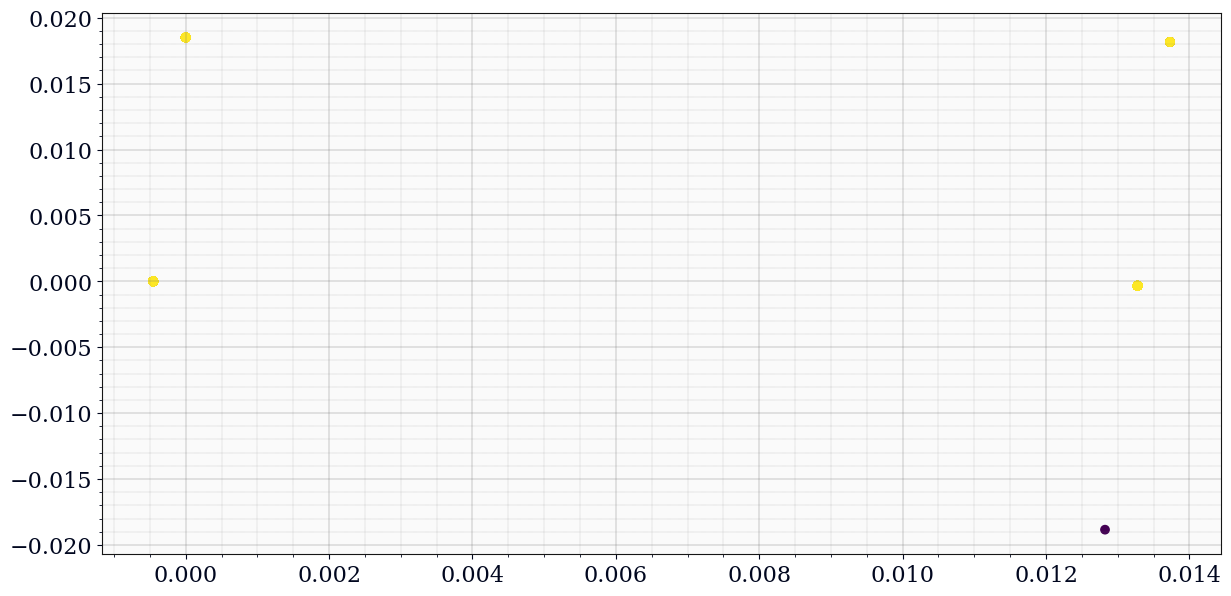

In [12]:
fig, a = bagpy.create_fig(1)
scatter = a[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=f, c='quality')
#y=f['UTM_easting_median'][0:120]
#x=f['UTM_northing_median'][0:120]
m=f['UTM_easting_median'].median()
n=f['UTM_northing_median'].median()
#rms = np.sqrt((()*(x-m))/f.count())
#sqrt(())
sigx=f['UTM_easting_median'].std()
sigy=f['UTM_northing_median'].std()
CEP=0.62*sigx + 0.56*sigy
DRMS=2*np.sqrt((sigx*sigx)+(sigy*sigy))
print(CEP)
print(DRMS)